# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** El dataset corresponde a más de 60.000 registros de la Fundación Canguro en donde se incluyen datos médicos longitudinales y de caracterización de los pacientes, recolectados durante más de 15 años.

**Contexto de Negocio:** La Fundación Canguro promueve y supervisa la aplicación del Método Madre Canguro Integral, recolectando datos principalmete de bebés de bajo peso y prematuros hasta los 12 meses de edad corregida. La investigación busca encontrar factores de riesgo que afecten el neurodesarrollo principalmente en el aspecto cognitivo y motor, además de visualizar el impacto de los componentes del Método Madre Canguro sobre los aspectos de neurodesarrollo mencionados.

Junto con la Fundación, fueron definidas las variables que determinan el desarrollo neuromotor e cognitivo. Ambas variables categoricas: infanib12m para el desarrollo neuromotor, con valores 1 para normal, 2 para transitorio y 3 para anormal.
IQ12cat para el desarrollo cognitivo, con valores 1 para normal y 0 para no normal.

Última actualización: Oct, 2025

**Recolección de datos y características del dataset:** 

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [109]:
fulldataset = pd.read_csv("KMC-70k-93-2024-Obes 19-conVel-DATA-SPSS-20250322V1.csv", low_memory=False)
pd.set_option("display.max_columns", None)
fulldataset.head()

Idenfinal Iden_Codigo Iden_Sede periodosanalisis Sistemadeaseguramiento  \
0    1000001           1         1                2                      3   
1    1000002           2         1                2                      2   
2    1000003           3         1                2                      2   
3    1000004           4         1                2                      2   
4    1000005           5         1                2                      2   

  Iden_embarazoMultiple Iden_FechaParto CSP_SituaPareja CSP_TipoVivienda  \
0                     0          #NULL!               3           #NULL!   
1                     0          #NULL!               3           #NULL!   
2                     0          #NULL!               3           #NULL!   
3                     0          #NULL!               3           #NULL!   
4                     0          #NULL!               3           #NULL!   

  CSP_EscolaridadMadre CSP_SituacionLaboralMadre CSP_EscolaridadPadre  \
0                    1                         2                    3   
1                    1                    #NULL!                    1   
2                    3                    #NULL!                    3   
3                    3                    #NULL!                    1   
4                    3                    #NULL!                    1   

  CSP_SituacionLaboralPadre CSP_IngresoMensual CSP_DistanciaVivienda  \
0                         1             #NULL!                     1   
1                         1             #NULL!                #NULL!   
2                         2             #NULL!                     1   
3                         2             #NULL!                     1   
4                         2             #NULL!                     1   

  CSP_numPersVivenIngMen CSP_Menores5vivenMadre CSP_NutricionFam  \
0                 #NULL!                 #NULL!           #NULL!   
1                 #NULL!                 #NULL!           #NULL!   
2                 #NULL!                 #NULL!           #NULL!   
3                 #NULL!                 #NULL!           #NULL!   
4                 #NULL!                 #NULL!           #NULL!   

  CSP_EmbarazoDeseado CSP_MesTabajoEmba CSP_AyudaPerm1mes CP_PesoMadre  \
0                   1            #NULL!            #NULL!           70   
1                   0            #NULL!            #NULL!           62   
2                   0            #NULL!            #NULL!           46   
3                   1            #NULL!            #NULL!           48   
4                   0            #NULL!            #NULL!           61   

  CP_TallaMadre CP_tallamadremetro   BMImadre BMImadrecat CP_PesoPadre  \
0           153               1.53  29.903029           3           57   
1           162               1.62  23.624447           2           80   
2           150                1.5  20.444444           2           70   
3           156               1.56  19.723866           2           71   
4           156               1.56  25.065746           3           77   

  CP_TallaPadre CP_tallapadremetro   BMIpadre BMIpadrecat CP_TotalCPN  CP_ARO  \
0           162               1.62   21.71925           2           6  #NULL!   
1           180                1.8  24.691358           2           2  #NULL!   
2           170                1.7  24.221453           2           6  #NULL!   
3           173               1.73  23.722811           2           3  #NULL!   
4           166               1.66  27.943098           3           6  #NULL!   

  CP_EnfermeraJefe CP_MedGeneral CP_Hormonales CP_DIU CP_MesInicCP  \
0           #NULL!        #NULL!             1      0       #NULL!   
1           #NULL!        #NULL!             1      0       #NULL!   
2           #NULL!        #NULL!             0      1       #NULL!   
3           #NULL!        #NULL!             0      0       #NULL!   
4           #NULL!        #NULL!             0      1       #NULL!   

In [110]:
fulldataset.shape

(64801, 753)

In [111]:
sorted_columns = sorted(fulldataset.columns)
for col in sorted_columns:
    print(col)

AC_AdapSeno
AC_AdmGoteo
AC_ApoyoLactancia
AC_CansaNinoChupando
AC_CirujiaSeno
AC_DiasPosCanguro
AC_EnsePosCangu
AC_EntrenoOtroCuidador
AC_ExtraSeno
AC_LugarAC
AC_MadreAmamanta
AC_MaxHorasLogroCargar
AC_RecibioChupo
AC_SillaIncubadora
AC_SoportePosicionC
AC_UnidadAbierta
ALIMENTAPARENTERAL
ANOCAT
ANOCAT2ISS
AROCAT02
BMI1
BMI12
BMI2
BMImadre
BMImadrecat
BMInacermas2DE
BMIpadre
BMIpadrecat
BPN
CD12
CD6
CONSULT08
CONSULT09
CONSULT10
CONSULT11
CONSULT12
CP_ARO
CP_DIU
CP_EcoPrimerTrimestre
CP_EnfermeraJefe
CP_EstuvoHosp
CP_Hormonales
CP_HospitalizacionEmbarazoAPP
CP_HospitalizacionEmbarazoAccidentes
CP_HospitalizacionEmbarazoAnemia
CP_HospitalizacionEmbarazoEclampsia
CP_HospitalizacionEmbarazoEnfermedadRespiratoria
CP_HospitalizacionEmbarazoInfeccionGinecologica
CP_HospitalizacionEmbarazoInfeccionUrinaria
CP_HospitalizacionEmbarazoPreeclampsia
CP_HospitalizacionEmbarazoSangrado
CP_HospitalizacionesPreParto
CP_MadreAlcohol
CP_MadreDrogas
CP_MadreFumo
CP_MedGeneral
CP_Medicamentos
CP_MesInicCP

**Variables que identifican los niños y variables objetivo:** 

In [112]:
fulldataset['Iden_Codigo'].value_counts()

Iden_Codigo
#NULL!    16
11111      5
19         4
59         4
60         4
          ..
16925      1
16948      1
16979      1
16999      1
17045      1
Name: count, Length: 27737, dtype: int64

In [113]:
fulldataset['Idenfinal'].value_counts()

Idenfinal
5001362    1
5001321    1
5001322    1
5001323    1
5001324    1
          ..
1000005    1
1000006    1
1000007    1
1000008    1
1000009    1
Name: count, Length: 64801, dtype: int64

In [114]:
fulldataset['IQ12cat'].value_counts()

IQ12cat
#NULL!    35408
1         23502
0          5891
Name: count, dtype: int64

In [115]:
fulldataset['infanib12m'].value_counts()

infanib12m
#NULL!    34710
1         28732
2           933
3           424
0             2
Name: count, dtype: int64

**Preparación de datos:** Reemplazamos las cadenas de texto que señalizan nulos e imputamos nulos NAN, a continuación limpiamos los registros que no cuentan con las variables objetivo determinadas. Posterior a esto nos aseguramos que las columnas sean del tipo correcto. 

In [116]:
fulldataset.replace("#NULL!", np.nan, inplace=True)

In [117]:
bebes_infanib12 = set(fulldataset.loc[fulldataset['infanib12m'].notna(), 'Idenfinal'])
bebes_iq12 = set(fulldataset.loc[fulldataset['IQ12cat'].notna(), 'Idenfinal'])
bebes_interseccion = bebes_infanib12.intersection(bebes_iq12)
print(f"Bebes con Infanib12 & Iq12: {len(bebes_interseccion)}")

Bebes con Infanib12 & Iq12: 26155


In [118]:
df_estudio = fulldataset[fulldataset['Idenfinal'].isin(bebes_interseccion)].copy()

In [119]:
df_estudio.shape

(26155, 753)

In [120]:
df_estudio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26155 entries, 5049 to 64641
Columns: 753 entries, Idenfinal to velocidad6_3mesesOMS
dtypes: float64(1), int64(1), object(751)
memory usage: 150.5+ MB


In [121]:
#df_estudio['Iden_FechaParto'].describe()
df_estudio['Iden_FechaParto'].unique()

array(['11-Mar-08', '18-Apr-08', '16-Apr-08', ..., '18-Sep-22',
       '19-Nov-22', nan], dtype=object)

In [122]:
df_estudio['Iden_FechaParto'].isna().sum()

np.int64(4580)

In [123]:
col = 'Iden_FechaParto'

# Muestra valores únicos de ejemplo (sin NaN)
muestras = df_estudio[col].dropna().unique()

# Intentamos inferir el formato de cada muestra
formatos_detectados = {}

for valor in muestras[:50]:  # límite para no imprimir demasiados
    try:
        fecha = parser.parse(valor, fuzzy=True)
        formatos_detectados[valor] = fecha.strftime("%Y-%m-%d")
    except Exception:
        formatos_detectados[valor] = "No reconocido"

pd.DataFrame(list(formatos_detectados.items()), columns=['Original', 'Parseado']).head(20)

Original       Parseado
0   11-Mar-08  No reconocido
1   18-Apr-08  No reconocido
2   16-Apr-08  No reconocido
3   01-Apr-08  No reconocido
4   02-Apr-08  No reconocido
5   13-Feb-08  No reconocido
6   07-Apr-08  No reconocido
7   24-Apr-08  No reconocido
8   30-Apr-08  No reconocido
9   12-Mar-08  No reconocido
10  02-May-08  No reconocido
11  06-Apr-08  No reconocido
12  22-Mar-08  No reconocido
13  07-May-08  No reconocido
14  19-Apr-08  No reconocido
15  03-May-08  No reconocido
16  12-May-08  No reconocido
17  15-May-08  No reconocido
18  08-May-08  No reconocido
19  24-Feb-08  No reconocido

In [124]:
import locale
locale.setlocale(locale.LC_TIME, 'C')  # 'C' = inglés neutro, compatible

df_estudio['Iden_FechaParto'] = pd.to_datetime(
    df_estudio['Iden_FechaParto'],
    format='%d-%b-%y',
    errors='coerce'
)

In [125]:
df_estudio['Iden_FechaParto'] = pd.to_datetime(
    df_estudio['Iden_FechaParto'],
    format='%d-%b-%y',  # día-mes-abreviado-año (dos dígitos)
    errors='coerce'
)

In [126]:
df_estudio['Iden_FechaParto'].unique()

<DatetimeArray>
['2008-03-11 00:00:00', '2008-04-18 00:00:00', '2008-04-16 00:00:00',
 '2008-04-01 00:00:00', '2008-04-02 00:00:00', '2008-02-13 00:00:00',
 '2008-04-07 00:00:00', '2008-04-24 00:00:00', '2008-04-30 00:00:00',
 '2008-03-12 00:00:00',
 ...
 '2021-10-08 00:00:00', '2021-10-29 00:00:00', '2022-01-21 00:00:00',
 '2022-01-23 00:00:00', '2022-04-03 00:00:00', '2022-04-30 00:00:00',
 '2022-06-10 00:00:00', '2022-09-18 00:00:00', '2022-11-19 00:00:00',
                 'NaT']
Length: 5102, dtype: datetime64[ns]

In [127]:
df_estudio['Iden_FechaParto'].describe()

count                            21575
mean     2016-06-19 07:39:35.916570112
min                2008-01-25 00:00:00
25%                2013-09-07 00:00:00
50%                2016-07-20 00:00:00
75%                2019-06-22 00:00:00
max                2023-01-03 00:00:00
Name: Iden_FechaParto, dtype: object

In [128]:
df_estudio['Iden_FechaParto'] = pd.to_datetime(df_estudio['Iden_FechaParto'], errors='coerce')

**Exploración inicial de las variables objetivo:** 

In [129]:
var_obj = ["IQ12cat","infanib12m"]

infanib12m
1    25110
2      715
3      330
Name: count, dtype: int64
IQ12cat
0     4961
1    21194
Name: count, dtype: int64
infanib12m
1    96.004588
2     2.733703
3     1.261709
Name: proportion, dtype: float64
IQ12cat
0    18.967693
1    81.032307
Name: proportion, dtype: float64


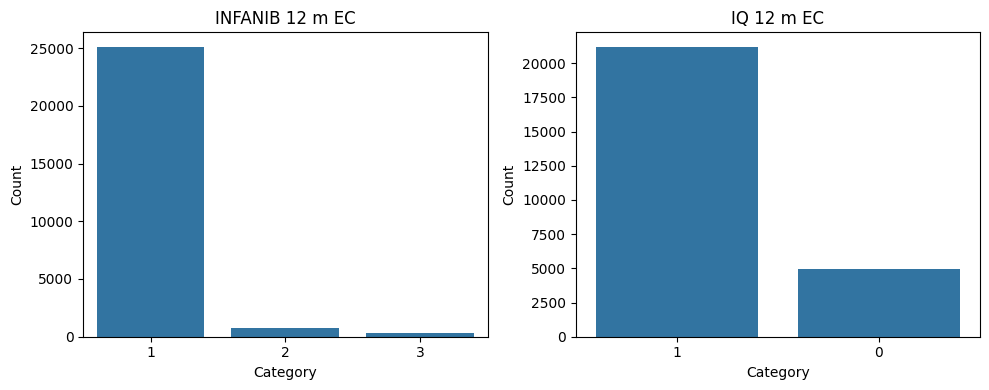

In [130]:

# Frequency tables
print(df_estudio['infanib12m'].value_counts(dropna=False).sort_index())
print(df_estudio['IQ12cat'].value_counts(dropna=False).sort_index())

# Percentages
print(df_estudio['infanib12m'].value_counts(normalize=True).sort_index()*100)
print(df_estudio['IQ12cat'].value_counts(normalize=True).sort_index()*100)

# Visuals
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.countplot(x='infanib12m', data=df_estudio, ax=ax[0])
ax[0].set_title('INFANIB 12 m EC')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')

sns.countplot(x='IQ12cat', data=df_estudio, ax=ax[1])
ax[1].set_title('IQ 12 m EC')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


📊 Variable: infanib12m


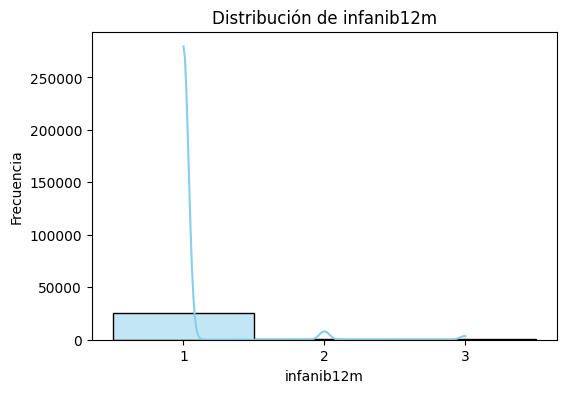

c:\Users\javie\anaconda3\envs\eda-env\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26155.
  res = hypotest_fun_out(*samples, **kwds)


🧪 Shapiro–Wilk: estadístico = 0.188, p = 0.00000
❌ La variable NO sigue una distribución normal (p < 0.05)

📊 Variable: IQ12cat


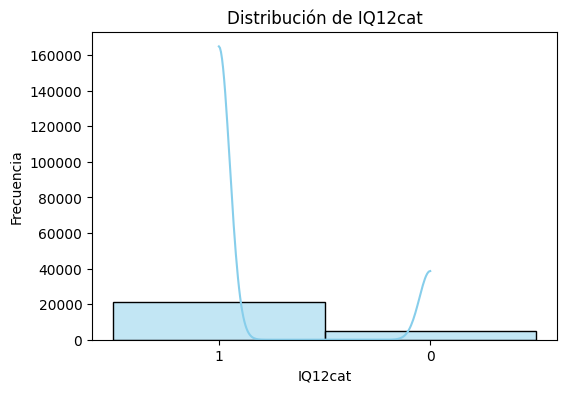

🧪 Shapiro–Wilk: estadístico = 0.478, p = 0.00000
❌ La variable NO sigue una distribución normal (p < 0.05)


c:\Users\javie\anaconda3\envs\eda-env\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26155.
  res = hypotest_fun_out(*samples, **kwds)


In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Lista de variables desenlace
variables = ['infanib12m', 'IQ12cat']

for var in variables:
    print(f"\n📊 Variable: {var}")
    
    # Eliminar valores nulos
    data = df_estudio[var].dropna()
    
    # Visualización de la distribución
    plt.figure(figsize=(6,4))
    sns.histplot(data, kde=True, bins=25, color='skyblue')
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()
    
    # Test de normalidad (Shapiro–Wilk)
    stat, p = stats.shapiro(data)
    print(f"🧪 Shapiro–Wilk: estadístico = {stat:.3f}, p = {p:.5f}")
    
    # Interpretación automática
    if p >= 0.05:
        print("✅ La variable parece seguir una distribución normal (p ≥ 0.05)")
    else:
        print("❌ La variable NO sigue una distribución normal (p < 0.05)")

IQ12cat        0     1
infanib12m            
1           16.6  83.4
2           73.7  26.3
3           77.9  22.1


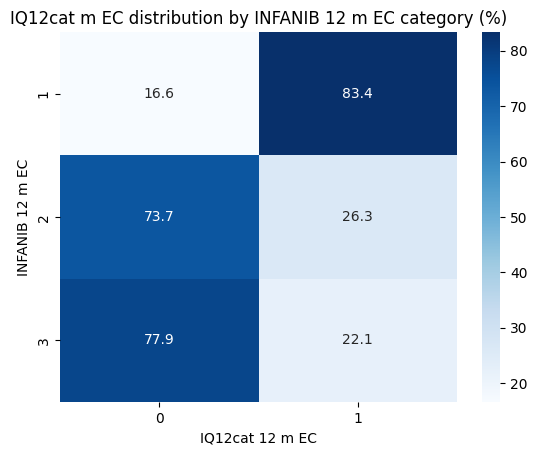

In [132]:
ct = pd.crosstab(df_estudio['infanib12m'], df_estudio['IQ12cat'],
                 normalize='index') * 100
print(ct.round(1))

sns.heatmap(ct, annot=True, cmap='Blues', fmt='.1f')
plt.title('IQ12cat m EC distribution by INFANIB 12 m EC category (%)')
plt.xlabel('IQ12cat 12 m EC')
plt.ylabel('INFANIB 12 m EC')
plt.show()

In [133]:
from scipy.stats import spearmanr
spearmanr(df_estudio['infanib12m'], df_estudio['IQ12cat'])

SignificanceResult(statistic=np.float64(-0.29182554336332583), pvalue=np.float64(0.0))

In [134]:
df_estudio[['infanib12m','IQ12cat']].describe()

infanib12m IQ12cat
count       26155   26155
unique          3       2
top             1       1
freq        25110   21194

In [135]:
from scipy.stats import spearmanr

# Drop missing values in either column
subset = df_estudio[['infanib12m', 'IQ12cat']].dropna()

# Compute correlation
rho, p = spearmanr(subset['infanib12m'], subset['IQ12cat'])
print(f"Spearman ρ = {rho:.3f}, p = {p:.3e}, n = {len(subset)}")


Spearman ρ = -0.292, p = 0.000e+00, n = 26155


**Hacemos uso del diccionario de datos para asignar los tipos de variables correctos:** 

In [136]:
# Numéricas (enteros y decimales)
numeric_cols = df_estudio.select_dtypes(include=['int64', 'float64']).columns

# Categóricas (texto o categorías)
categorical_cols = df_estudio.select_dtypes(include=['object', 'category']).columns

# Booleanas
bool_cols = df_estudio.select_dtypes(include=['bool']).columns

print("Numéricas:", len(numeric_cols))
print("Categóricas:", len(categorical_cols))
print("Booleanas:", len(bool_cols))


Numéricas: 2
Categóricas: 750
Booleanas: 0


####PCA

In [137]:
df_vartype = pd.read_csv("Variables_Tipo.csv")
df_vartype.head()

NOMBRE EN LA BdeD VAR-TYPE-prim VAR-TYPE-sec
0  Iden_embarazoMultiple       BOOLEAN          NaN
1           CP_Prematuro       INTEGER          NaN
2            Iden_Codigo       INTEGER          NaN
3              Iden_Sede       INTEGER          NaN
4        Iden_FechaParto        DATE11          NaN

In [138]:
# 1) Normalizamos nombres (quitamos espacios, respetamos mayúsculas si quieres exact match)
df_vartype['NOMBRE EN LA BdeD'] = df_vartype['NOMBRE EN LA BdeD'].str.strip()

# 2) Creamos un diccionario {nombre_columna: tipo_primario}
type_map = (df_vartype
            .dropna(subset=['NOMBRE EN LA BdeD', 'VAR-TYPE-prim'])
            .set_index('NOMBRE EN LA BdeD')['VAR-TYPE-prim']
            .to_dict())


In [139]:
cols_en_df      = set(df_estudio.columns)
cols_en_dict    = set(type_map.keys())

cols_a_convertir = sorted(list(cols_en_df & cols_en_dict))
cols_sin_tipo    = sorted(list(cols_en_df - cols_en_dict))     # no están en el diccionario
cols_no_existen  = sorted(list(cols_en_dict - cols_en_df))     # están en el diccionario pero no en df

print("Columnas a convertir:", len(cols_a_convertir))
print("Sin tipo en el diccionario:", len(cols_sin_tipo))
print("En diccionario pero no en df:", len(cols_no_existen))


Columnas a convertir: 595
Sin tipo en el diccionario: 158
En diccionario pero no en df: 39


In [140]:
def safe_to_numeric(s: pd.Series, threshold: float = 0.9) -> pd.Series:
    """
    Convierte la serie a numérica si la mayoría de valores son numéricos o nulos.
    threshold: proporción mínima de valores convertibles requerida (por defecto 90%).
    """
    # Limpieza ligera de strings frecuentes
    s_clean = s.astype(str).str.strip().replace(
        {"": np.nan, "nan": np.nan, "#NULL!": np.nan, "None": np.nan, "NA": np.nan}
    )

    # Intentar conversión
    converted = pd.to_numeric(s_clean, errors='coerce')
    success_rate = converted.notna().mean()

    # Si más del 90% de los valores son numéricos o nulos → convertir
    if success_rate >= threshold:
        return converted
    else:
        return s  # mantener como texto/categórica

In [141]:

YES = {"yes","y","true","t","1","si","sí","verdadero","v","s"}
NO  = {"no","n","false","f","0","falso"}

def to_boolean(s: pd.Series) -> pd.Series:
    if s.dtype == bool:
        return s

    # Cast robusto desde texto/números
    x = s.copy()

    # Pasar todo a str para mapear valores heterogéneos
    mask_notna = x.notna()
    x_str = x[mask_notna].astype(str).str.strip().str.lower()

    mapped = pd.Series(index=x.index, dtype="boolean")
    mapped.loc[mask_notna & x_str.isin(YES)] = True
    mapped.loc[mask_notna & x_str.isin(NO)]  = False

    # Números 0/1 directos
    if pd.api.types.is_numeric_dtype(s):
        mapped = s.astype('Int64').map({0: False, 1: True}).astype('boolean')

    return mapped.astype('boolean')

def to_integer(s: pd.Series) -> pd.Series:
    # Convierte limpiando símbolos frecuentes
    if s.dtype == 'O':
        s = s.str.replace(r'[^\d\-\+]', '', regex=True)
    return pd.to_numeric(s, errors='coerce').astype('Int64')  # entero “nullable”

def to_float(s: pd.Series) -> pd.Series:
    if s.dtype == 'O':
        # cambia comas por punto y retira símbolos
        s = (s.str.replace(',', '.', regex=False)
               .str.replace(r'[^\d\-\.+eE]', '', regex=True))
    return pd.to_numeric(s, errors='coerce').astype('Float32')

def to_datetime_guess(s: pd.Series) -> pd.Series:
    # DATE/DATE11: intentamos conversión flexible; ajusta dayfirst según tu caso
    return pd.to_datetime(s, format='%d/%m/%Y', errors='coerce')

def to_category(s: pd.Series) -> pd.Series:
    return s.astype('category')

def cast_by_type(s: pd.Series, tipo: str) -> pd.Series:
    t = str(tipo).upper()
    if 'BOOL' in t:
        return to_boolean(s)
    if 'INT' in t:
        return to_integer(s)
    if 'FLOAT' in t or 'DOUBLE' in t or 'REAL' in t or 'NUM' in t:
        return to_float(s)
    if 'DATE' in t or 'FECHA' in t or 'TIME' in t:
        return to_datetime_guess(s)
    if 'CHAR' in t or 'STRING' in t or 'TEXT' in t:
        return s.astype('string')
    # -
    if 'CATEG' in t or 'STRING' in t:
        return to_category(s)
    return s


In [142]:
reporte = []
df_cast = df_estudio.copy()

for col in cols_a_convertir:
    tipo_objetivo = type_map[col]
    antes = str(df_cast[col].dtype)

    serie_nueva = cast_by_type(df_cast[col], tipo_objetivo)
    despues = str(serie_nueva.dtype)

    # Métrica de “coerción” (cuántos se volvieron NaN al convertir)
    nas_antes = df_cast[col].isna().sum()
    nas_desp  = serie_nueva.isna().sum()

    df_cast[col] = serie_nueva

    reporte.append({
        "columna": col,
        "tipo_dic": tipo_objetivo,
        "dtype_antes": antes,
        "dtype_despues": despues,
        "nulos_antes": int(nas_antes),
        "nulos_despues": int(nas_desp),
        "n_filas": len(df_cast)
    })

reporte_df = pd.DataFrame(reporte).sort_values("columna")
reporte_df.value_counts()


columna               tipo_dic   dtype_antes  dtype_despues  nulos_antes  nulos_despues  n_filas
vino9m                BOOLEAN    object       boolean        934          934            26155      1
AC_AdapSeno           CATEGORIC  object       category       15493        15493          26155      1
AC_AdmGoteo           CATEGORIC  object       category       15445        15445          26155      1
AC_ApoyoLactancia     BOOLEAN    object       boolean        17065        17065          26155      1
AC_CansaNinoChupando  BOOLEAN    object       boolean        15425        15425          26155      1
                                                                                                   ..
CONSULT08             FLOAT      object       Float32        0            0              26155      1
CONSULT09             FLOAT      object       Float32        0            0              26155      1
CONSULT10             FLOAT      object       Float32        0            0            

In [143]:
df_cast.dtypes.head(30)

Idenfinal                             int64
Iden_Codigo                           Int64
Iden_Sede                             Int64
periodosanalisis                     object
Sistemadeaseguramiento               object
Iden_embarazoMultiple               boolean
Iden_FechaParto              datetime64[ns]
CSP_SituaPareja                    category
CSP_TipoVivienda                   category
CSP_EscolaridadMadre               category
CSP_SituacionLaboralMadre          category
CSP_EscolaridadPadre               category
CSP_SituacionLaboralPadre          category
CSP_IngresoMensual                  Float32
CSP_DistanciaVivienda              category
CSP_numPersVivenIngMen                Int64
CSP_Menores5vivenMadre                Int64
CSP_NutricionFam                   category
CSP_EmbarazoDeseado                 boolean
CSP_MesTabajoEmba                     Int64
CSP_AyudaPerm1mes                   boolean
CP_PesoMadre                        Float32
CP_TallaMadre                   

In [144]:
#obj_cols = df_mix.select_dtypes(include=['object']).columns
#print(f"Columnas tipo object: {len(obj_cols)}")
#print(obj_cols.tolist())

**Preparación para análisis inicial.** Podemos ver que las variables son mixtas, iniciamos la preparación de un nuevo set de datos y asignamos tipos de variables a las que no se encontraron en el diccionario.

In [145]:
exc_var = ['Idenfinal', 'Iden_Codigo', 'Iden_Sede', 'periodosanalisis', 'VAR00005', 'V203', 'V236E', 'V245', 'V248', 'V254', 'V275C', 'V280', 'V284', 'V288', 'V291', 'V296', 'V301A', 'V313', 'V317C', 'V322',	'V326',	'V330', 'V333', 'V338', 'V344A', 'V356', 'V360C', 'V365', 'V369', 'V373', 'V376', 'V381', 'V386D', 'V398', 'V402C', 'V407',	'V411', 'V415',	'V418',	'V423',	'V430A']

cols = [c for c in df_cast.columns if c not in exc_var]
cols = [c for c in cols if not c.lower().startswith('zscore')]

df_mix = df_cast[cols].copy()



In [146]:
df_mix.dtypes

Sistemadeaseguramiento                object
Iden_embarazoMultiple                boolean
Iden_FechaParto               datetime64[ns]
CSP_SituaPareja                     category
CSP_TipoVivienda                    category
                                   ...      
velocidadzscorepeso40_3m              object
velocidadzscore3m_40semOMS            object
velocidad12_9mesesOMS                 object
velocidad9_6mesesOMS                  object
velocidad6_3mesesOMS                  object
Length: 645, dtype: object

In [147]:
object_cols = df_mix.select_dtypes(include='object').columns

for col in object_cols:
    s = df_mix[col].astype('string').str.strip()  # preserva NA (no los vuelve "nan")

    # si hay letras (ignorando NA), dejar como object
    if s.str.contains(r'[A-Za-z]', regex=True, na=False).any():
        print(f"X {col}: NO convertido")
        continue

    # reemplazar comas por puntos y convertir
    s = s.str.replace(',', '.', regex=False)
    converted = pd.to_numeric(s, errors='coerce')

    if converted.notna().any():
        if (converted.dropna() % 1 == 0).all():
            df_mix[col] = converted.astype('Int64')
            print(f"✅ {col}: convertido a Int64")
        else:
            df_mix[col] = converted.astype('float64')
            print(f"✅ {col}: convertido a float64")


# Revisar tipos finales
df_mix.info()

✅ Sistemadeaseguramiento: convertido a Int64
✅ CP_tallamadremetro: convertido a float64
✅ BMImadre: convertido a float64
✅ BMImadrecat: convertido a Int64
✅ CP_tallapadremetro: convertido a float64
✅ BMIpadre: convertido a float64
✅ BMIpadrecat: convertido a Int64
✅ ERN_Talla0: convertido a float64
✅ RCIUpeso: convertido a Int64
✅ RCIUpesoytallanacer: convertido a Int64
✅ pesotalla0: convertido a float64
✅ edadgestaFUM: convertido a float64
X V7a: NO convertido
✅ VAR00003: convertido a Int64
✅ ANOCAT2ISS: convertido a Int64
✅ HD_C_GradoHIV: convertido a Int64
✅ VAR00004: convertido a Int64
✅ V196BB: convertido a float64
✅ EGEnt: convertido a Int64
✅ EG1: convertido a float64
✅ BMI1: convertido a float64
✅ V219BB: convertido a float64
✅ EG40: convertido a Int64
✅ BMI2: convertido a float64
✅ V262BB: convertido a float64
✅ V305BB: convertido a float64
✅ V344B_LOC: convertido a float64
✅ V344B_PSOC: convertido a float64
✅ V344B_AULEN: convertido a float64
✅ V344B_OCUMAN: convertido a floa

In [148]:
meses = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr',
    'may': 'May', 'jun': 'Jun', 'jul': 'Jul', 'ago': 'Aug',
    'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Limpieza y reemplazo solo en V7a
s = df_mix['V7a'].astype('string').str.strip()
for esp, eng in meses.items():
    s = s.str.replace(esp, eng, case=False, regex=True)

# Conversión final (usa formato inglés)
df_mix['V7a'] = pd.to_datetime(s, format='%d-%b-%y', errors='coerce')

In [149]:
#df_mix['V7a'].isna().sum()

In [150]:
df_mix.dtypes

Sistemadeaseguramiento                 Int64
Iden_embarazoMultiple                boolean
Iden_FechaParto               datetime64[ns]
CSP_SituaPareja                     category
CSP_TipoVivienda                    category
                                   ...      
velocidadzscorepeso40_3m             float64
velocidadzscore3m_40semOMS           float64
velocidad12_9mesesOMS                float64
velocidad9_6mesesOMS                 float64
velocidad6_3mesesOMS                 float64
Length: 645, dtype: object

**FAMD** Identificación de clusters o componentes principales en el set mixto. 
Con el fin de optimizar el procesamiento y mantener las variables con cantidades razonables de nulos, limpiamos las columnas que incumplen el umbral definido.

In [151]:
thr_null = 0.4 
drop_nulls = [c for c in df_mix.columns if df_mix[c].isna().mean() > thr_null]
drop_const = [c for c in df_mix.columns if df_mix[c].nunique(dropna=True) <= 1]
df_mix = df_mix.drop(columns=drop_nulls + drop_const)

In [152]:
for col in df_mix.columns:
    if df_mix[col].dtype == 'object':
        df_mix[col] = df_mix[col].astype('category')
        print("xx {col}")

df_mix = df_mix.select_dtypes(exclude=['datetime64[ns]'])

In [153]:
type_counts = df_mix.dtypes.value_counts()
print("Tipos de datos presentes:")
print(type_counts)


Tipos de datos presentes:
category    89
boolean     80
Float32     72
Int64       66
float64     29
category    20
category    15
category    12
category     9
category     6
category     6
category     5
category     5
category     4
category     3
category     3
category     3
category     2
category     2
category     2
category     2
category     2
category     2
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64


In [154]:
num_cols = df_mix.select_dtypes(include=['number']).columns
cat_cols = df_mix.select_dtypes(include=['object', 'category']).columns

print(f"Variables numéricas: {len(num_cols)}")
print(f"Variables categóricas: {len(cat_cols)}")

Variables numéricas: 167
Variables categóricas: 213


In [155]:
df_mixed = df_mix.copy()
for col in cat_cols:
    # Si la columna ya es categórica, agrega la categoría 'missing' explícitamente
    if pd.api.types.is_categorical_dtype(df_mixed[col]):
        df_mixed[col] = df_mixed[col].cat.add_categories('missing').fillna('missing')
    else:
        # Si no lo es, la convertimos a categórica directamente
        df_mixed[col] = df_mixed[col].astype('category').cat.add_categories('missing').fillna('missing')

In [156]:
from sklearn.impute import SimpleImputer

# Imputar SOLO numéricas con la mediana
imputer = SimpleImputer(strategy='median')
df_mixed[num_cols] = imputer.fit_transform(df_mixed[num_cols])

**FAMD** Análisis Factorial de Datos Mixtos.

In [157]:
import prince

# Ajustar FAMD
famd = prince.FAMD(
    n_components=5,
    n_iter=5,
    random_state=42
)

famd = famd.fit(df_mixed)
df_famd = famd.transform(df_mixed)

print(df_famd.head())


c:\Users\javie\anaconda3\envs\eda-env\lib\site-packages\prince\famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
c:\Users\javie\anaconda3\envs\eda-env\lib\site-packages\prince\famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
c:\Users\javie\anaconda3\envs\eda-env\lib\site-packages\prince\famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

component          0          1           2           3           4
5049      -57.826267 -40.608820   70.190390  223.358959  -65.993925
5050      -55.960035 -38.127170   38.304390  130.072066 -136.099799
5051      -48.890044 -23.264521   13.121460  120.563938 -159.208131
5054      -53.934756 -43.267153   55.355234  156.680776  -66.186120
5055       31.851891 -31.069808  118.955477  129.280824  -27.554432


In [158]:
df_famd.shape

(26155, 5)

In [159]:
eigvals = famd.eigenvalues_               # valores propios de cada componente
explained = eigvals / np.sum(eigvals)     # proporción explicada

print(explained)
print(explained.sum())

[0.65372267 0.12778573 0.09210563 0.07182264 0.05456333]
1.0


In [160]:
k = df_famd.shape[1]
comp_cols = [f'PC{i+1}' for i in range(k)]
scores = df_famd.copy()
scores.columns = comp_cols

num_cols = df_mixed.select_dtypes(include=['number']).columns

num_loadings = pd.DataFrame({
    pc: df_mixed[num_cols].apply(lambda s: s.corr(scores[pc]))
    for pc in comp_cols
})
num_loadings.index.name = 'Variable'
num_loadings.sort_values(by='PC1', ascending=False).head()

PC1       PC2       PC3       PC4       PC5
Variable                                                         
VAR00003         0.752503 -0.085540  0.032915 -0.090060  0.003851
CD12             0.255638  0.074561 -0.182327 -0.218273  0.007228
CD6              0.220149  0.067763 -0.207889 -0.059688 -0.059358
gesentcat        0.212405  0.107865  0.284008 -0.340308  0.211155
gestaentradacat  0.212405  0.107865  0.284008 -0.340308  0.211155

In [161]:
num_loadings.sort_values(by='PC1', ascending=False).tail()

PC1       PC2       PC3       PC4       PC5
Variable                                                                      
CSP_Menores5vivenMadre       -0.299722 -0.118954 -0.108444  0.137371 -0.022862
HD_ExamenesEcografiacerebral -0.305984  0.051172  0.150589  0.260340  0.299919
examenneuropsico12meses      -0.362625 -0.129831  0.314617  0.205780 -0.013065
RCEUFentonentrada            -0.365632  0.016862 -0.187435  0.042877 -0.122082
ANOCAT                       -0.864382  0.366841 -0.014013 -0.128259  0.138485

In [162]:
top_pc1 = num_loadings['PC1'].abs().sort_values(ascending=False).head(10)
top_pc2 = num_loadings['PC2'].abs().sort_values(ascending=False).head(10)
top_pc3 = num_loadings['PC3'].abs().sort_values(ascending=False).head(10)
top_pc4 = num_loadings['PC4'].abs().sort_values(ascending=False).head(10)

print(f"Top Variables del PC1: {top_pc1}")
print(f"Top Variables del PC2: {top_pc2}")
print(f"Top Variables del PC3: {top_pc3}")
print(f"Top Variables del PC4: {top_pc4}")

Top Variables del PC1: Variable
ANOCAT                          0.864382
VAR00003                        0.752503
RCEUFentonentrada               0.365632
examenneuropsico12meses         0.362625
HD_ExamenesEcografiacerebral    0.305984
CSP_Menores5vivenMadre          0.299722
V196A                           0.288329
ERN_Peso                        0.287749
PA_NumDosisCorticoides          0.282982
CSP_IngresoMensual              0.282059
Name: PC1, dtype: float64
Top Variables del PC2: Variable
ANOCAT                          0.366841
HD_DosisAmino                   0.295316
algoLA12m                       0.257283
algoLA9m                        0.240888
algoLA6m                        0.208205
HD_CiclosOtroAntibio            0.199668
CP_HospitalizacionesPreParto    0.192610
hospenURN                       0.190848
CP_EstuvoHosp                   0.187007
algoLA3m                        0.181241
Name: PC2, dtype: float64
Top Variables del PC3: Variable
V402                      0.7301

In [163]:
top_vars = set(num_loadings['PC1'].abs().nlargest(10).index)
top_vars |= set(num_loadings['PC2'].abs().nlargest(10).index)
top_vars |= set(num_loadings['PC3'].abs().nlargest(10).index)
top_vars |= set(num_loadings['PC4'].abs().nlargest(10).index)
print(top_vars)
print(len(top_vars))

{'HD_ExamenesEcografiacerebral', 'VAR00003', 'HD_CiclosOtroAntibio', 'BMI1', 'gestasal', 'V275', 'VAR00004', 'V196D', 'ERN_Peso', 'CSP_IngresoMensual', 'algoLA3m', 'CP_EstuvoHosp', 'HD_PesoSalida', 'ERN_Talla', 'algoLA6m', 'CP_HospitalizacionesPreParto', 'hospenURN', 'ANOCAT', 'HD_DosisSurfactante', 'primariamadre', 'V196', 'V196A', 'RCEUFentonentrada', 'CSP_Menores5vivenMadre', 'V317', 'PA_NumDosisCorticoides', 'Sistemadeaseguramiento', 'HD_DiasOxigeno', 'examenneuropsico12meses', 'algoLA9m', 'ERN_Talla0', 'HD_DosisAmino', 'HD_TotalDiasHospital', 'ERN_Ballard', 'gestaentrada', 'V402', 'algoLA12m'}
37


**EDA** Con el subconjunto de las variables más representativas determinadas por cada componente principal encontrado.

In [164]:
targets = ['IQ12cat', 'infanib12m']
df_subset = df_mix[list(top_vars) + targets].copy()

In [165]:
df_subset.shape

(26155, 39)

In [166]:
subset_num_cols = df_subset.select_dtypes(include=['number']).columns
subset_cat_cols = df_subset.select_dtypes(include=['object', 'category']).columns

print(f"Variables numéricas: {len(subset_num_cols)}")
print(f"Variables categóricas: {len(subset_cat_cols)}")

Variables numéricas: 37
Variables categóricas: 1


In [167]:
df_subset.dtypes

HD_ExamenesEcografiacerebral       Int64
VAR00003                           Int64
HD_CiclosOtroAntibio               Int64
BMI1                             float64
gestasal                         Float32
V275                             Float32
VAR00004                           Int64
V196D                            Float32
ERN_Peso                         Float32
CSP_IngresoMensual               Float32
algoLA3m                           Int64
CP_EstuvoHosp                      Int64
HD_PesoSalida                    Float32
ERN_Talla                        Float32
algoLA6m                           Int64
CP_HospitalizacionesPreParto       Int64
hospenURN                          Int64
ANOCAT                             Int64
HD_DosisSurfactante                Int64
primariamadre                      Int64
V196                               Int64
V196A                            Float32
RCEUFentonentrada                  Int64
CSP_Menores5vivenMadre             Int64
V317            

In [168]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def eta_squared_matrix(df_subset, targets):
    """
    Calcula una matriz de correlación η² (eta cuadrado) entre variables numéricas 
    y un conjunto de variables categóricas objetivo.
    """
    def eta_squared(y, g):
        overall_mean = y.mean()
        sizes = g.value_counts()
        means = y.groupby(g).mean()
        ss_between = (sizes * (means - overall_mean)**2).sum()
        ss_total = ((y - overall_mean)**2).sum()
        return float(ss_between / ss_total) if ss_total > 0 else np.nan

    num_cols = df_subset.select_dtypes(include=['number']).columns
    eta_vals = {target: [eta_squared(df_subset[var], df_subset[target]) for var in num_cols] for target in targets}
    return pd.DataFrame(eta_vals, index=num_cols)

In [169]:
eta_df = eta_squared_matrix(df_subset, targets)
eta_df.sort_values(by='infanib12m', ascending=False).head(20)

IQ12cat  infanib12m
examenneuropsico12meses       0.356904    0.061028
HD_TotalDiasHospital          0.032170    0.036355
HD_DiasOxigeno                0.017370    0.029832
V196                          0.018426    0.028192
V196D                         0.010967    0.012161
ERN_Talla0                    0.010695    0.012046
ERN_Talla                     0.010692    0.012041
ERN_Peso                      0.008394    0.010450
HD_DosisSurfactante           0.005983    0.008861
VAR00004                      0.009808    0.007509
gestasal                      0.009808    0.007509
ERN_Ballard                   0.009808    0.007509
gestaentrada                  0.001030    0.004863
HD_ExamenesEcografiacerebral  0.002720    0.004688
V317                          0.026407    0.004420
V402                          0.015885    0.003936
HD_PesoSalida                 0.008192    0.003502
hospenURN                     0.001751    0.002889
primariamadre                 0.031010    0.002887
V275                          0.026875    0.002697

**EDA** Distribuciones en las variables.

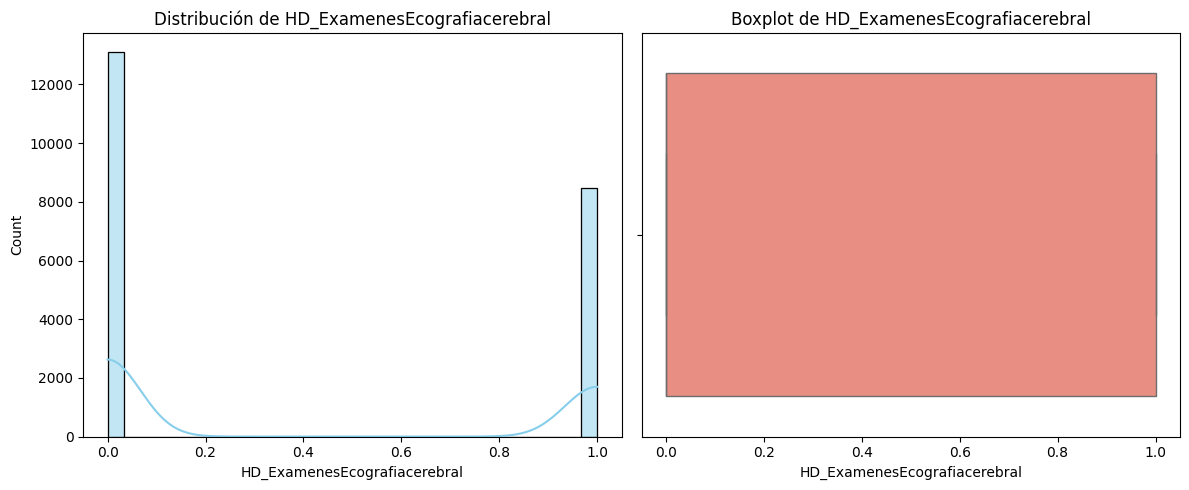

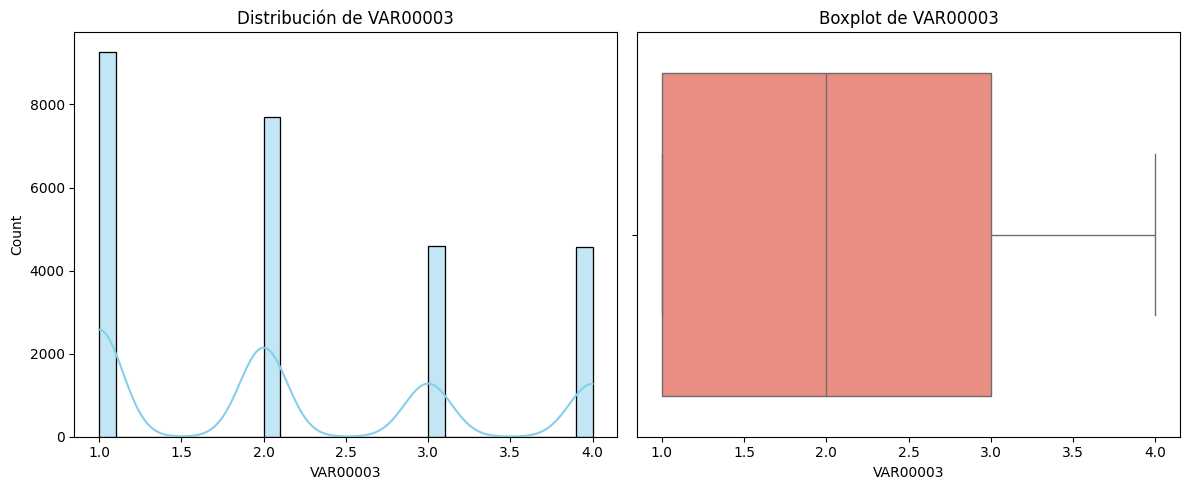

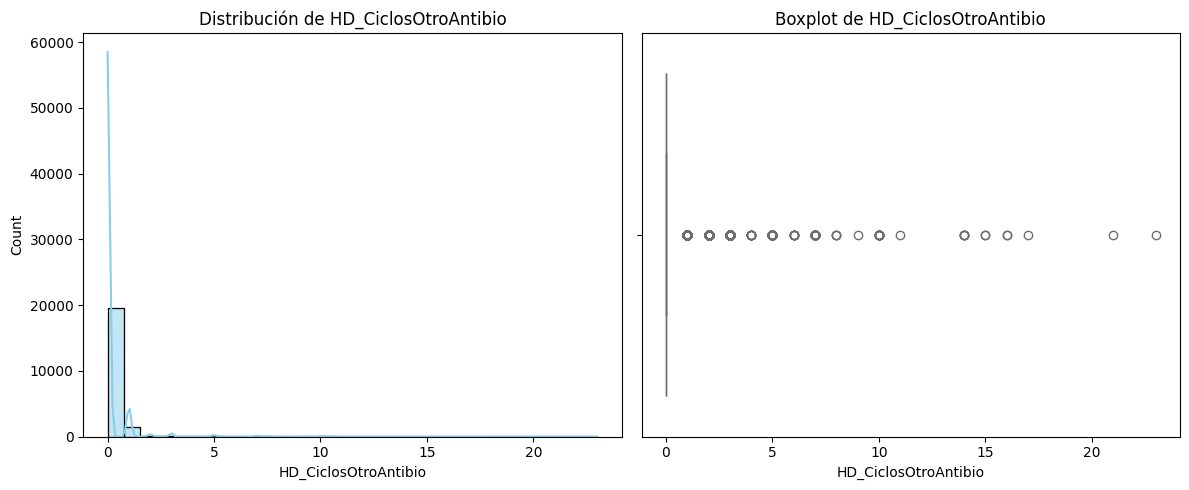

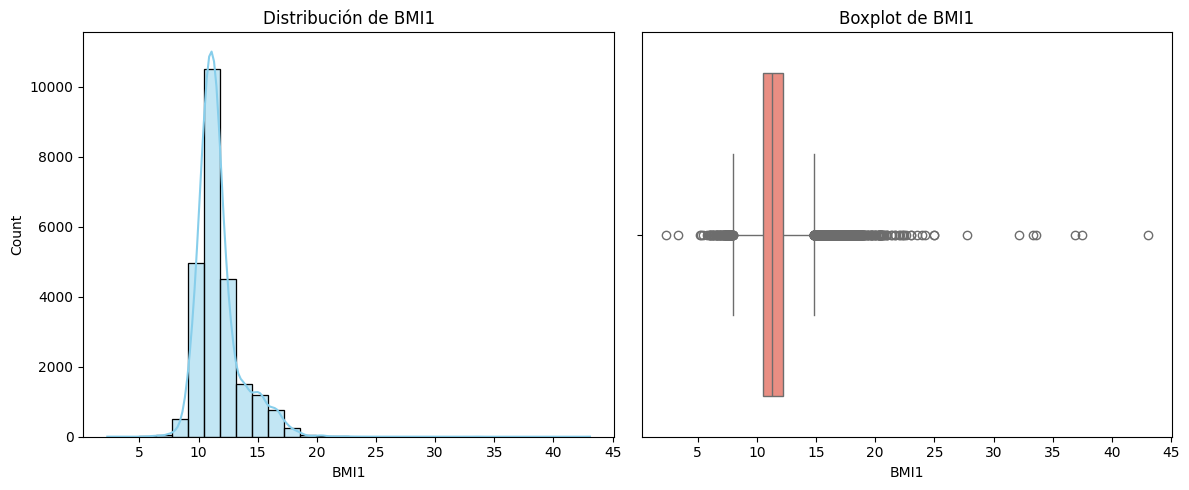

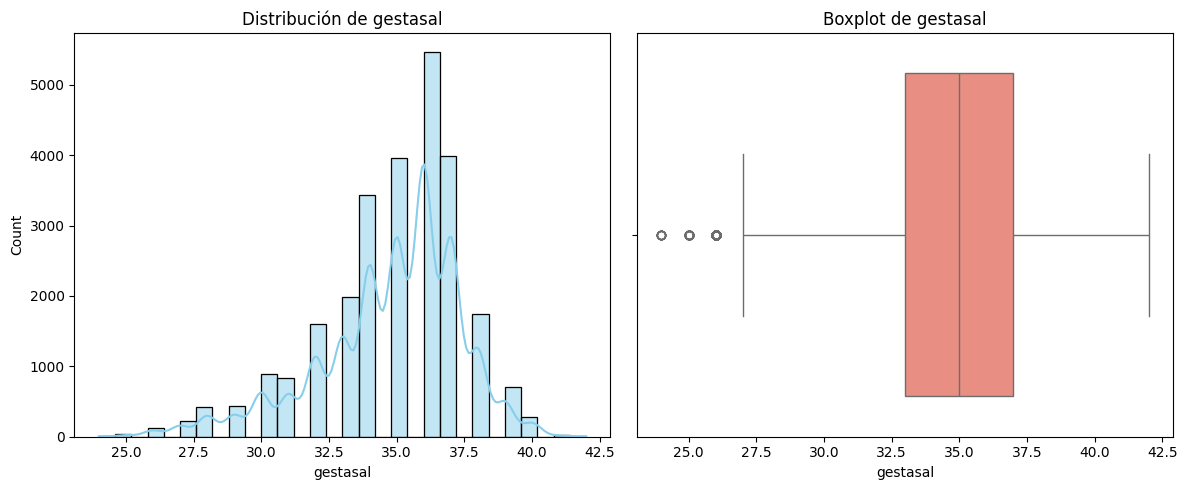

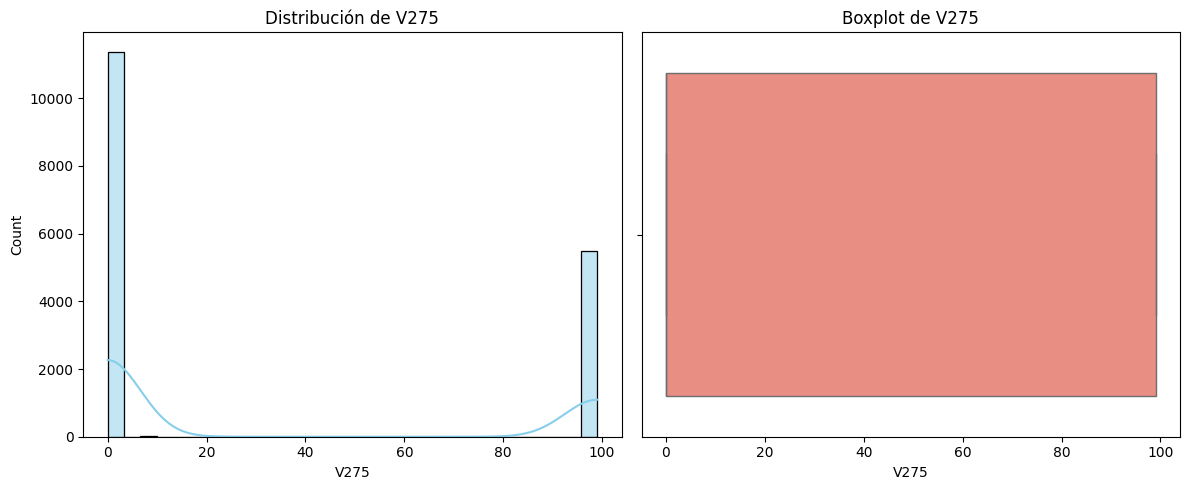

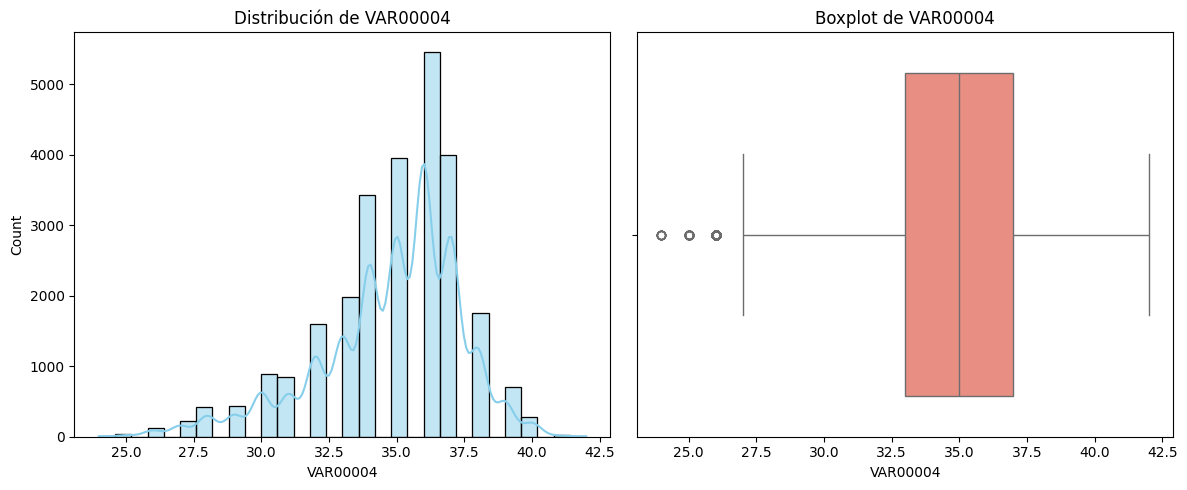

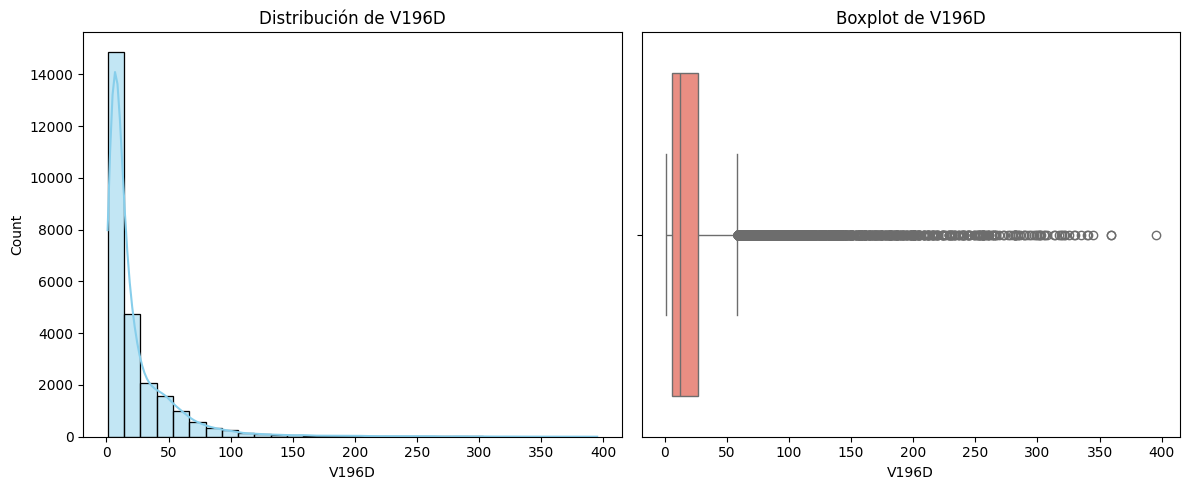

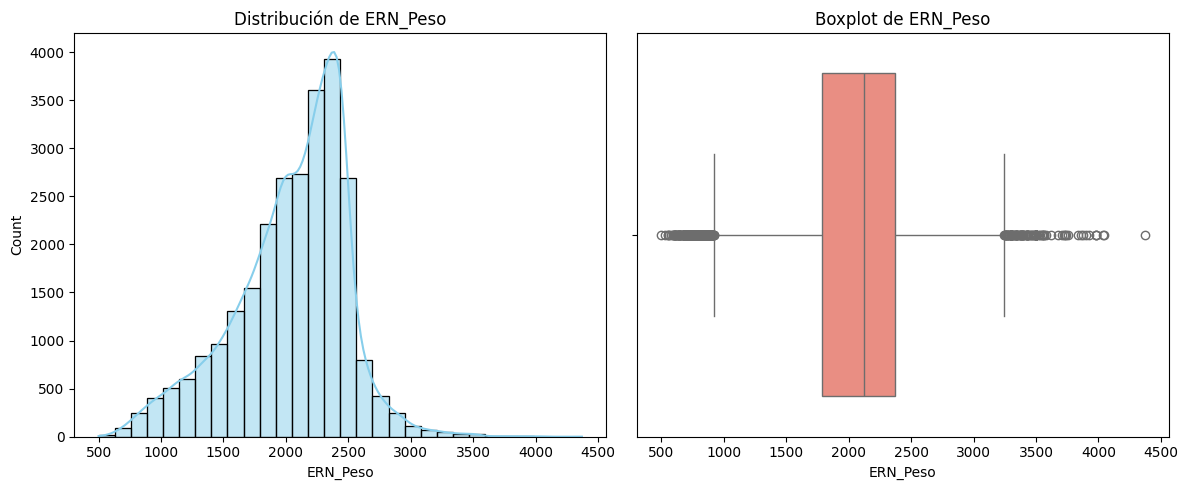

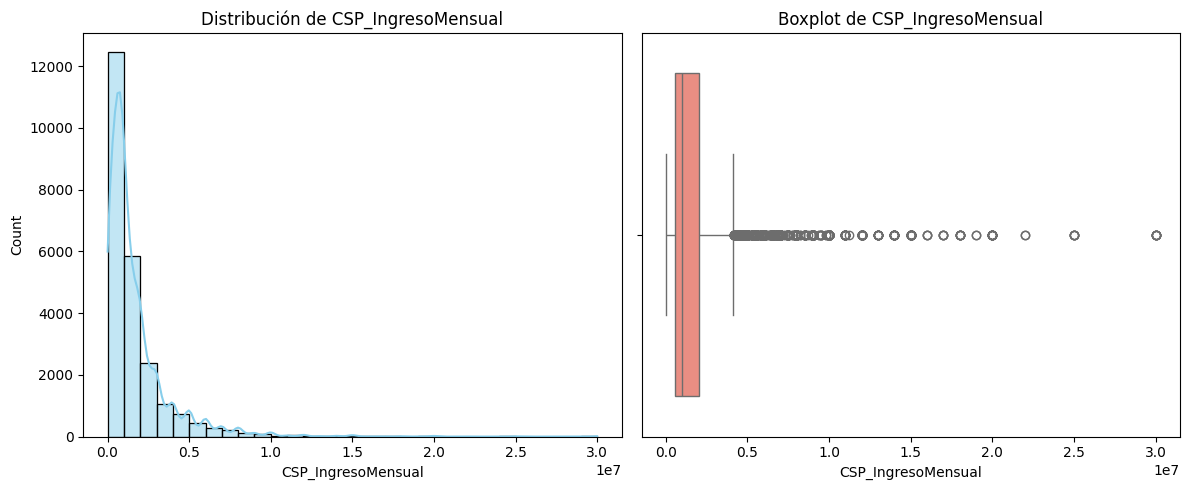

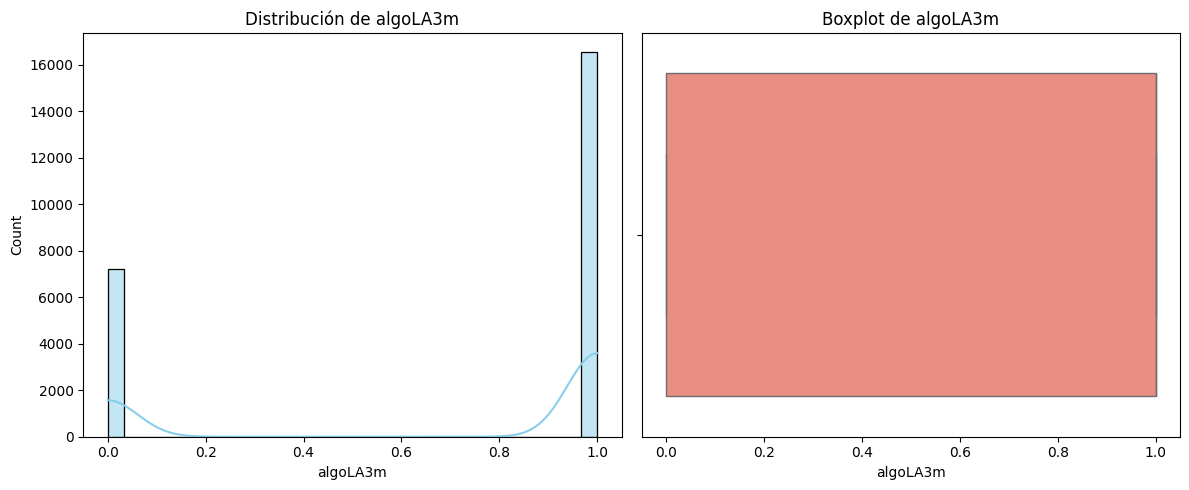

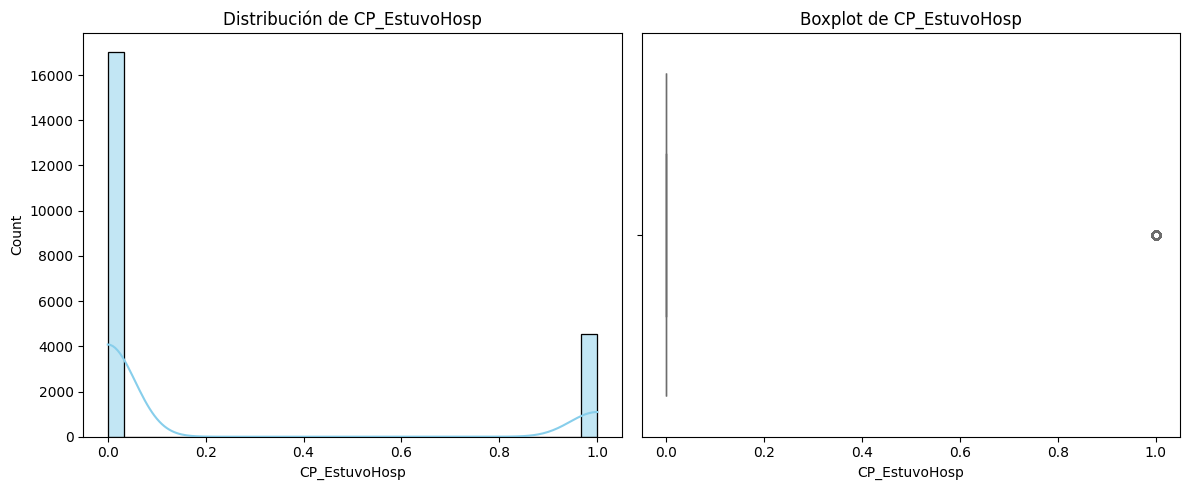

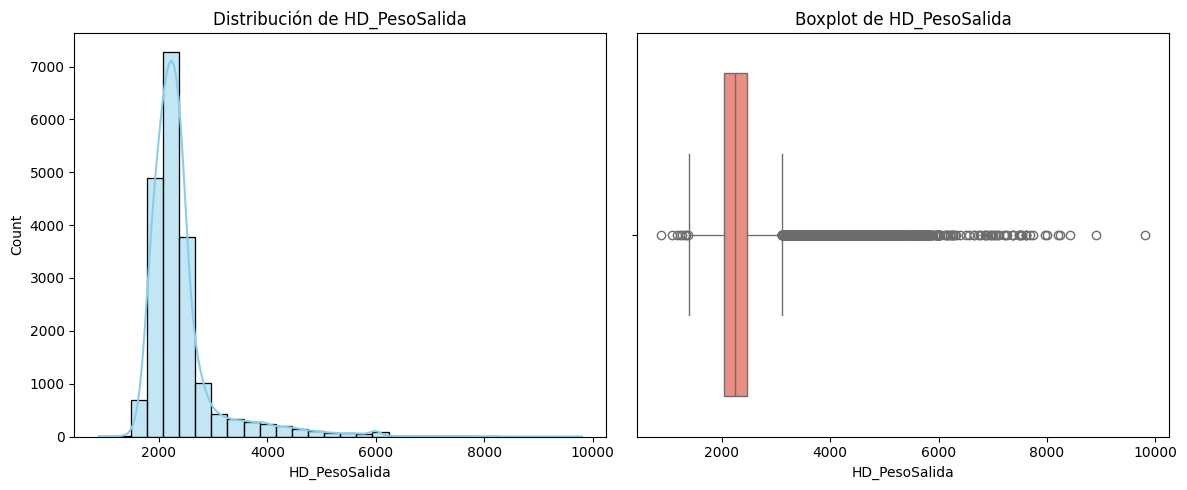

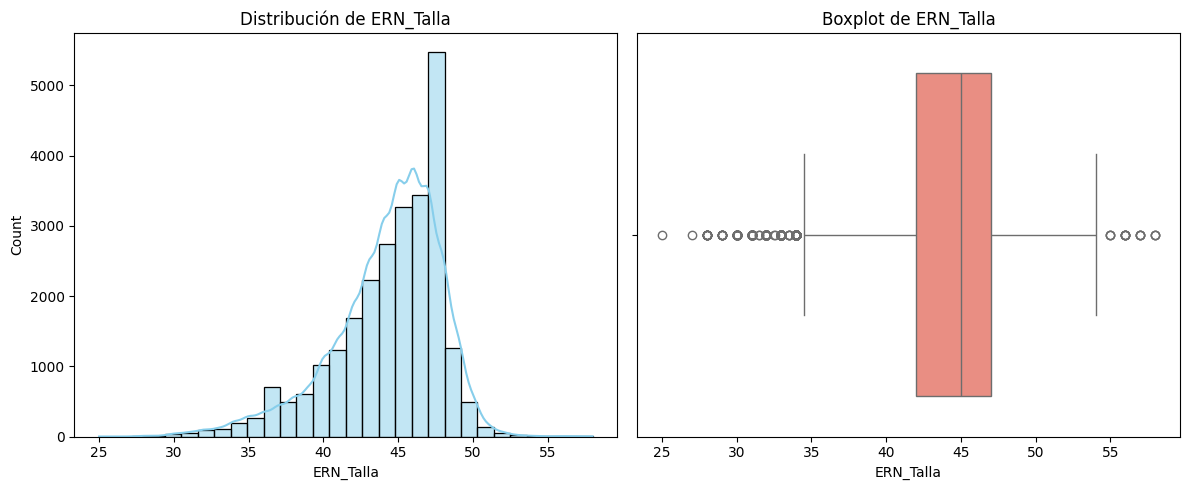

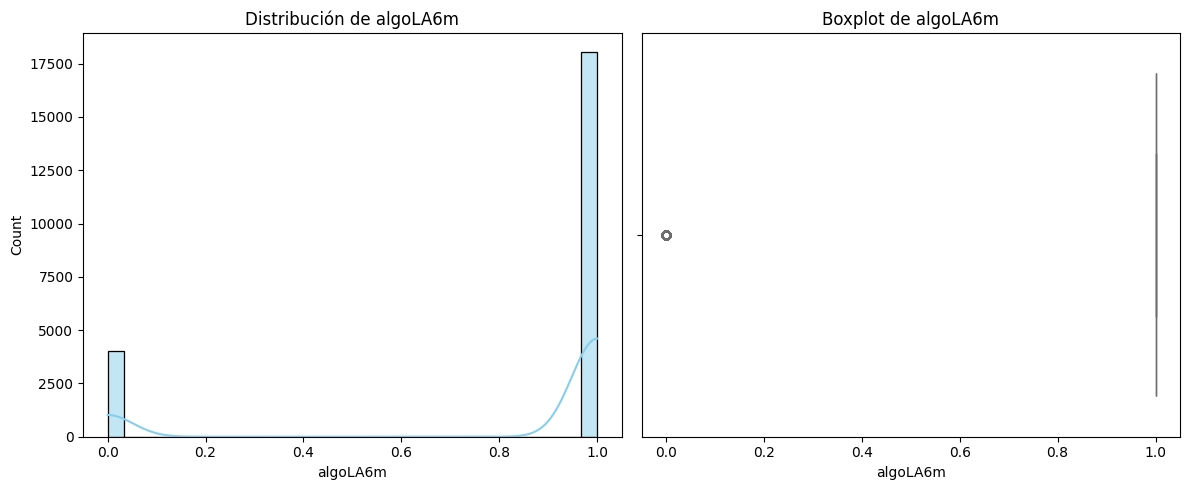

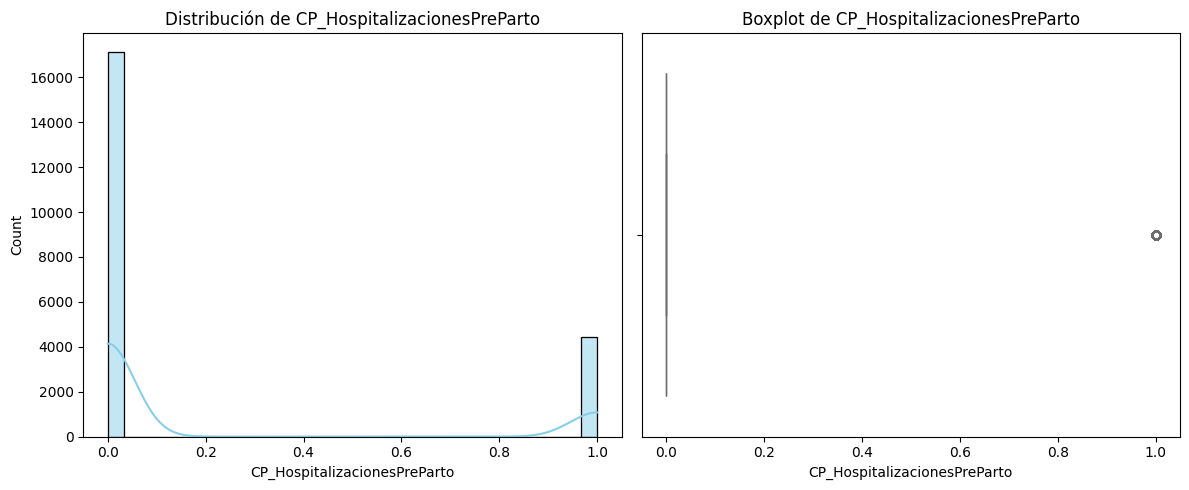

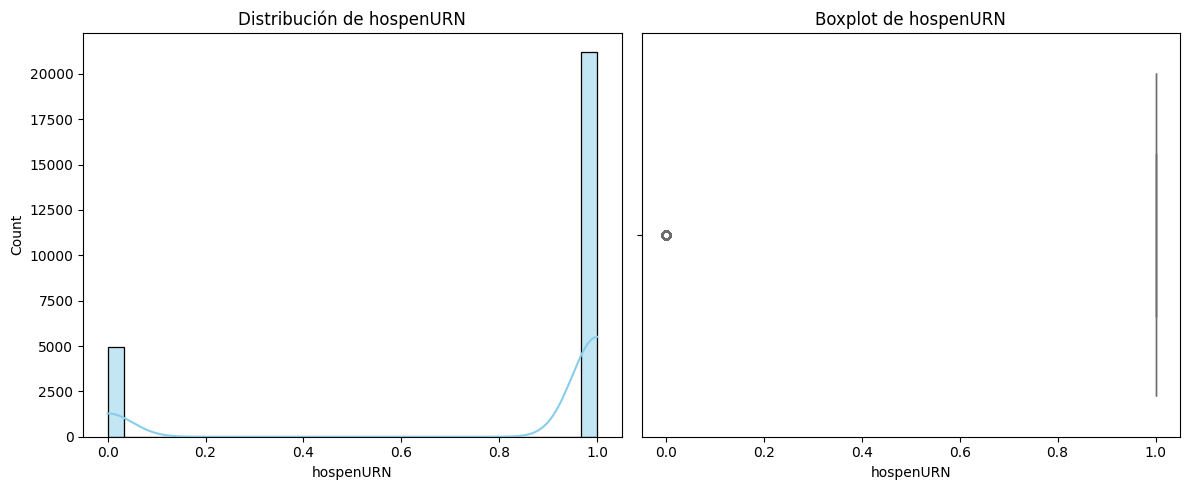

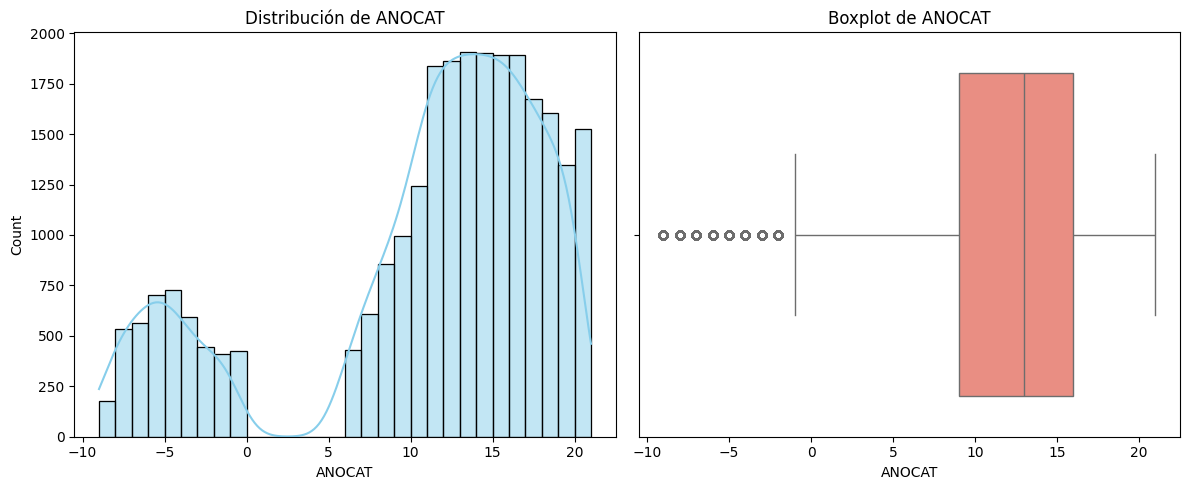

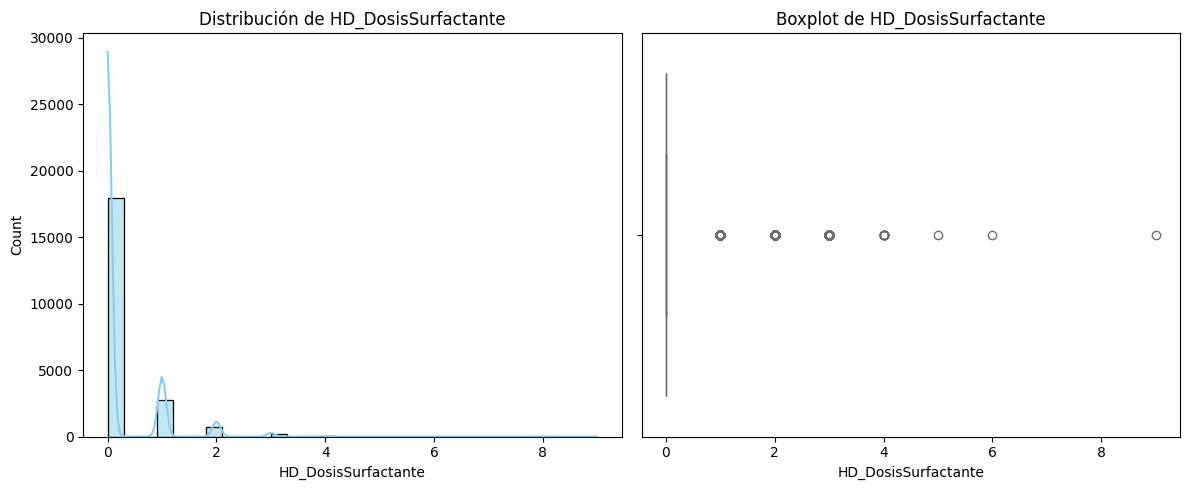

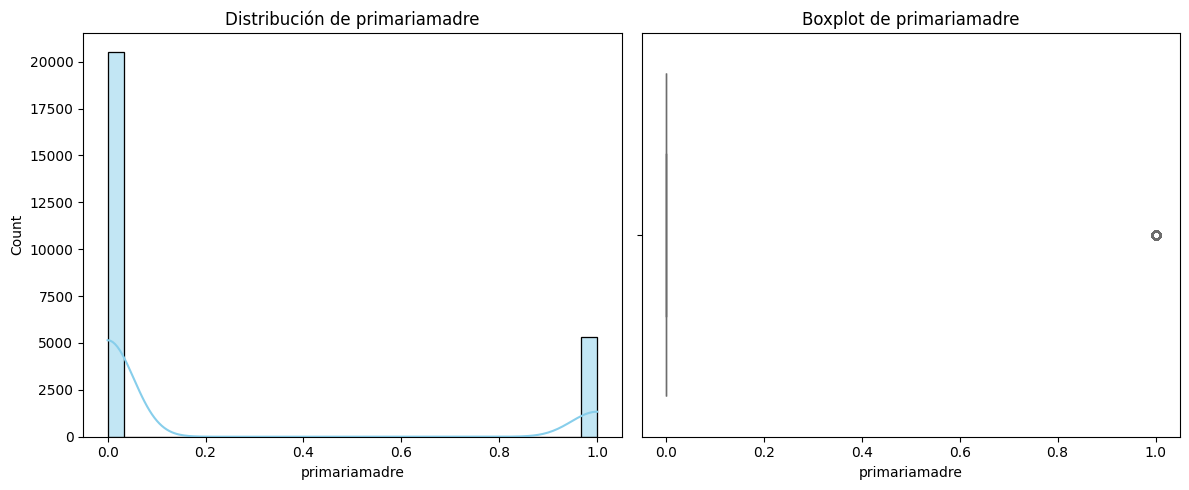

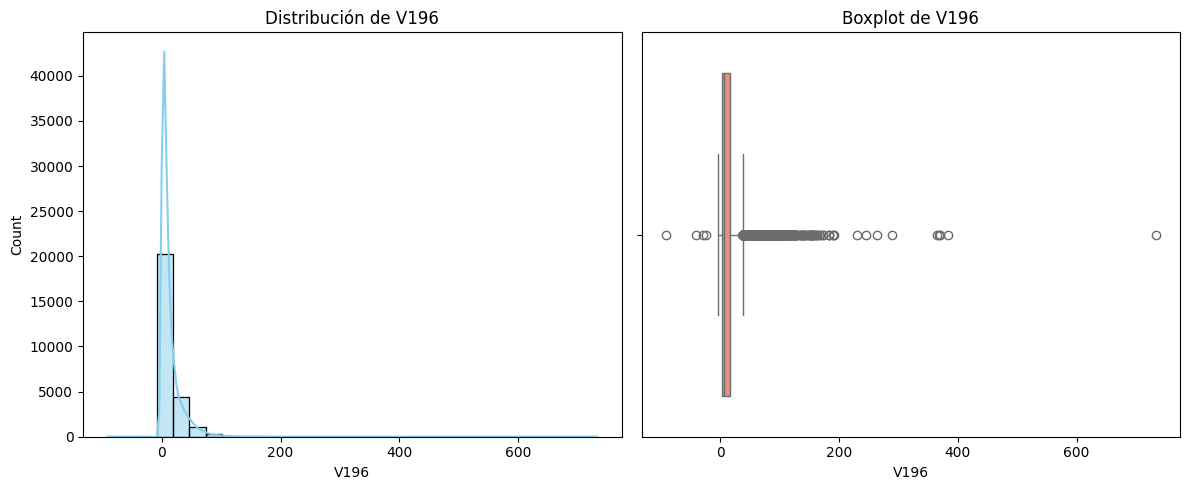

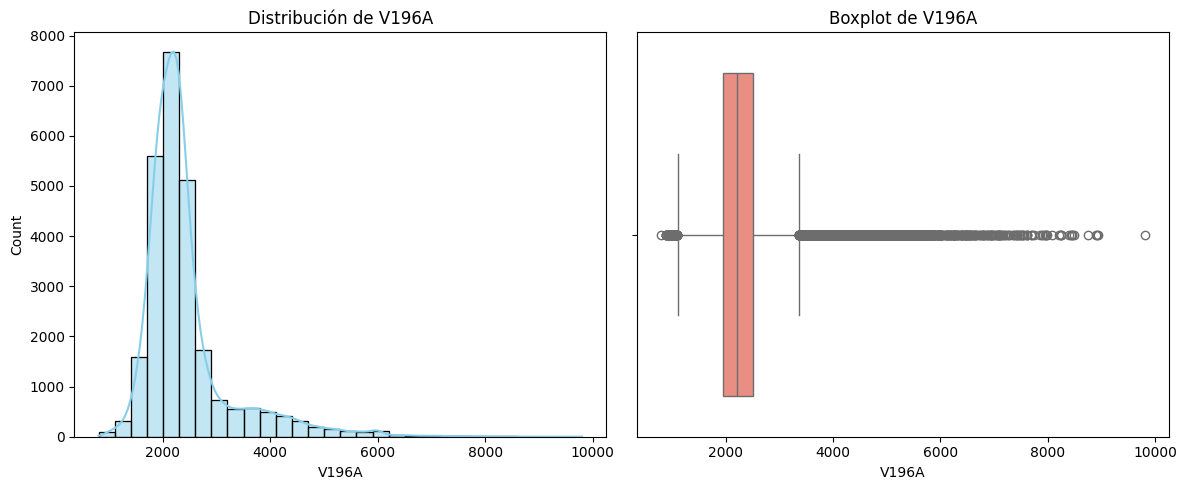

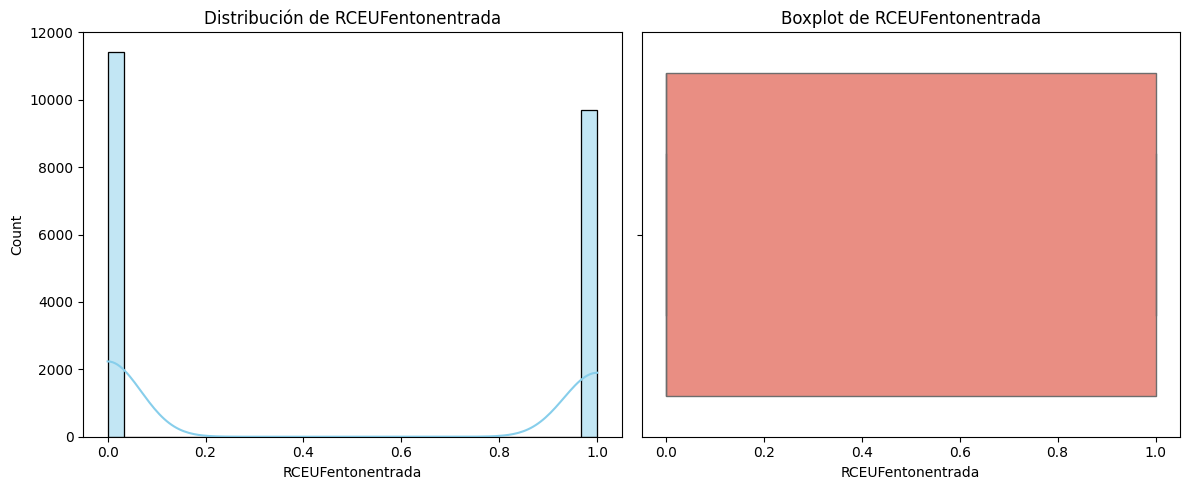

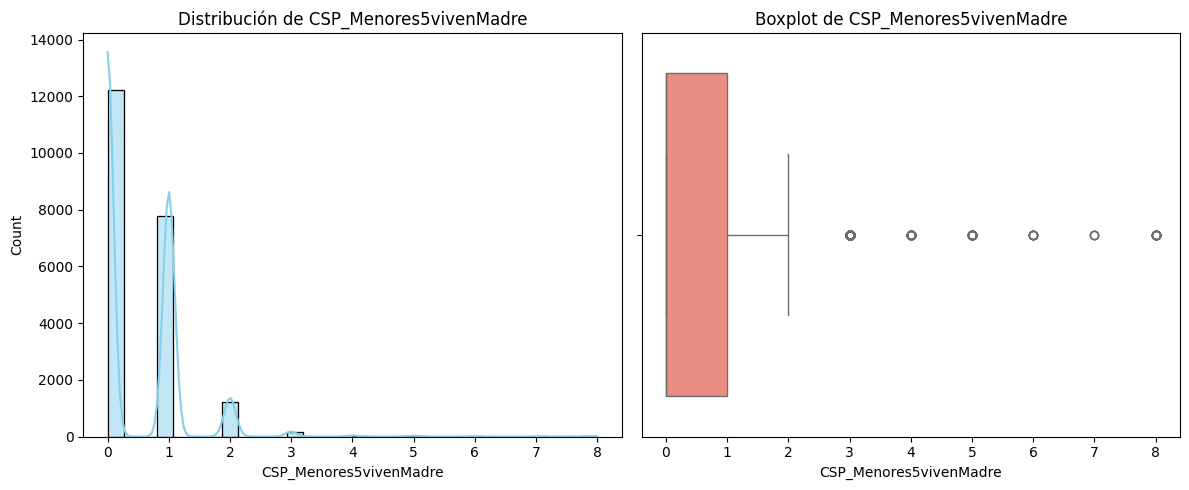

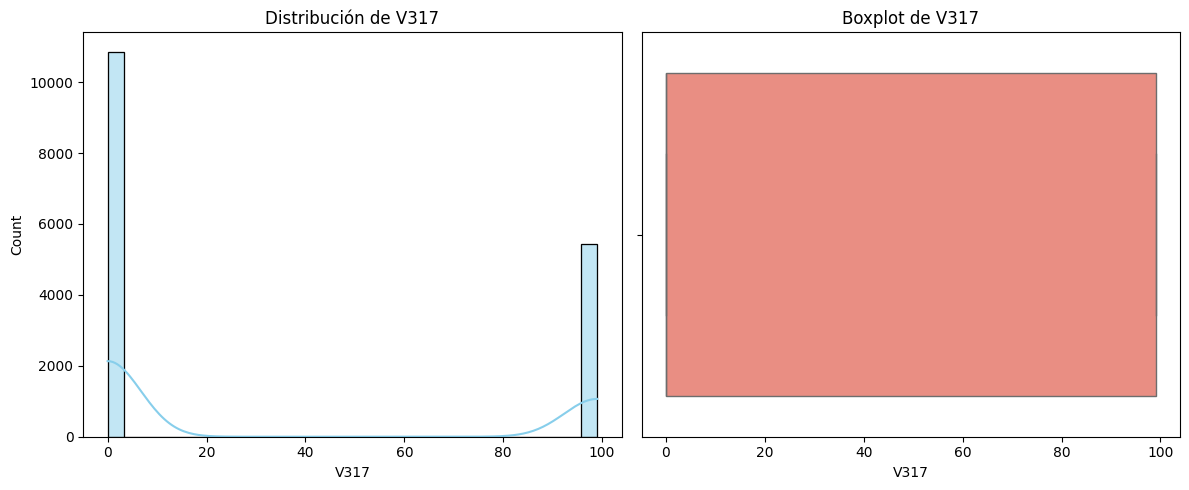

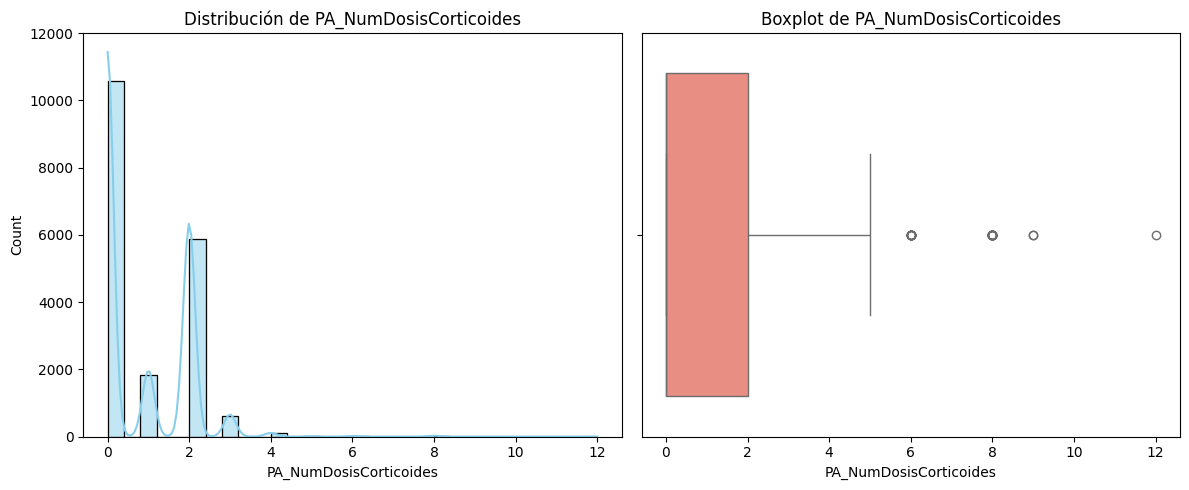

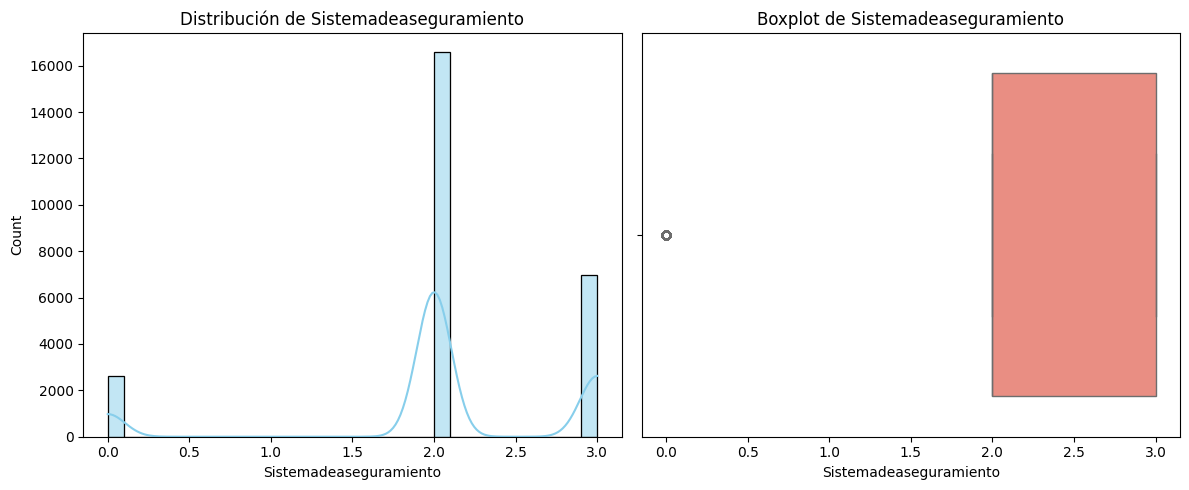

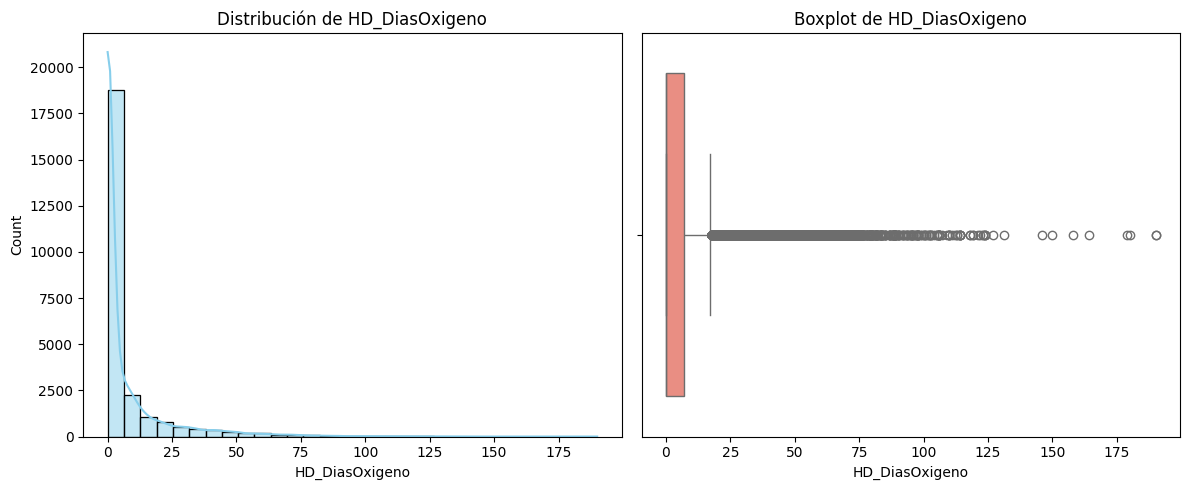

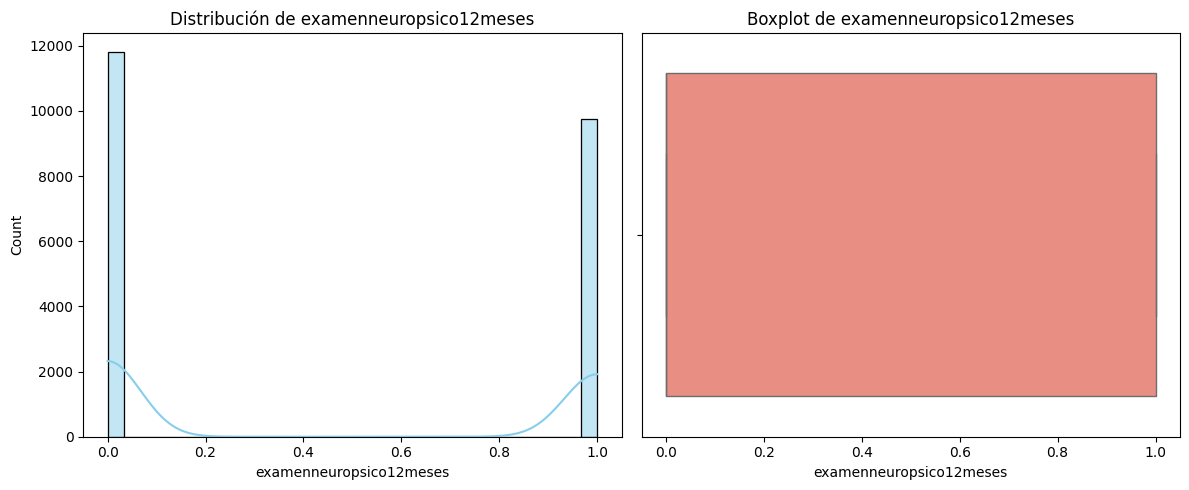

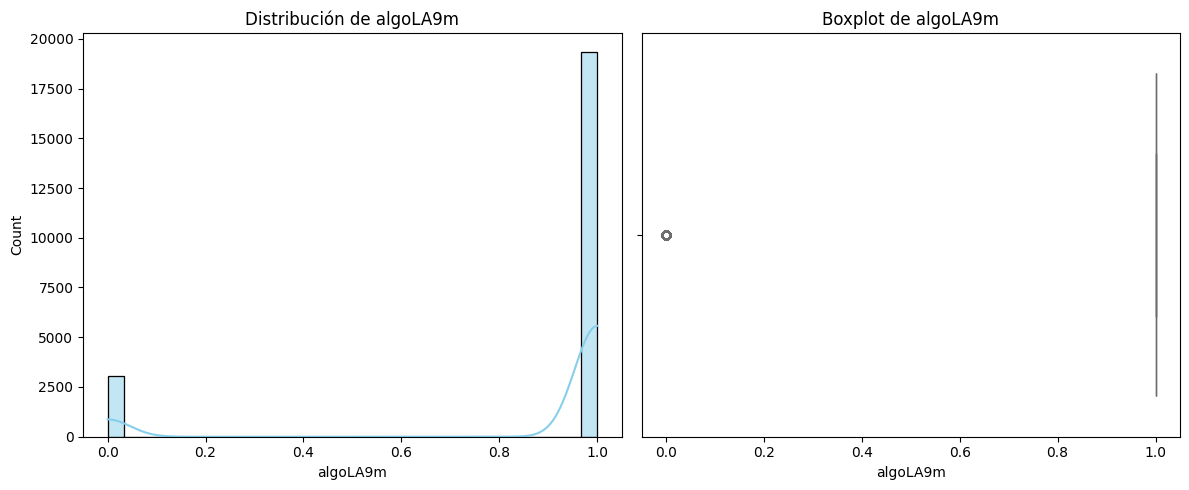

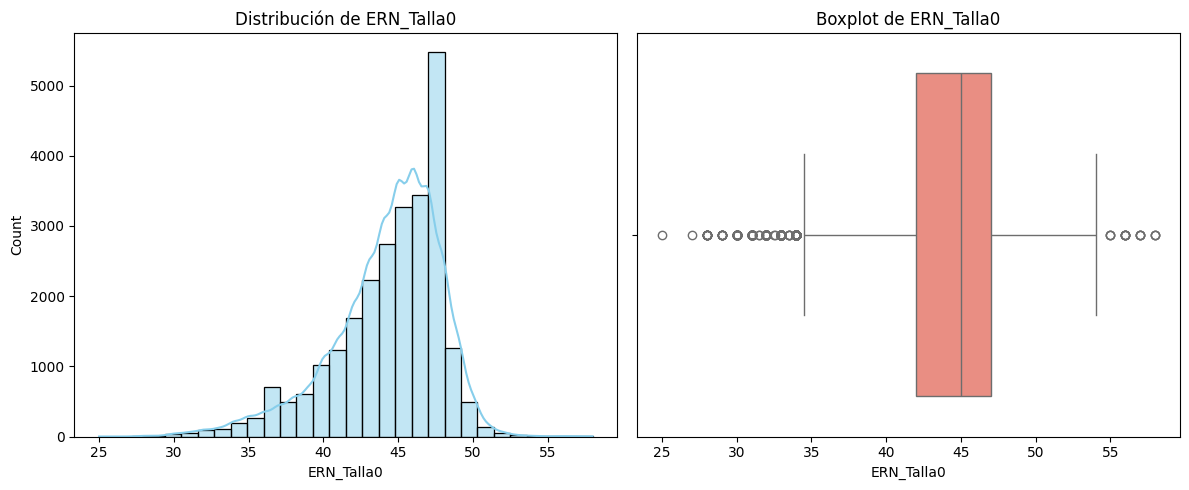

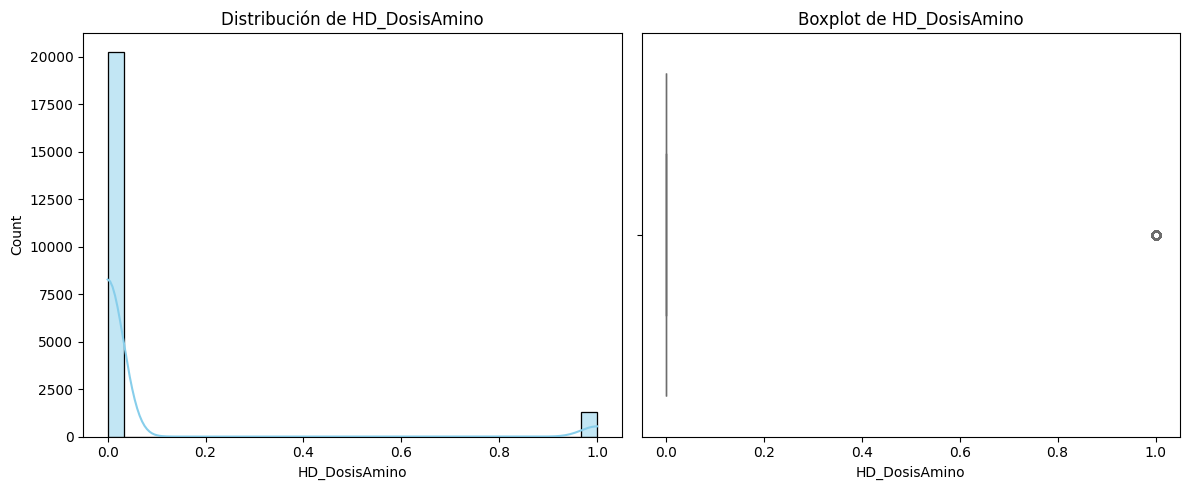

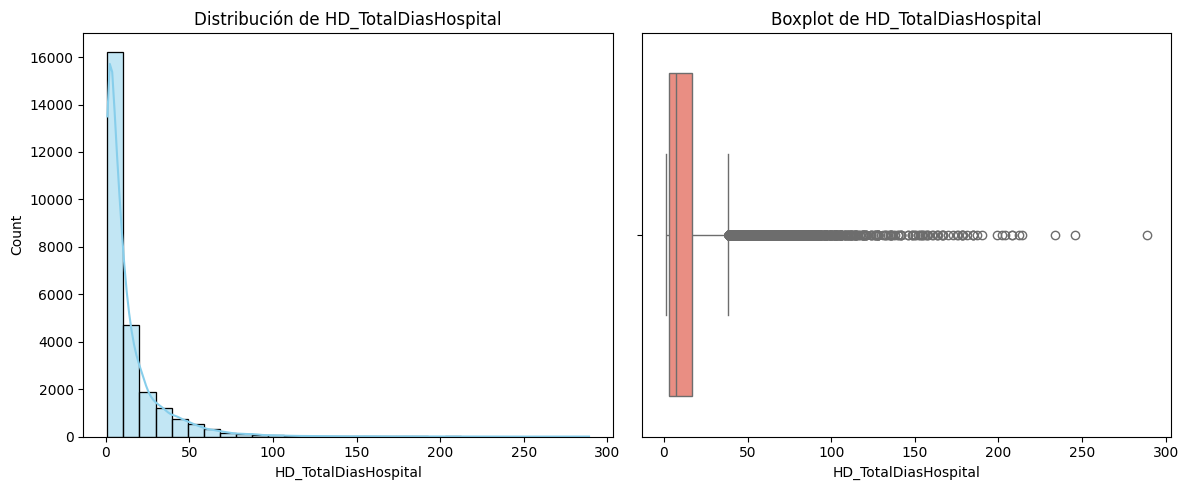

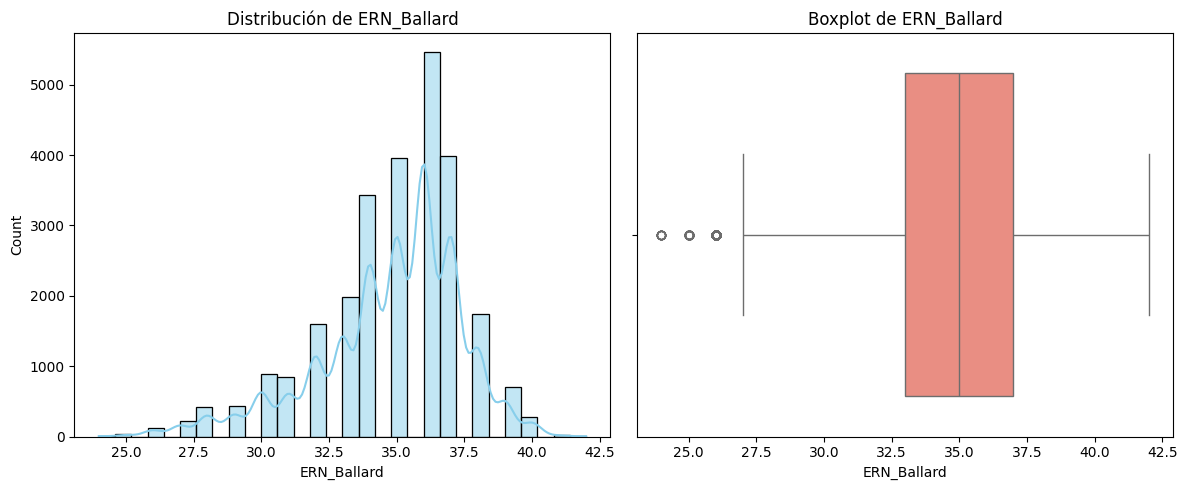

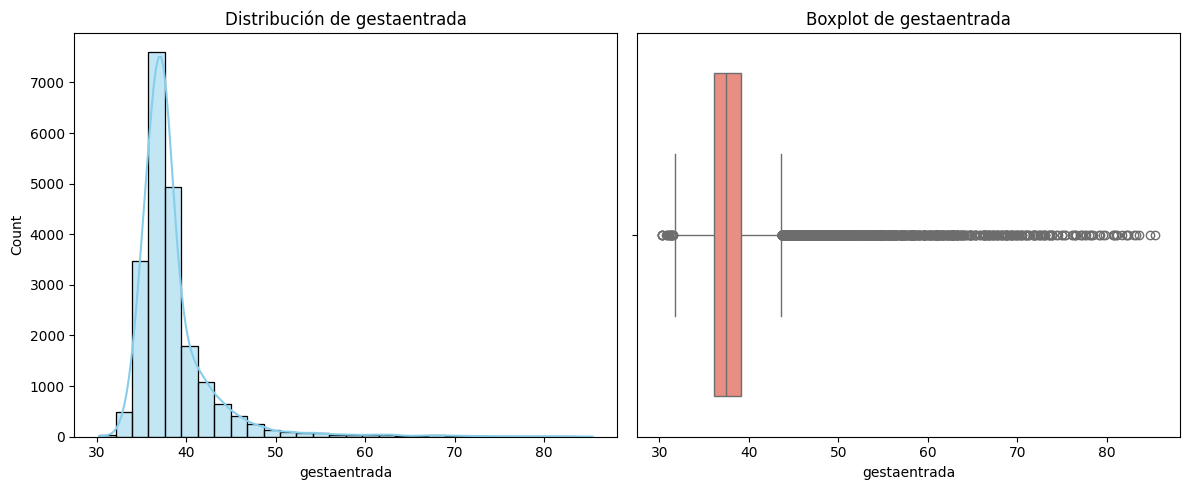

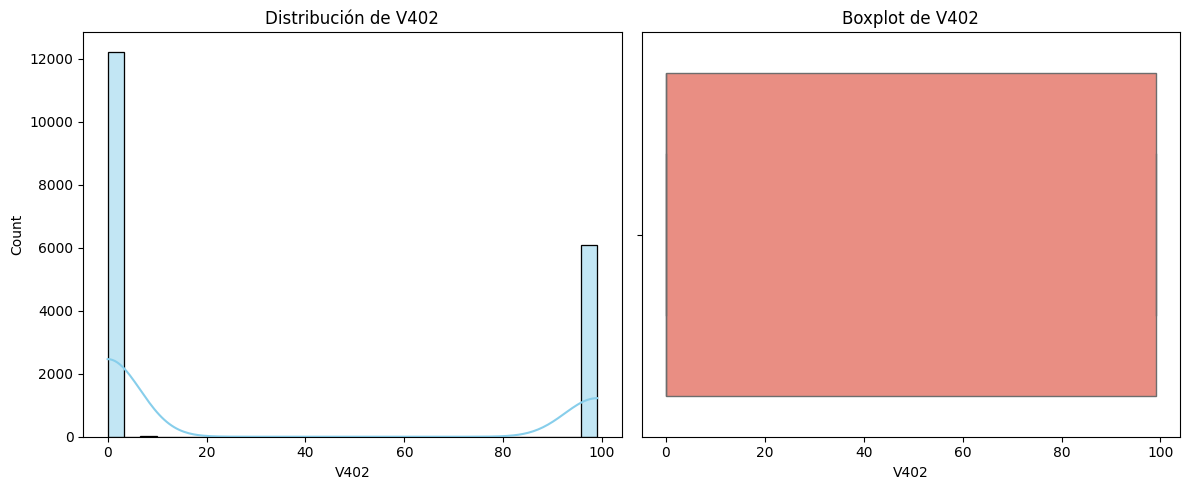

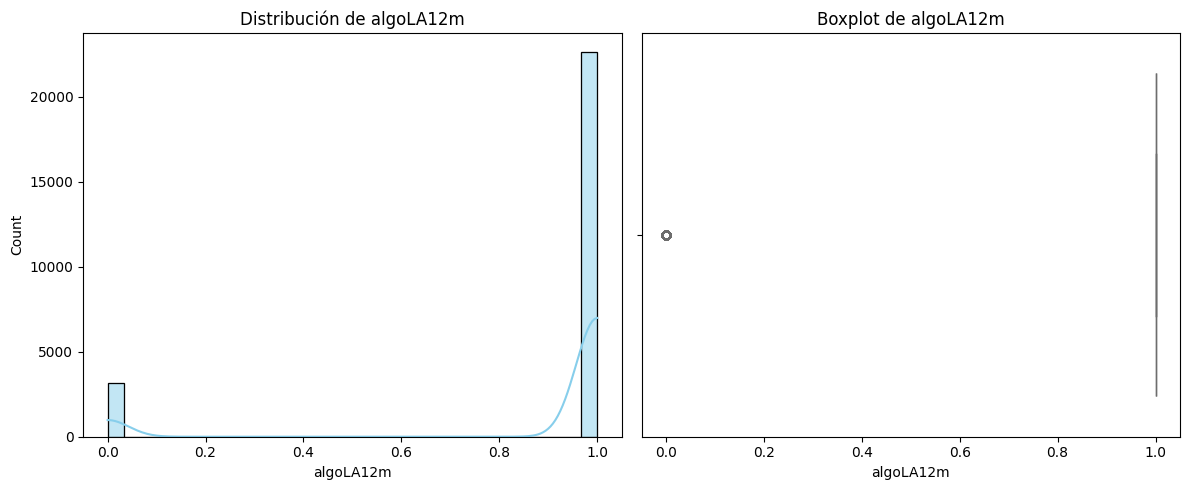

In [170]:
var_num = df_subset.select_dtypes(include=['number']).columns

for var in var_num:
    plt.figure(figsize=(12,5))
    
    # Histograma con curva KDE
    plt.subplot(1,2,1)
    sns.histplot(df_subset[var], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribución de {var}")
    
    # Boxplot para ver outliers y dispersión
    plt.subplot(1,2,2)
    sns.boxplot(x=df_subset[var], color="salmon")
    plt.title(f"Boxplot de {var}")
    
    plt.tight_layout()
    plt.show()

**EDA** Bivariado (target, variables seleccionadas).

In [171]:
from pandas.api.types import is_numeric_dtype

def plot_bivariados(df, var_list, targets, max_levels=10, sample_n=None, random_state=42):
    """
    Dibuja 2 gráficos por (variable X, target Y):
      - Si X es numérica: violinplot (horizontal) + stripplot (horizontal)
      - Si X es categórica: heatmap de conteos (YxX) + heatmap de proporciones por fila (YxX)

    Params
    ------
    df : DataFrame con los datos (incluye var_list y targets)
    var_list : lista de nombres de variables X a graficar
    targets : lista de variables objetivo (categóricas) que irán en el eje Y
    max_levels : máximo de categorías a mostrar cuando X sea categórica (se toma top-N por frecuencia)
    sample_n : si quieres muestrear filas para gráficos más rápidos (None = usar todo)
    """
    if sample_n is not None and len(df) > sample_n:
        df = df.sample(sample_n, random_state=random_state)

    # Asegurar targets como categóricos para graficar
    df = df.copy()
    for y in targets:
        if not pd.api.types.is_categorical_dtype(df[y]):
            df[y] = df[y].astype('category')

    for x in var_list:
        # Determinar si X es numérica o categórica (permite casos "mal tipados")
        x_is_numeric = is_numeric_dtype(df[x])
        if not x_is_numeric:
            # Si no es numérica pero tiene pocos niveles únicos, la tratamos como categórica
            # Si llega a ser "numérica en string", se verá como categórica aquí (intencional)
            pass

        for y in targets:
            # ----- Caso 1: X numérica vs Y categórica -----
            if x_is_numeric:
                fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
                # (1) Violinplot horizontal
                sns.violinplot(
                    data=df, x=x, y=y,
                    orient='h', cut=0, inner=None, ax=axes[0]
                )
                sns.stripplot(
                    data=df, x=x, y=y,
                    orient='h', size=2, alpha=0.35, color='k', ax=axes[0]
                )
                axes[0].set_title(f"{y} vs {x} · Violin + puntos")

                # (2) Stripplot solo (más simple/ligero)
                sns.stripplot(
                    data=df, x=x, y=y,
                    orient='h', size=3, alpha=0.5, ax=axes[1]
                )
                axes[1].set_title(f"{y} vs {x} · Puntos (jitter)")

                fig.suptitle(f"Bivariado: {y} (Y) vs {x} (X) [numérico]", y=1.02)
                plt.show()

            # ----- Caso 2: X categórica vs Y categórica -----
            else:
                # Limitar categorías de X a las top-N por frecuencia
                x_counts = df[x].astype('category')
                if x_counts.cat.categories.size > max_levels:
                    top_cats = df[x].value_counts().nlargest(max_levels).index
                    df_x = df[df[x].isin(top_cats)].copy()
                else:
                    df_x = df.copy()

                # Crosstabs (conteo y proporción por fila)
                ct_counts = pd.crosstab(df_x[y], df_x[x])  # filas: Y, cols: X
                ct_props = ct_counts.div(ct_counts.sum(axis=1).replace(0, np.nan), axis=0)

                fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

                # (1) Heatmap de conteos
                sns.heatmap(
                    ct_counts, annot=False, cmap="Blues", cbar=True, ax=axes[0]
                )
                axes[0].set_title(f"{y}×{x} · Conteos (Y en filas, X en columnas)")
                axes[0].set_xlabel(x); axes[0].set_ylabel(y)

                # (2) Heatmap de proporciones por fila (distribución de X condicionado a Y)
                sns.heatmap(
                    ct_props, annot=False, cmap="YlOrRd", cbar=True, ax=axes[1]
                )
                axes[1].set_title(f"{y}×{x} · Proporciones por fila")
                axes[1].set_xlabel(x); axes[1].set_ylabel(y)

                fig.suptitle(f"Bivariado: {y} (Y) vs {x} (X) [categórica]", y=1.02)
                plt.show()

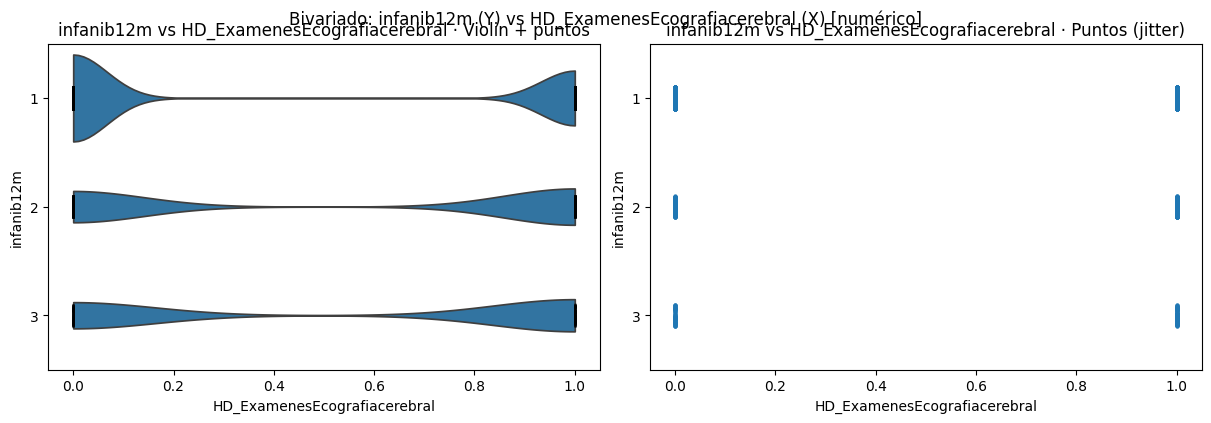

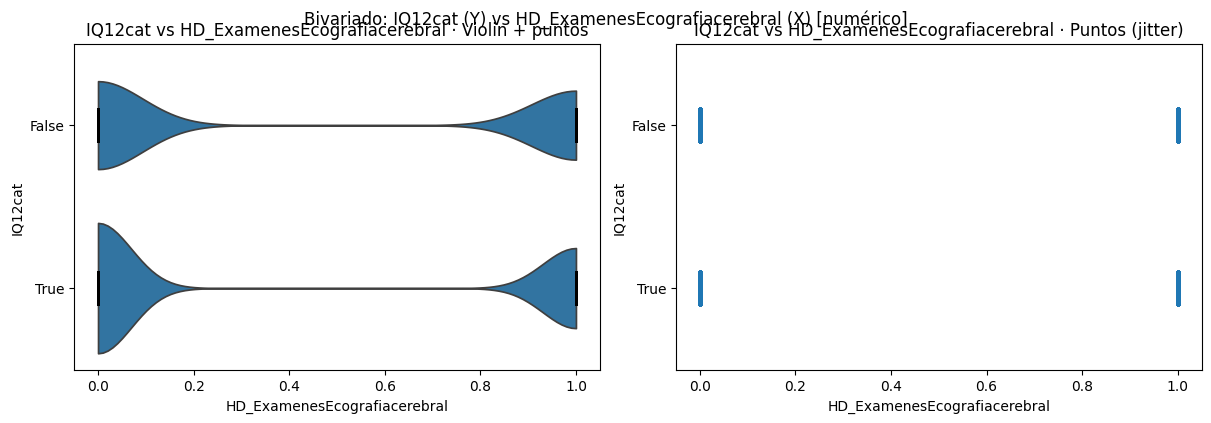

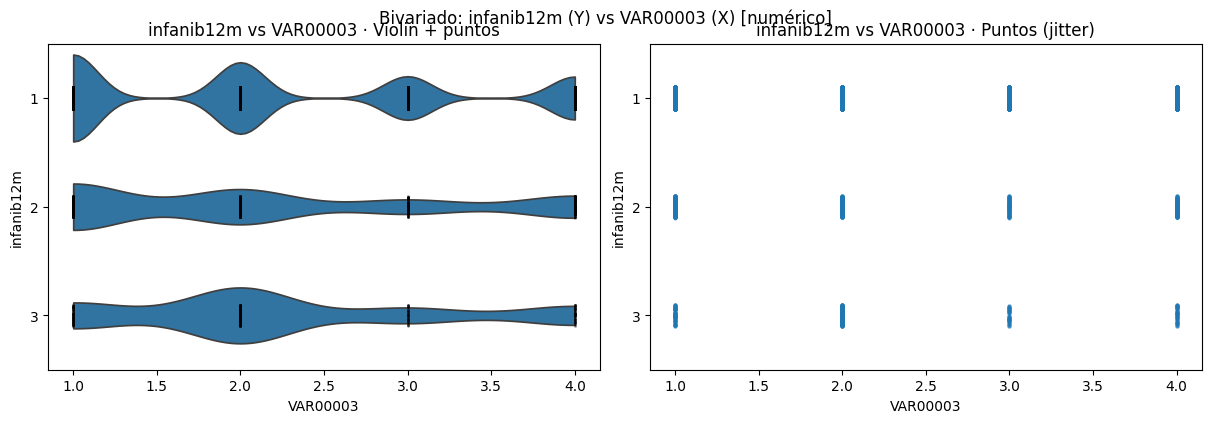

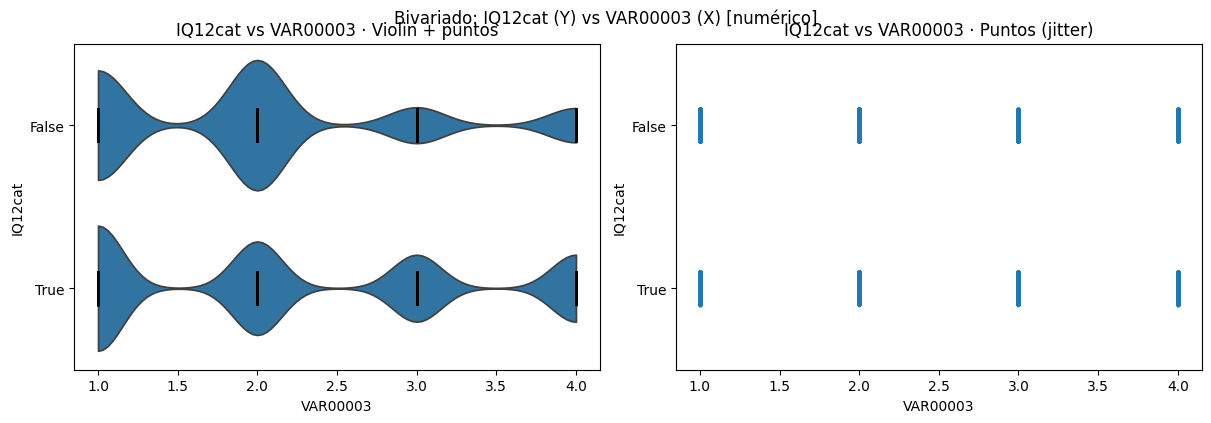

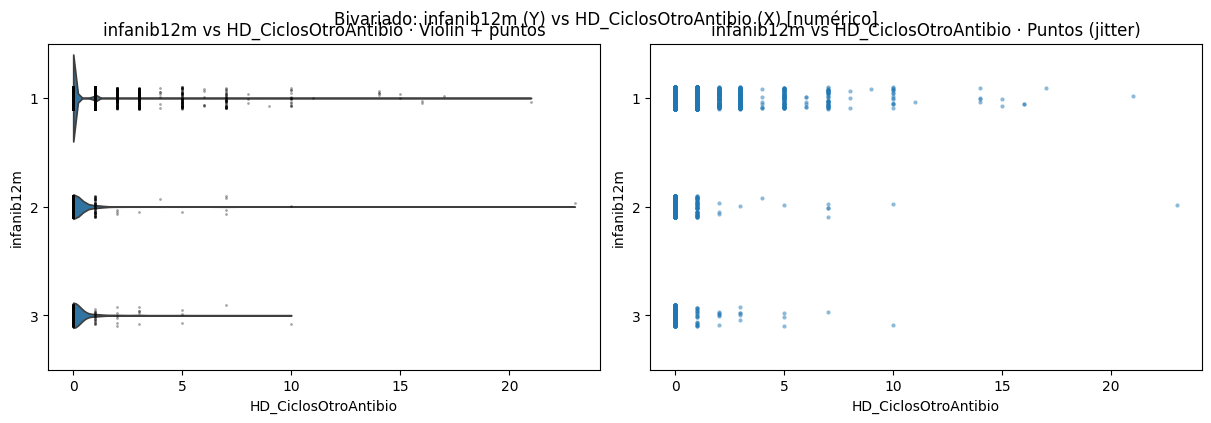

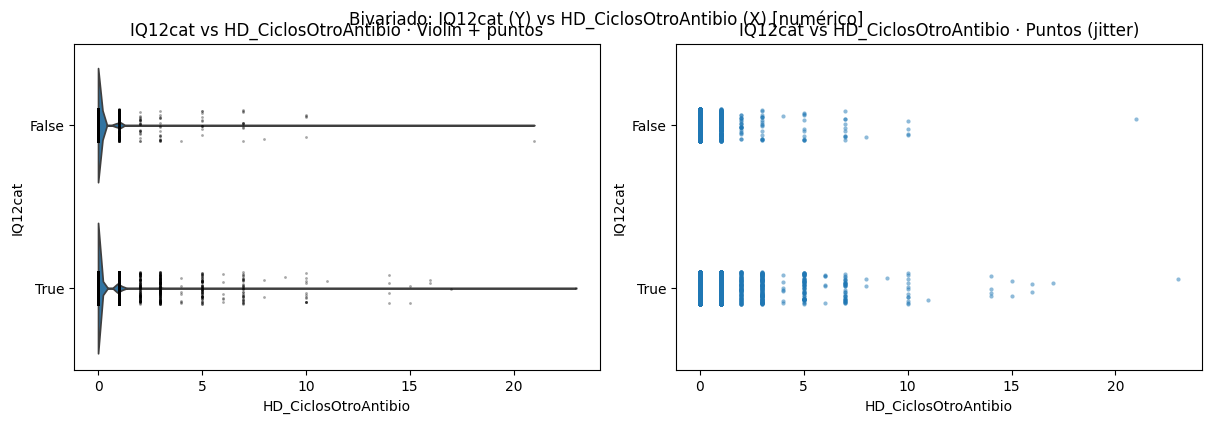

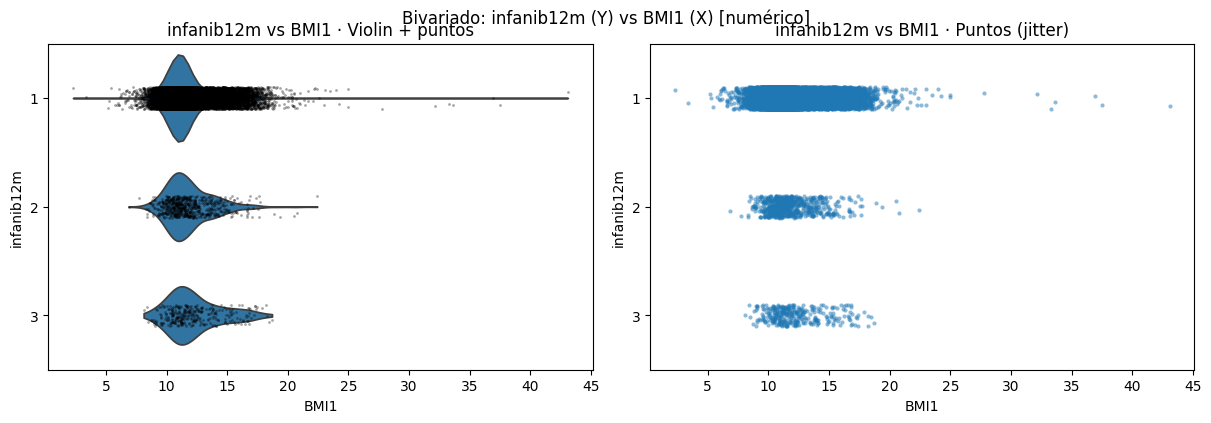

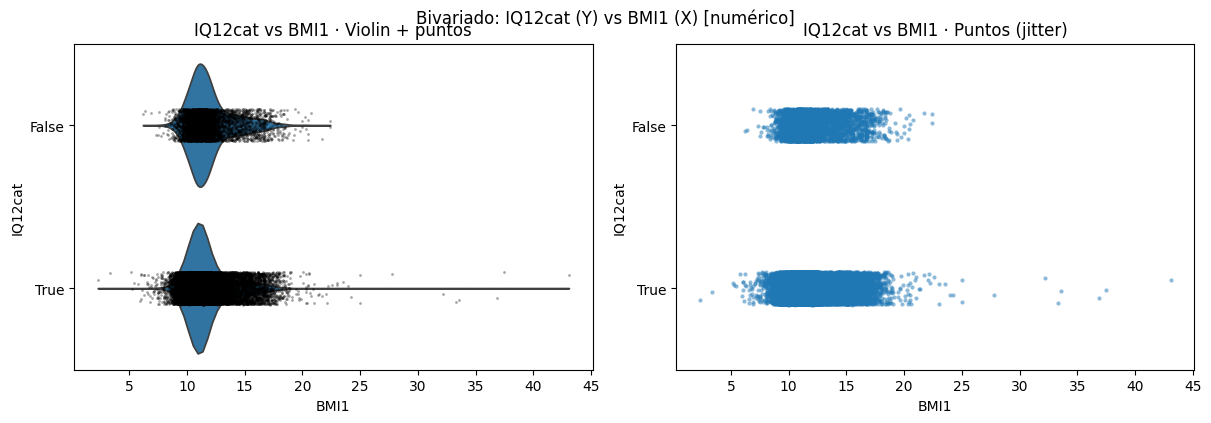

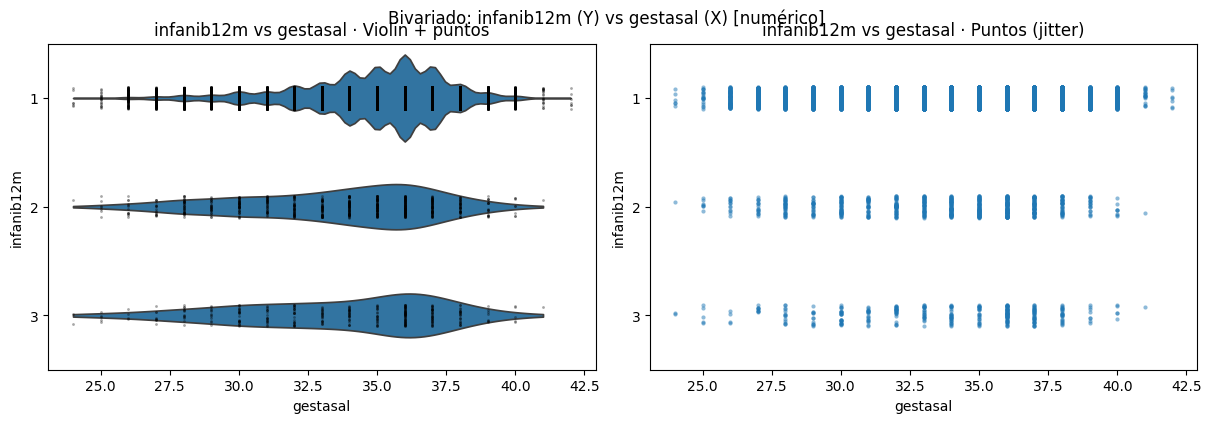

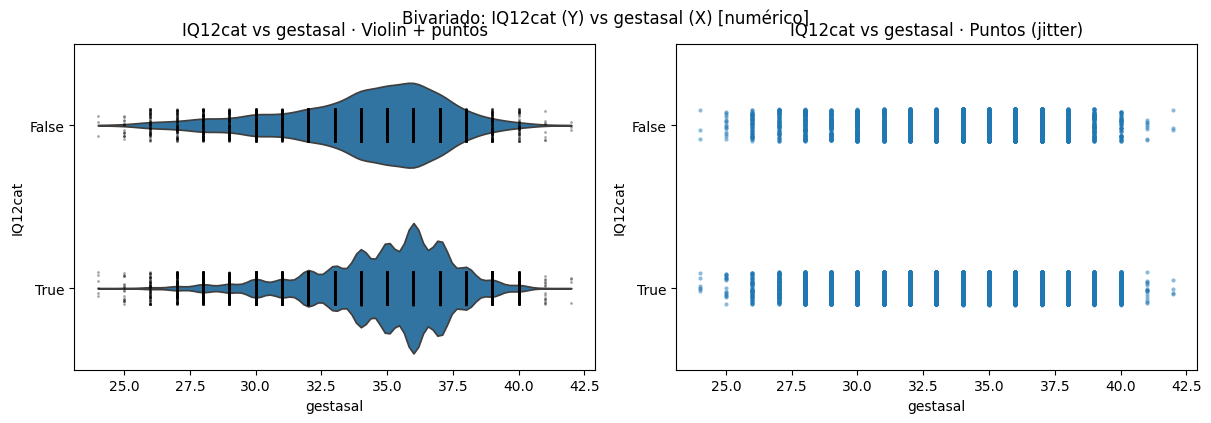

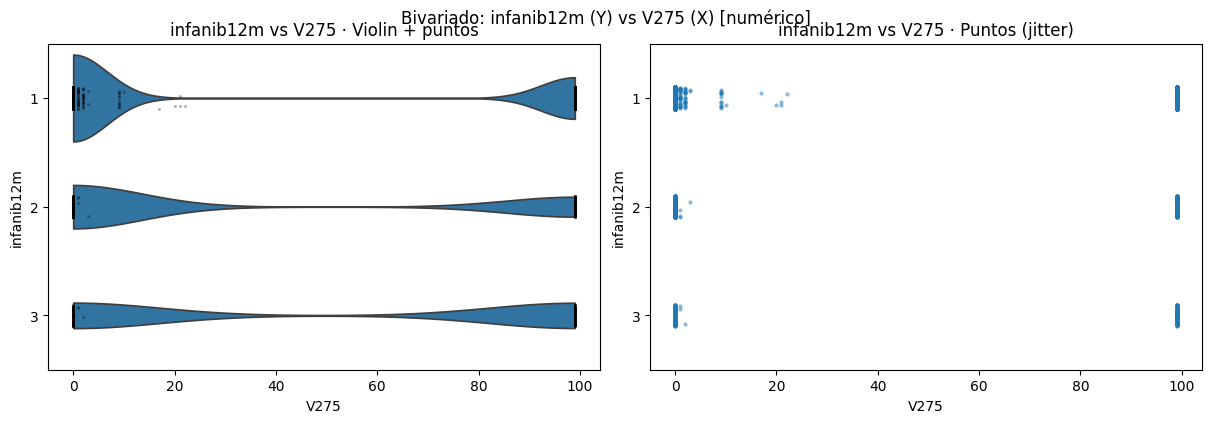

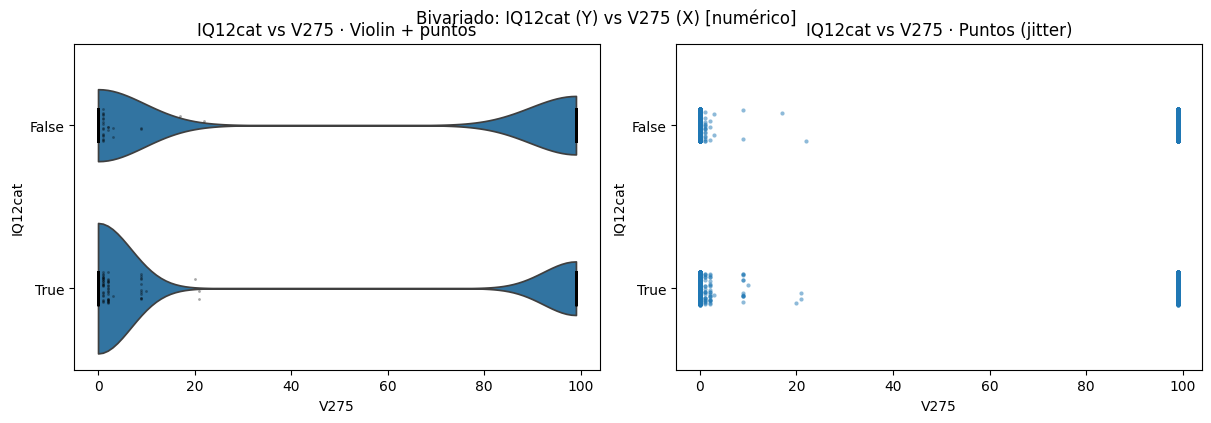

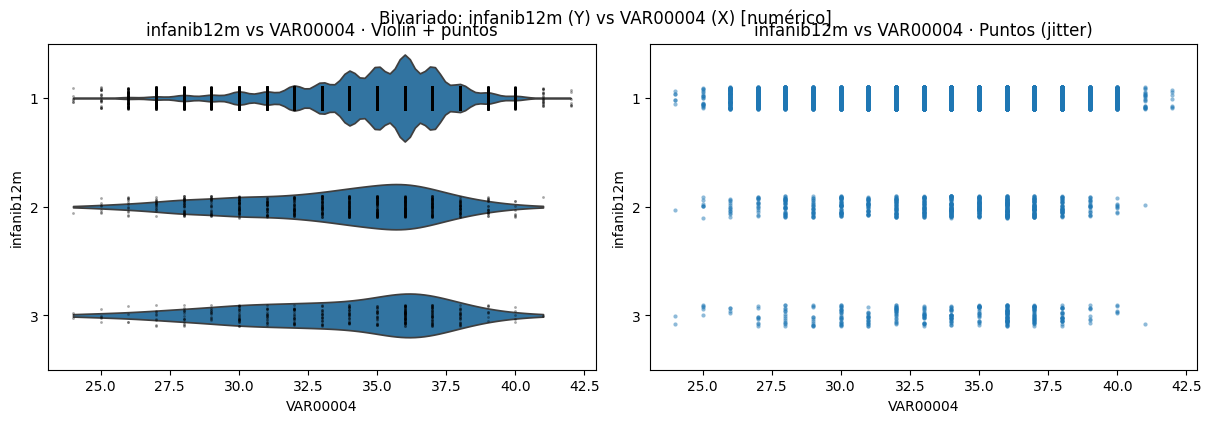

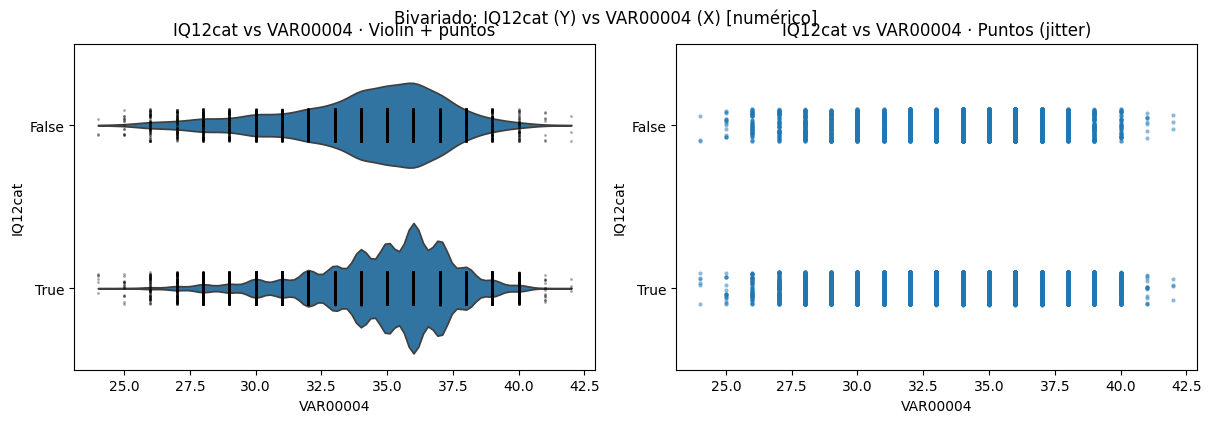

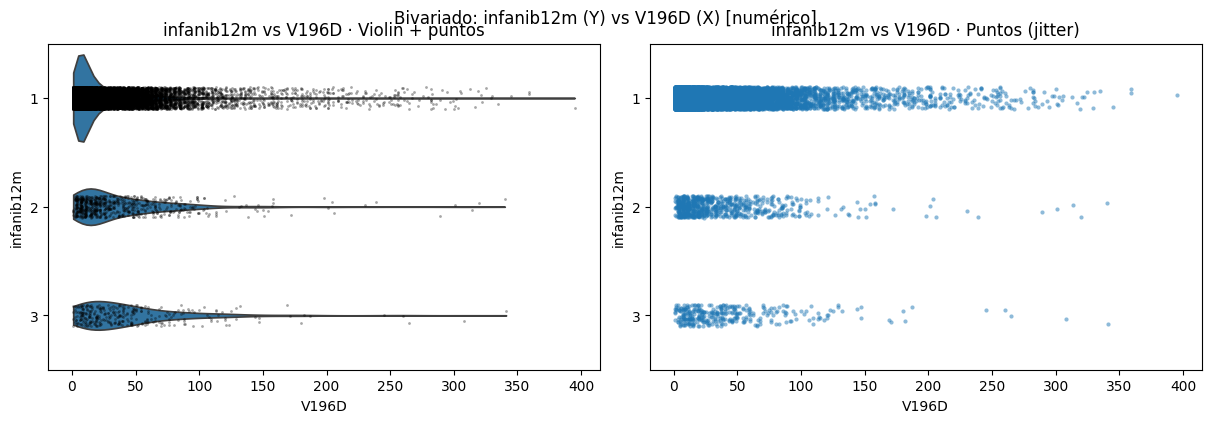

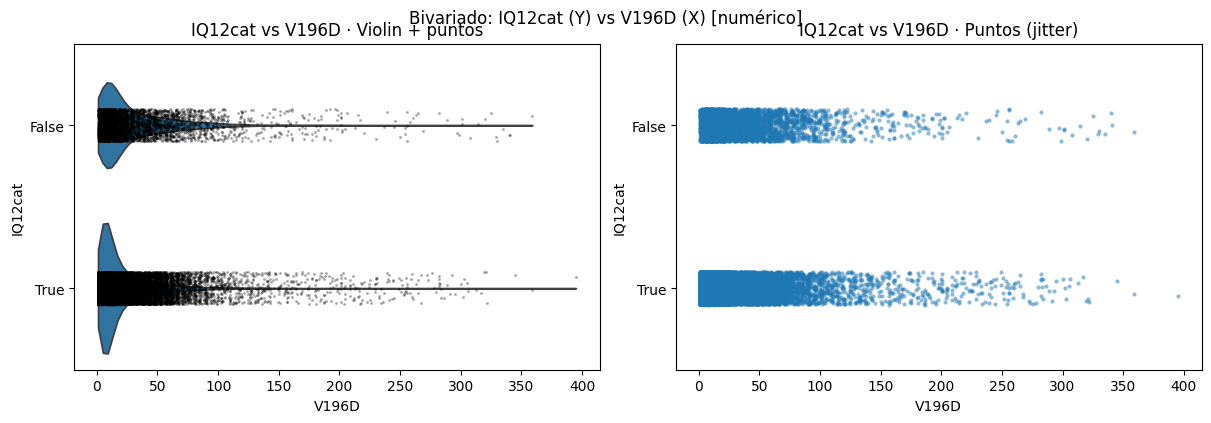

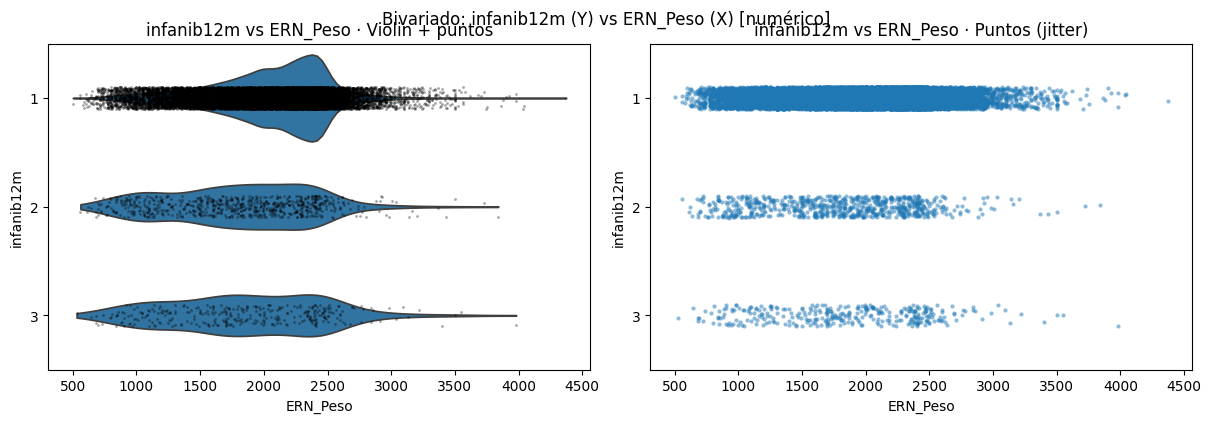

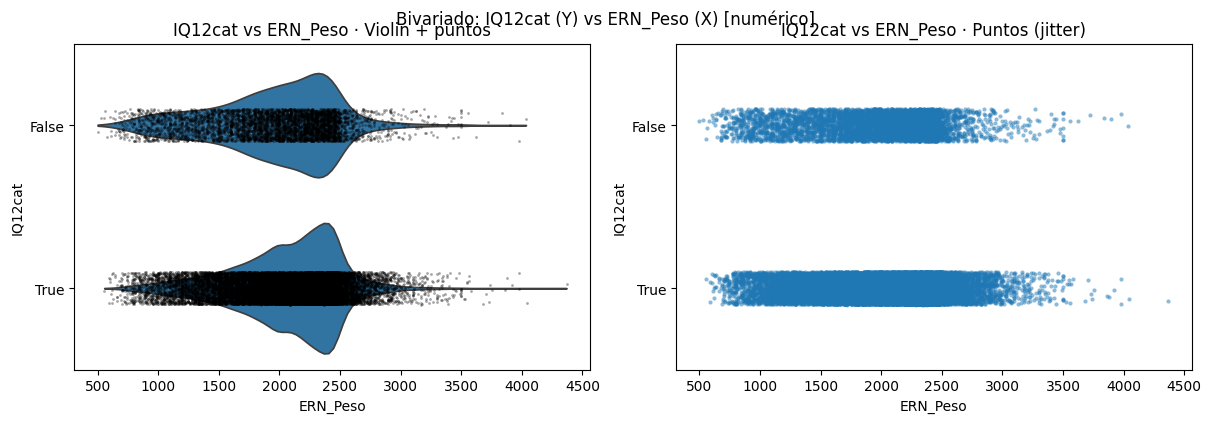

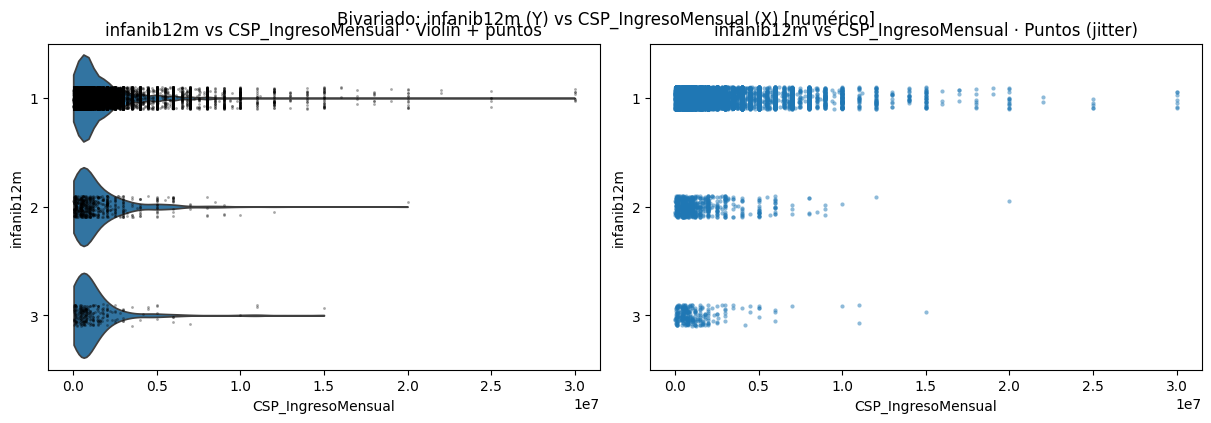

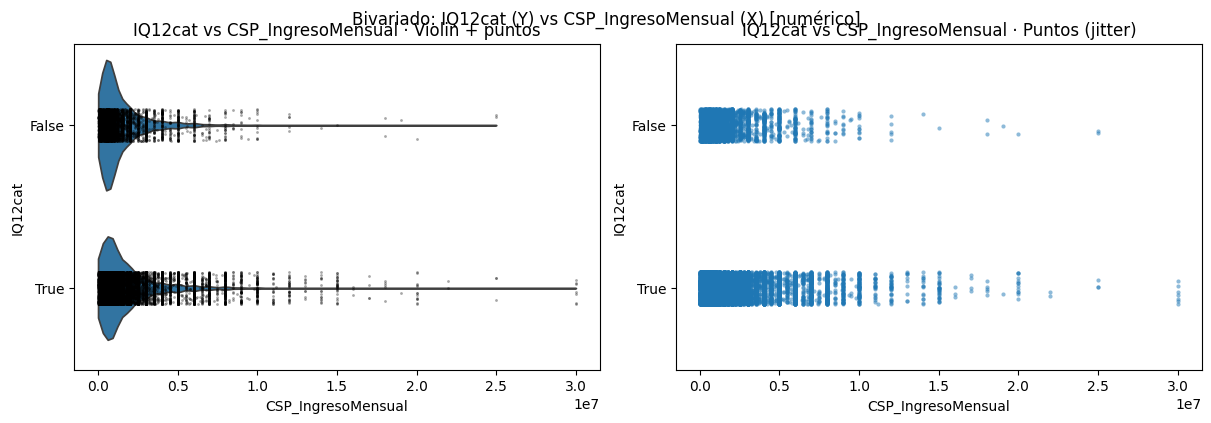

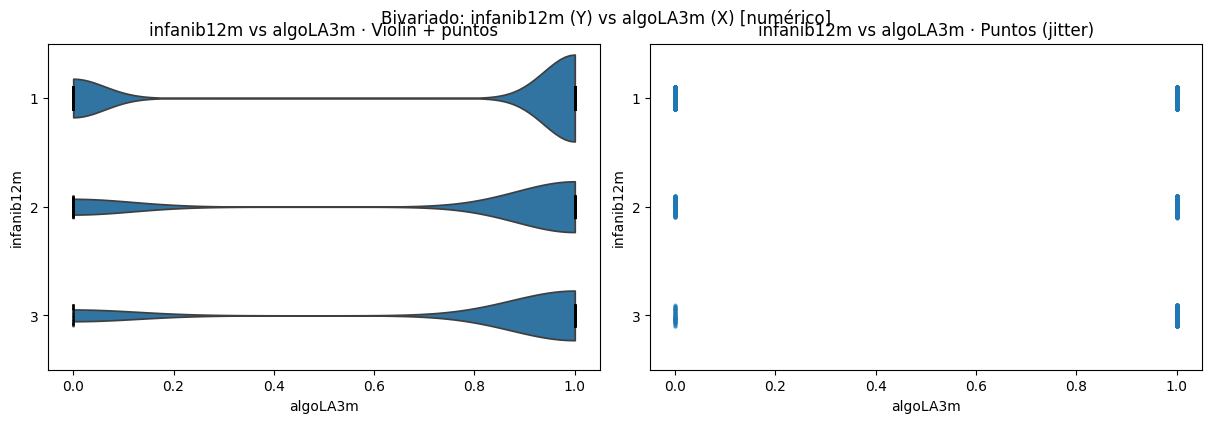

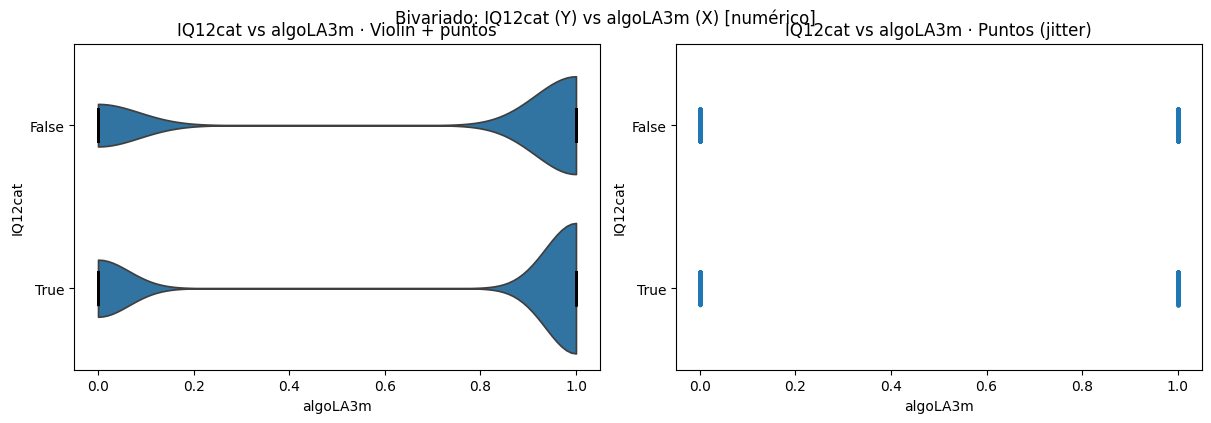

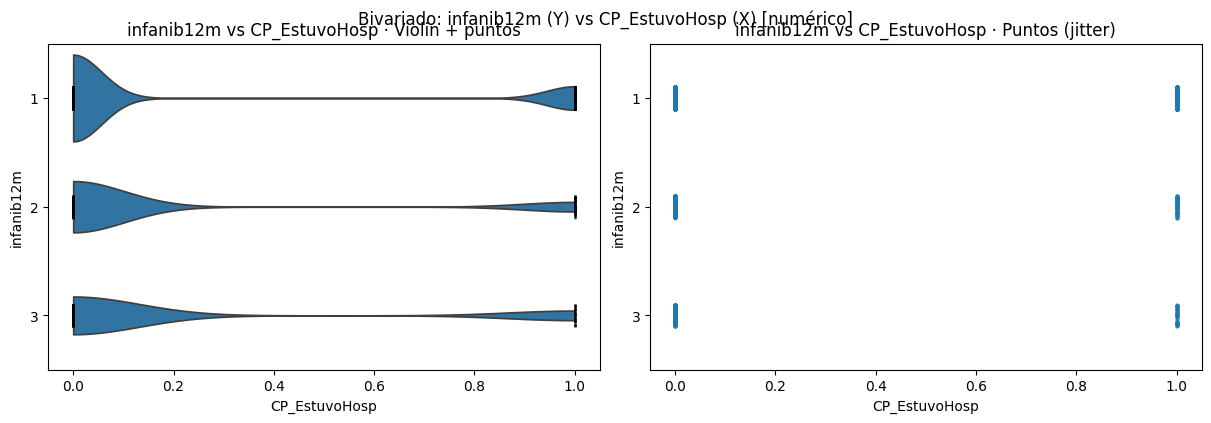

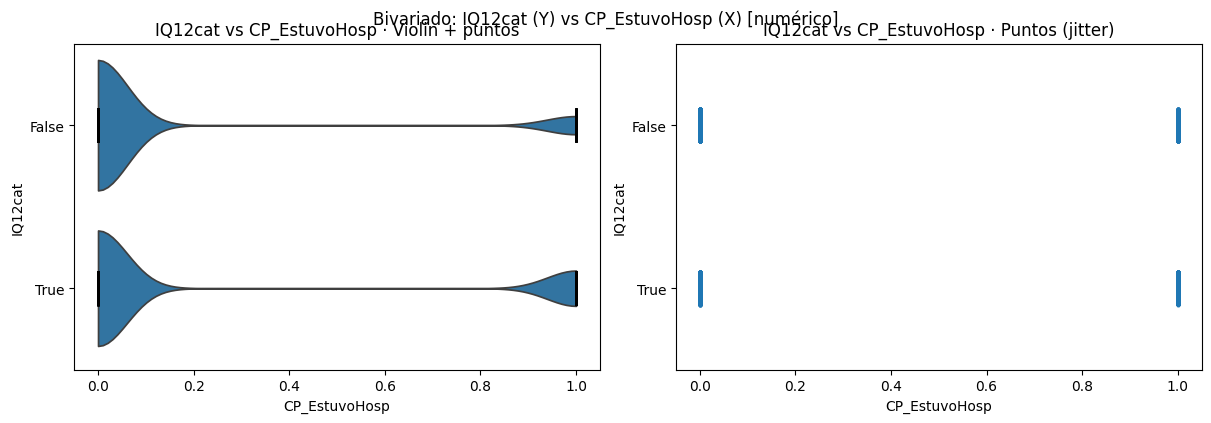

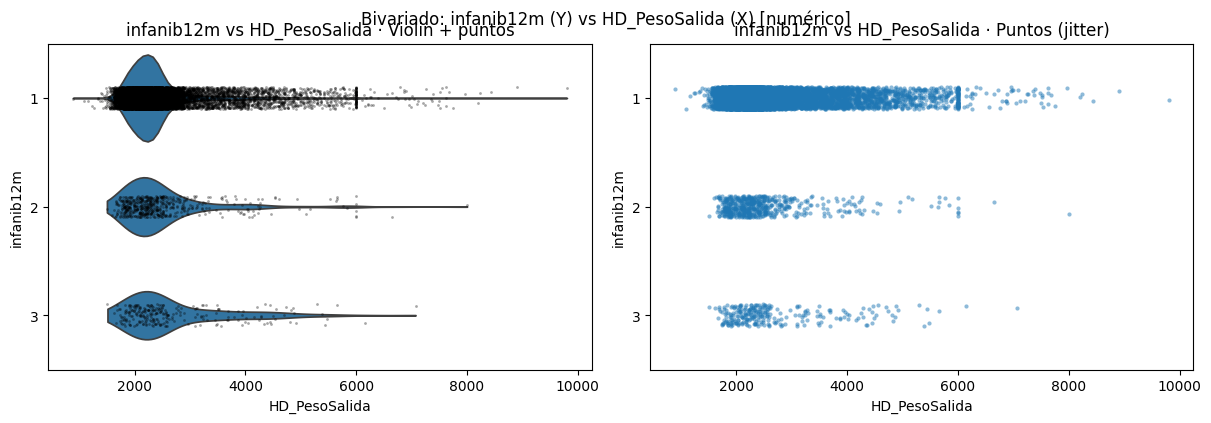

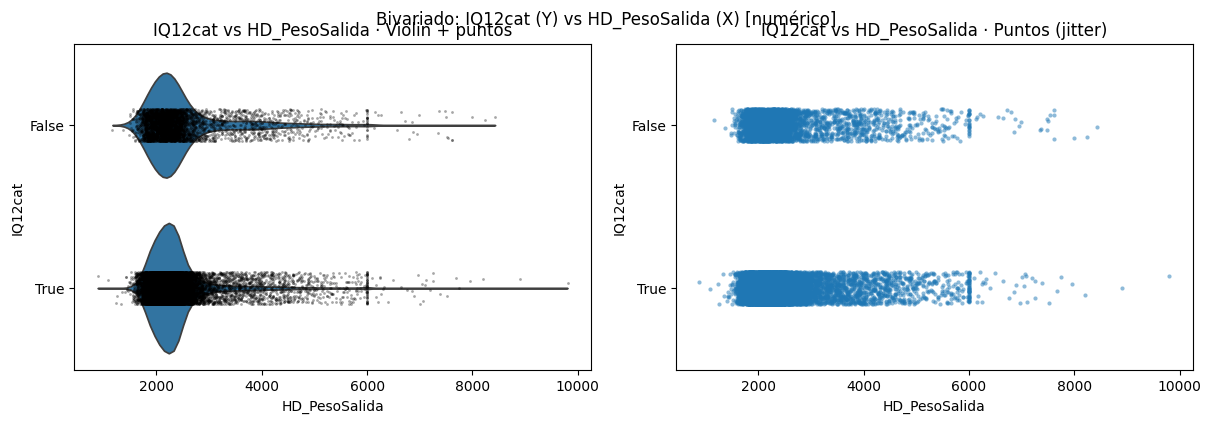

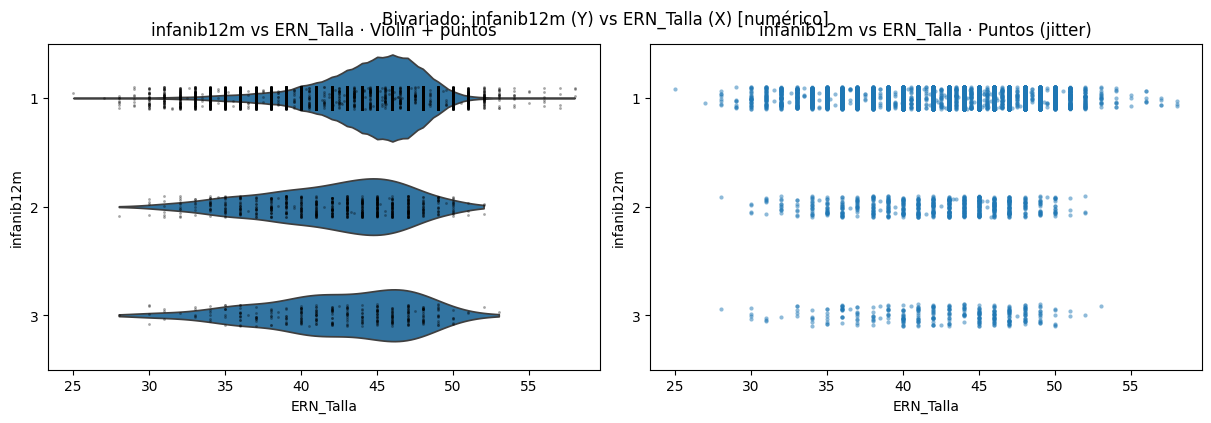

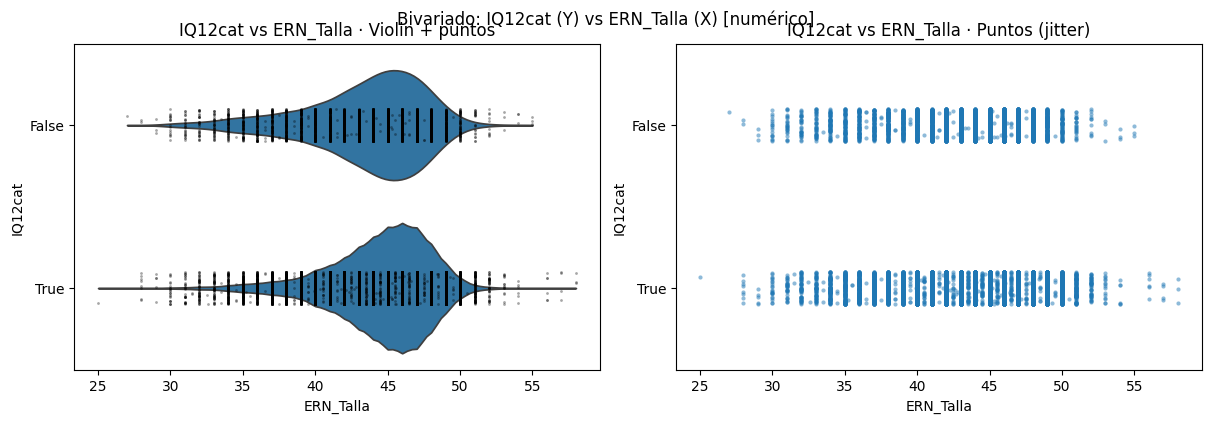

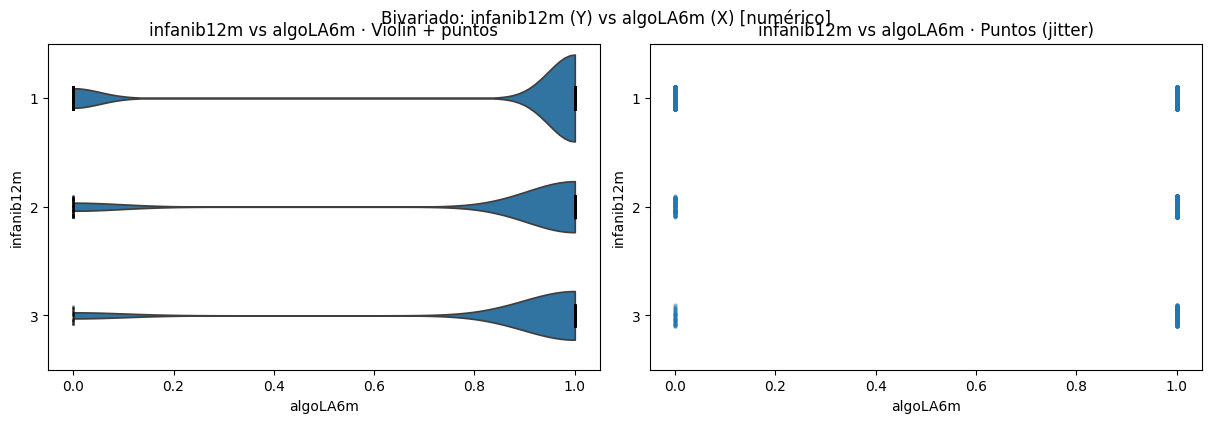

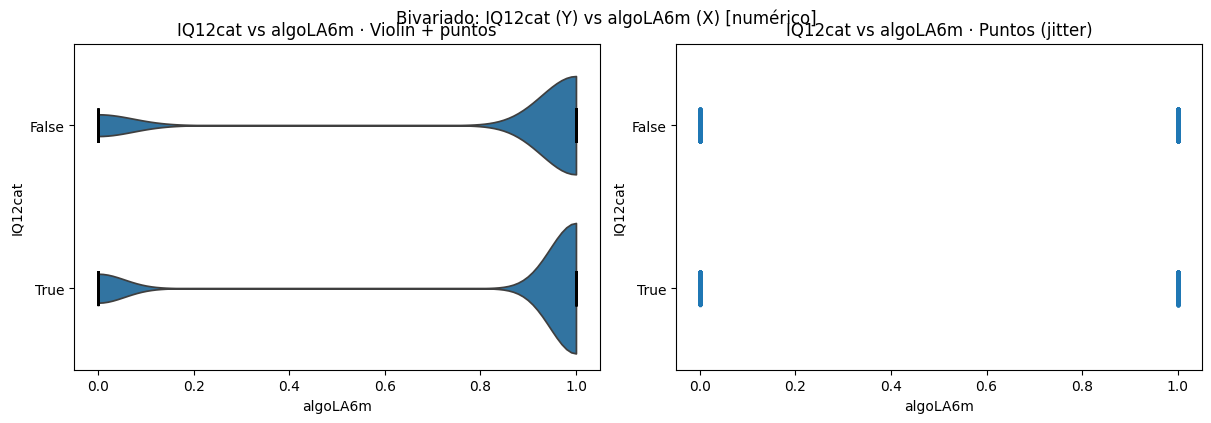

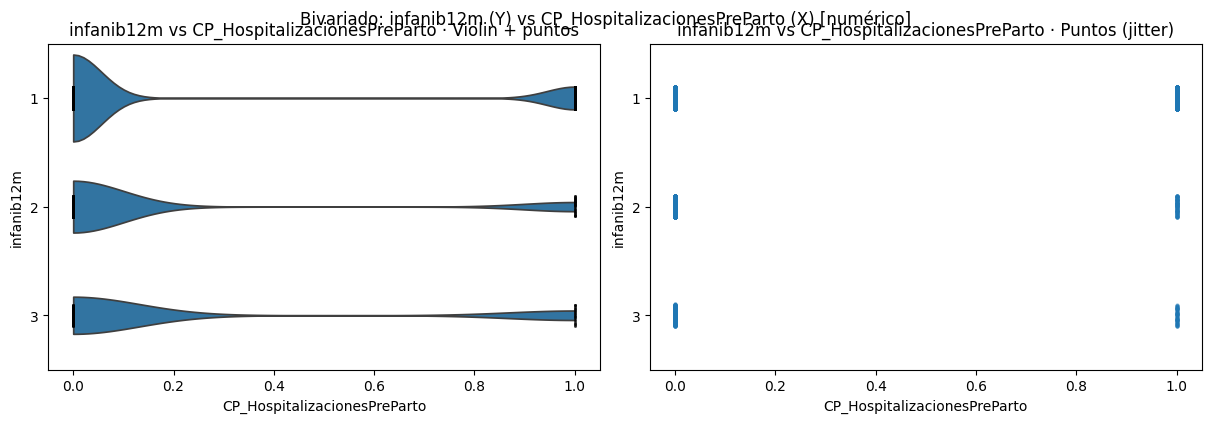

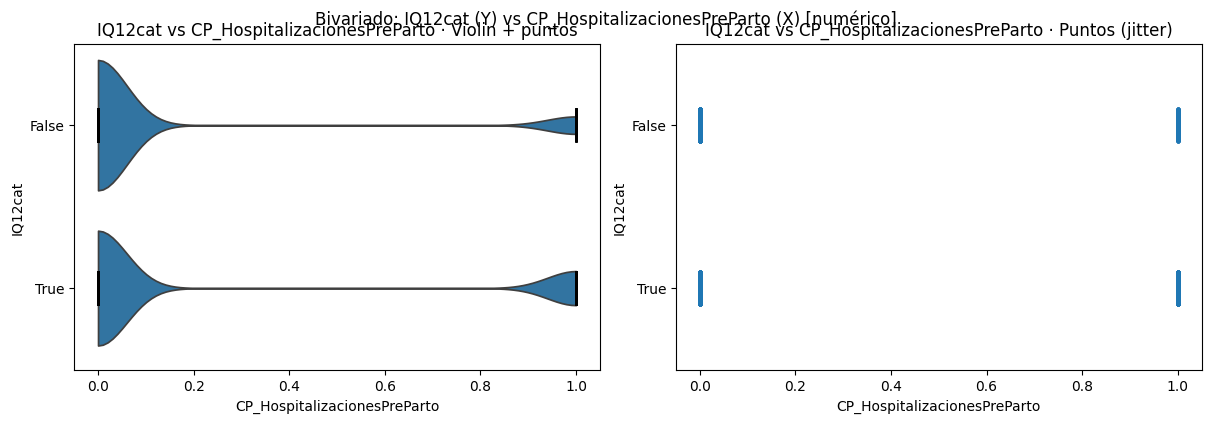

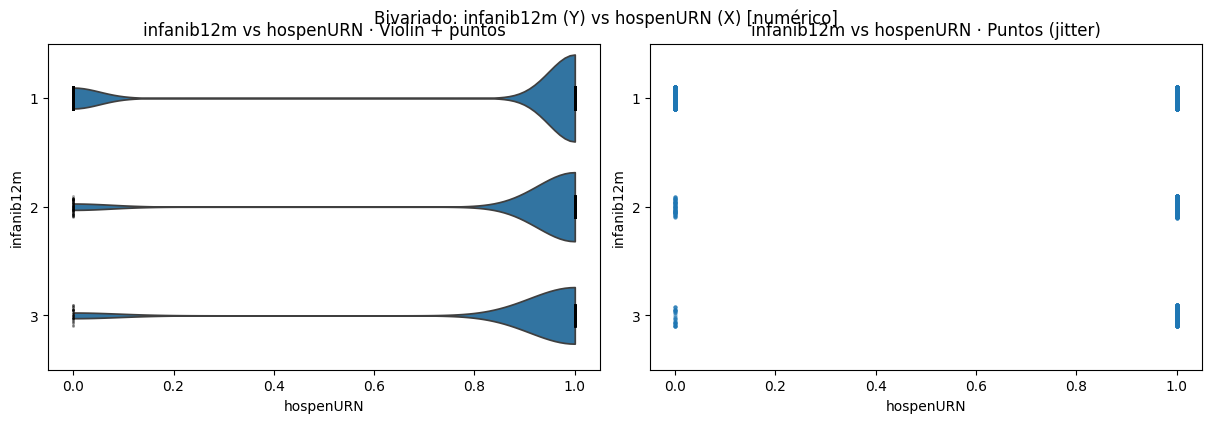

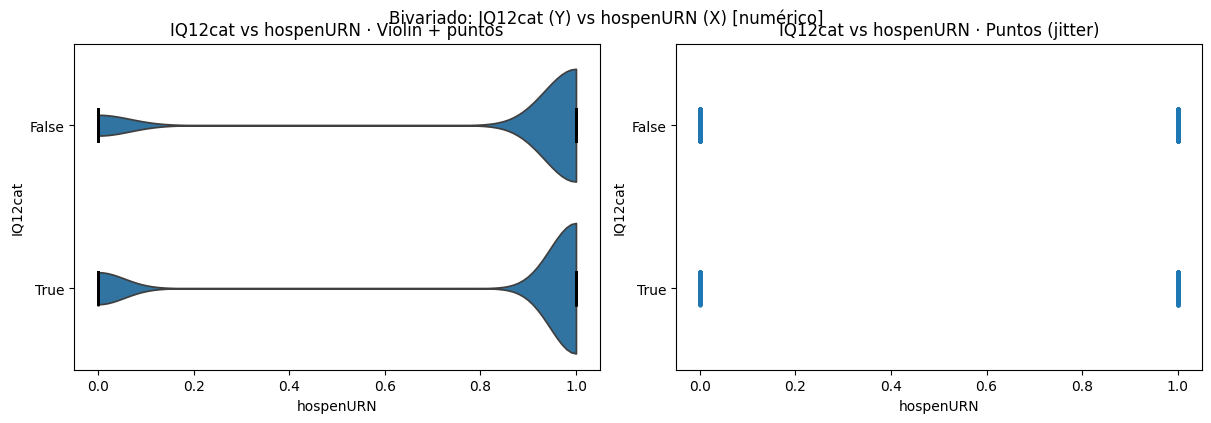

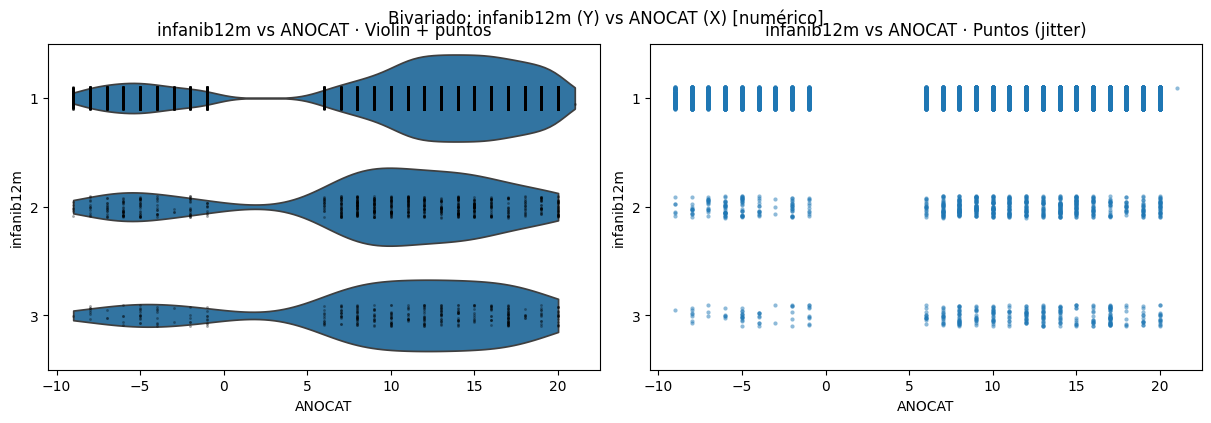

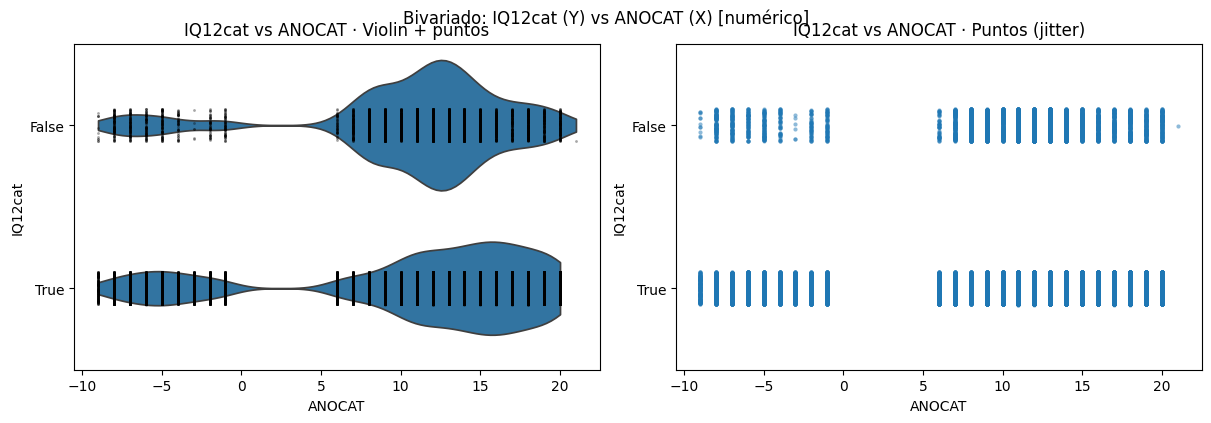

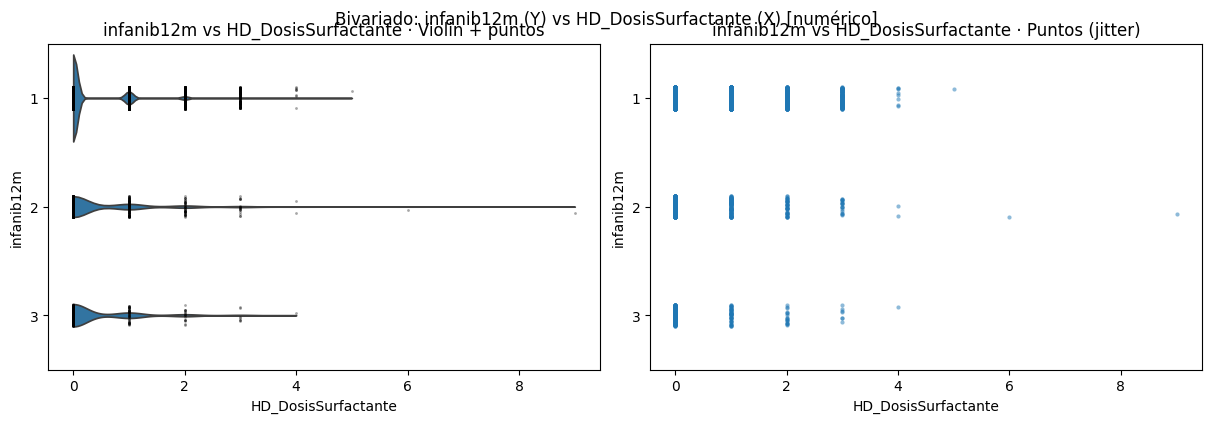

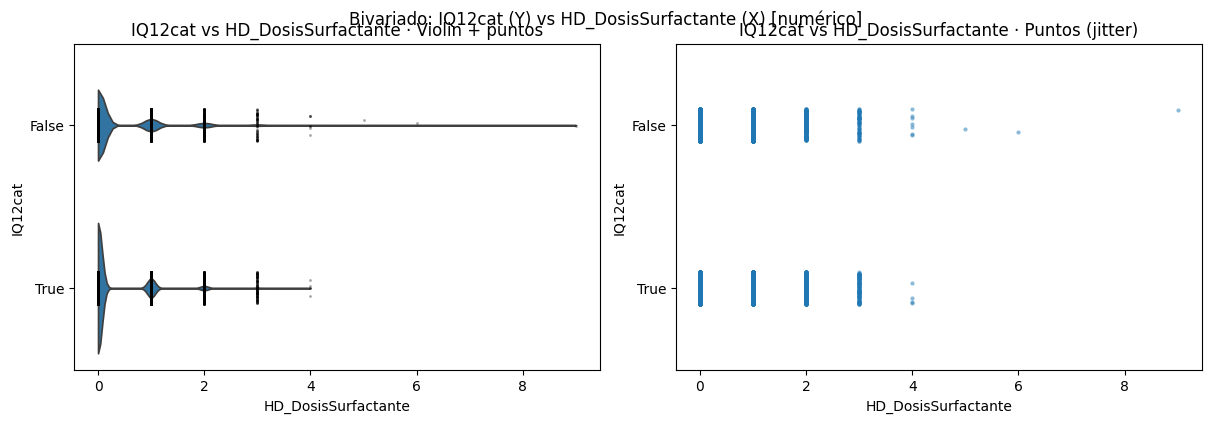

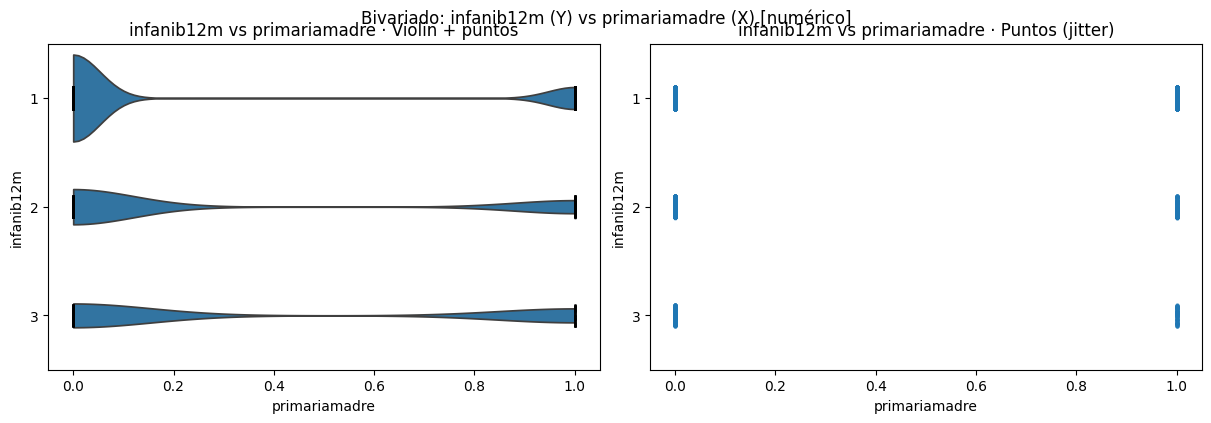

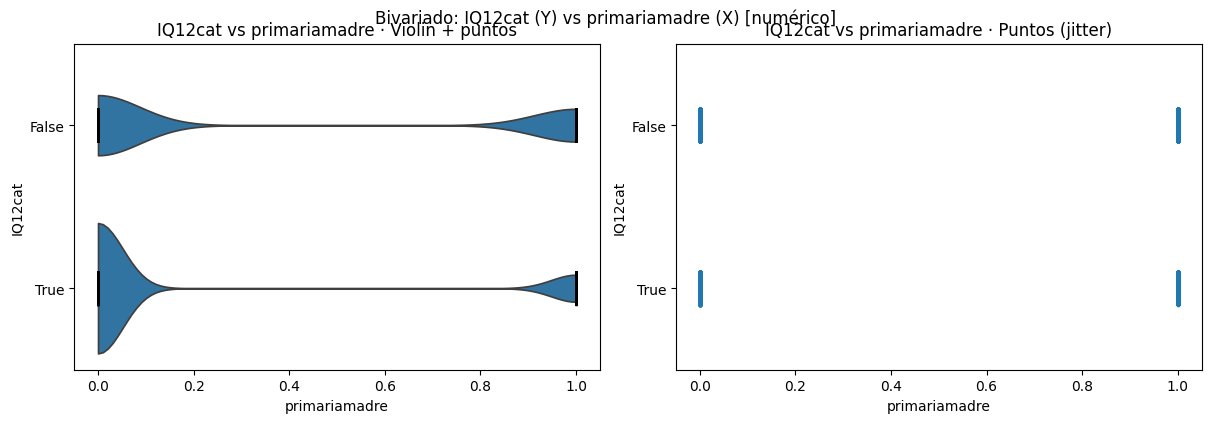

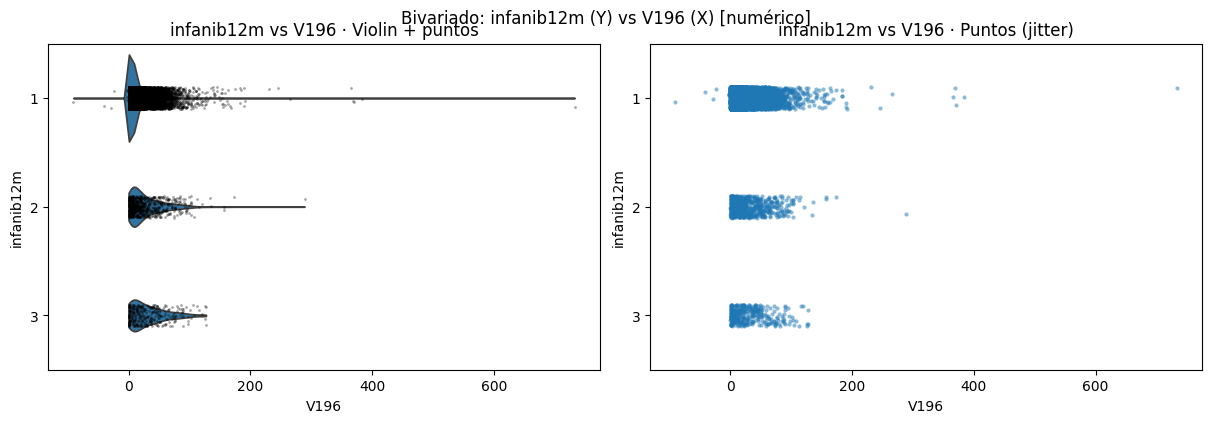

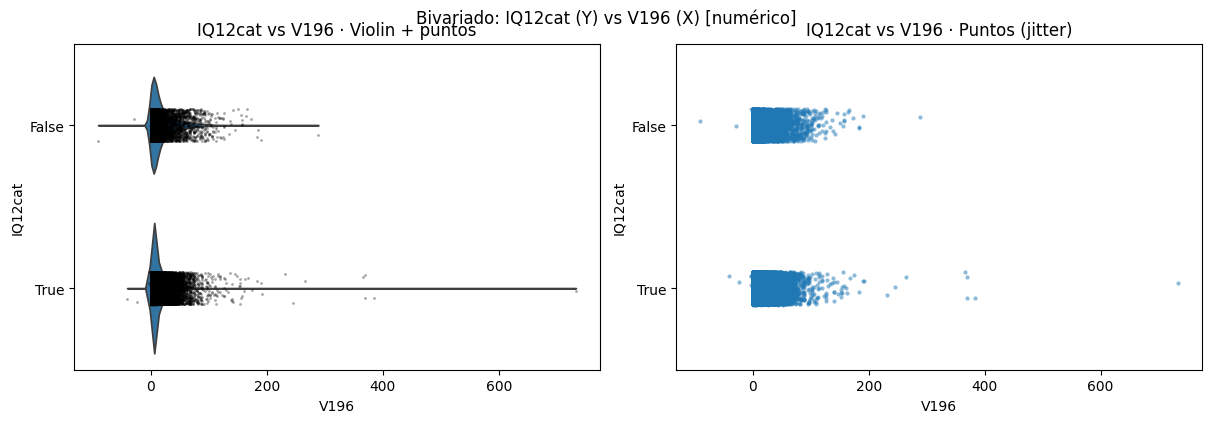

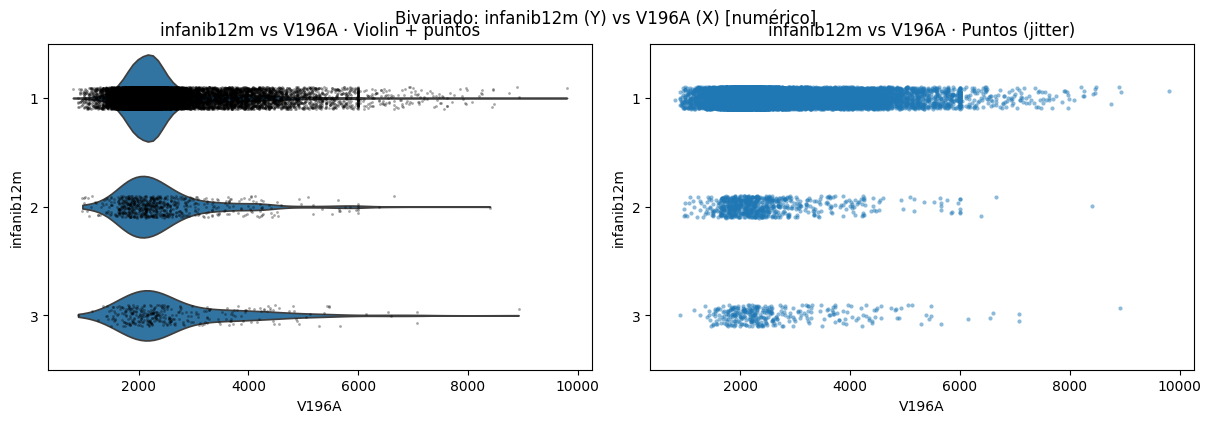

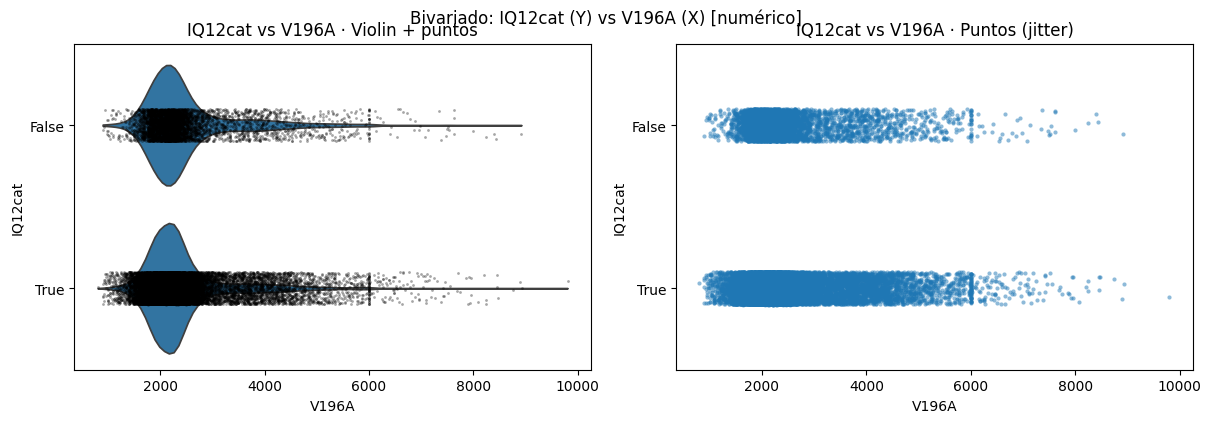

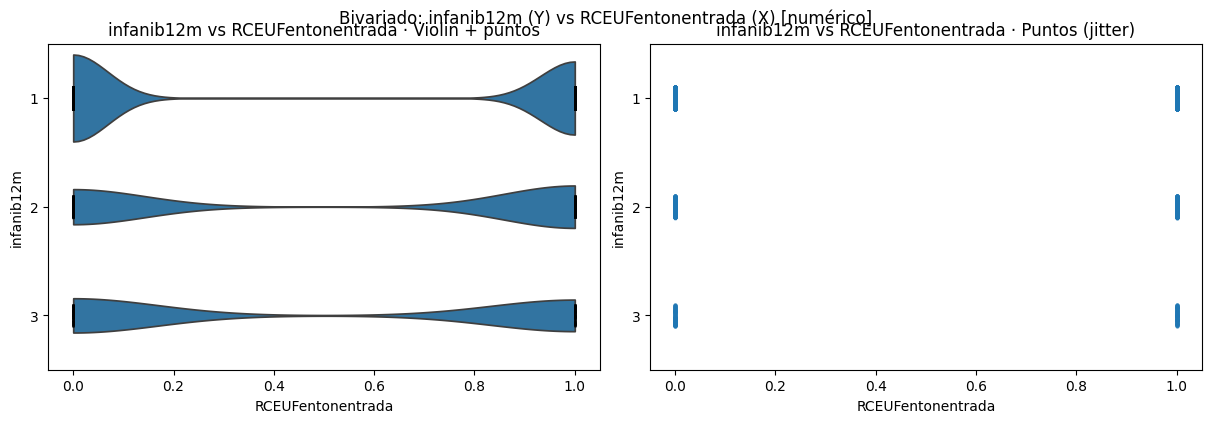

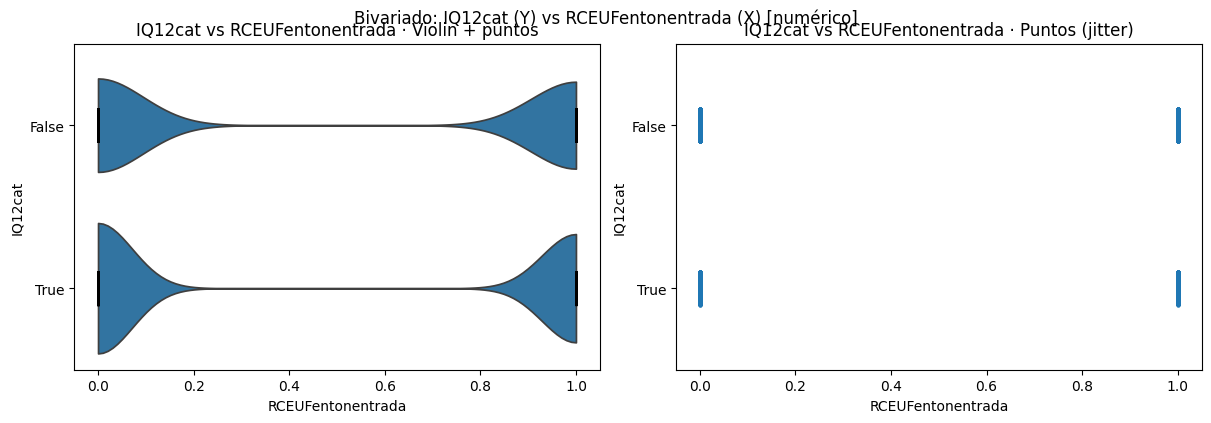

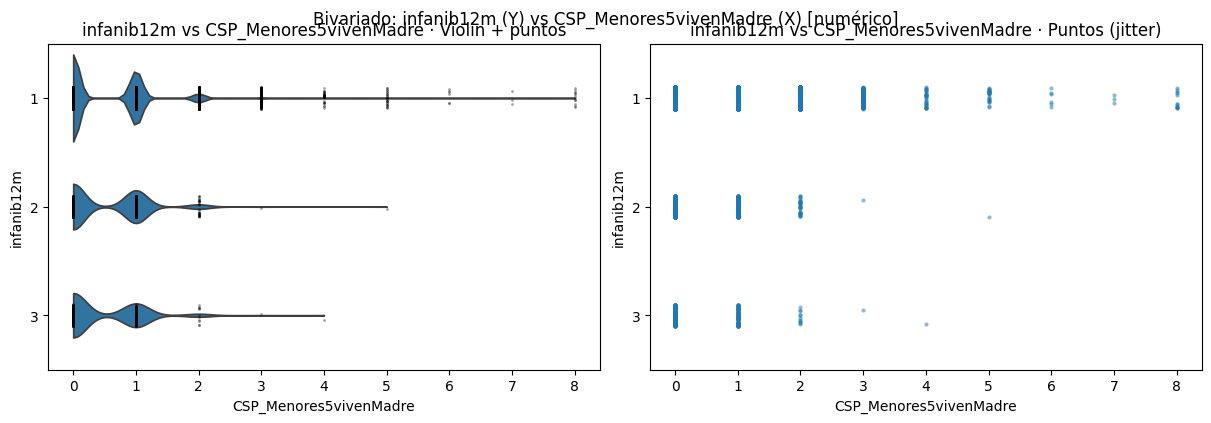

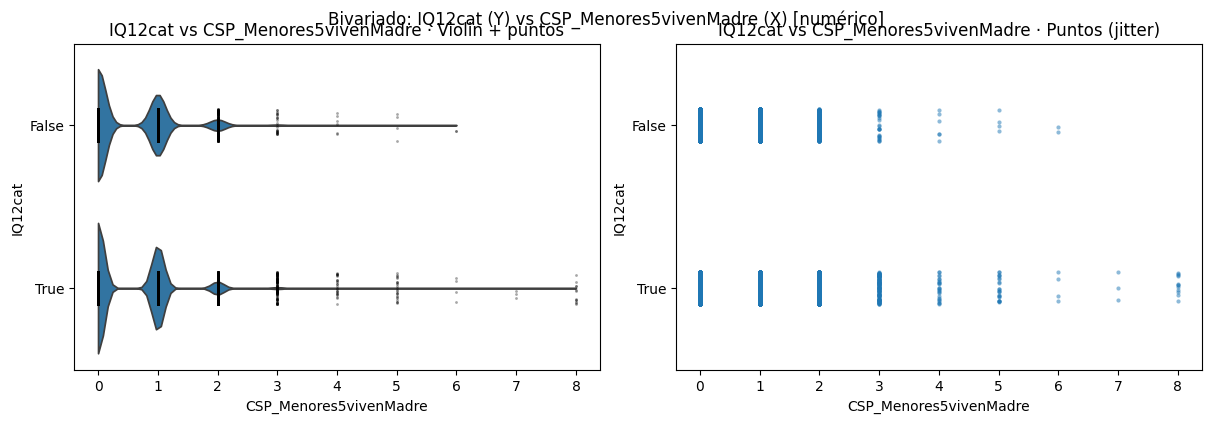

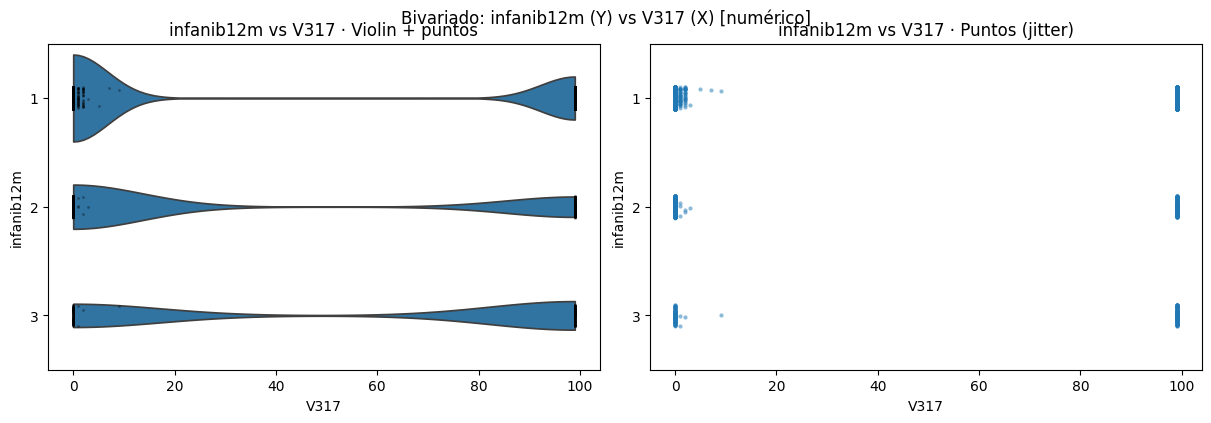

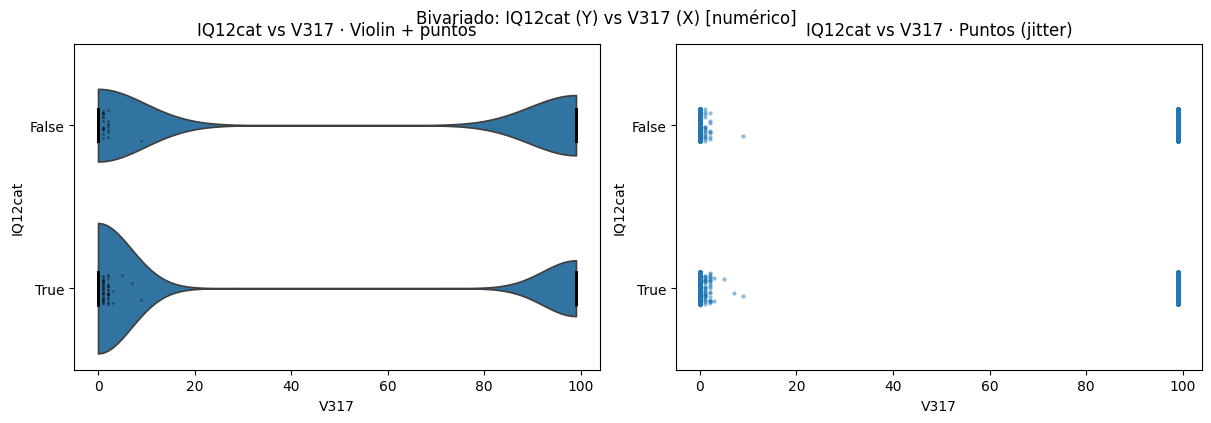

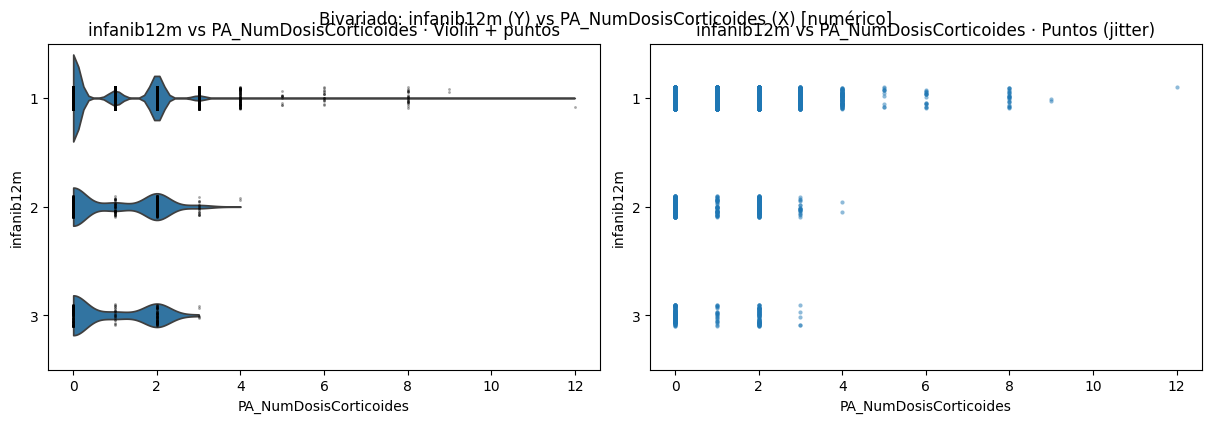

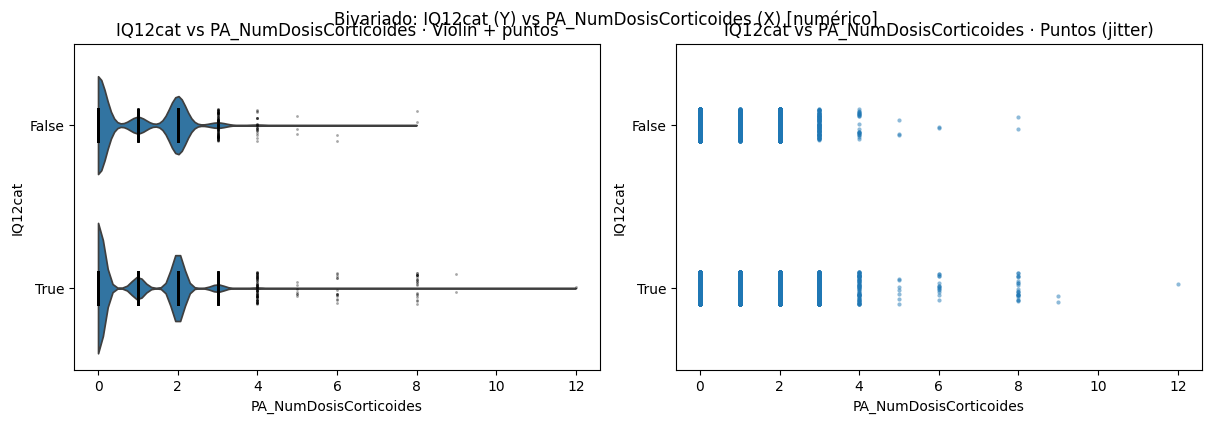

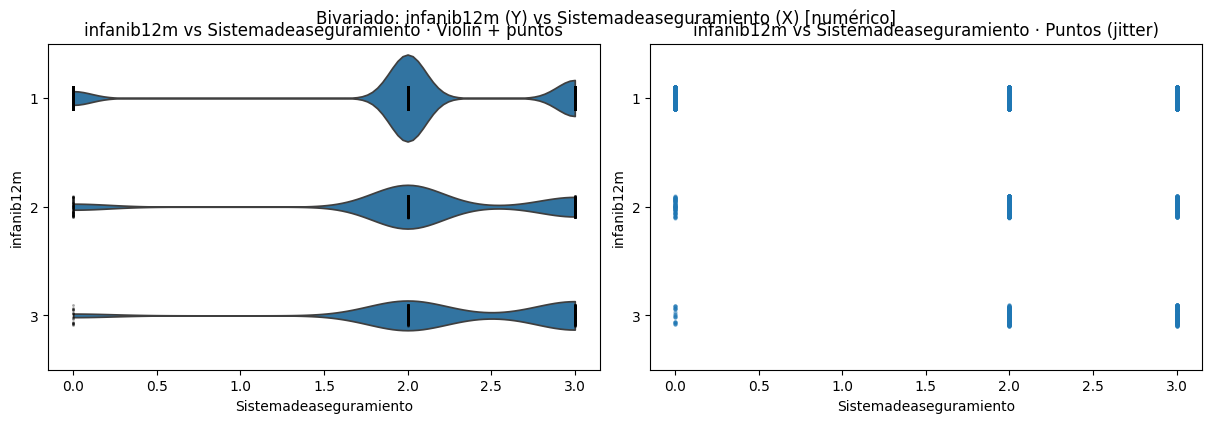

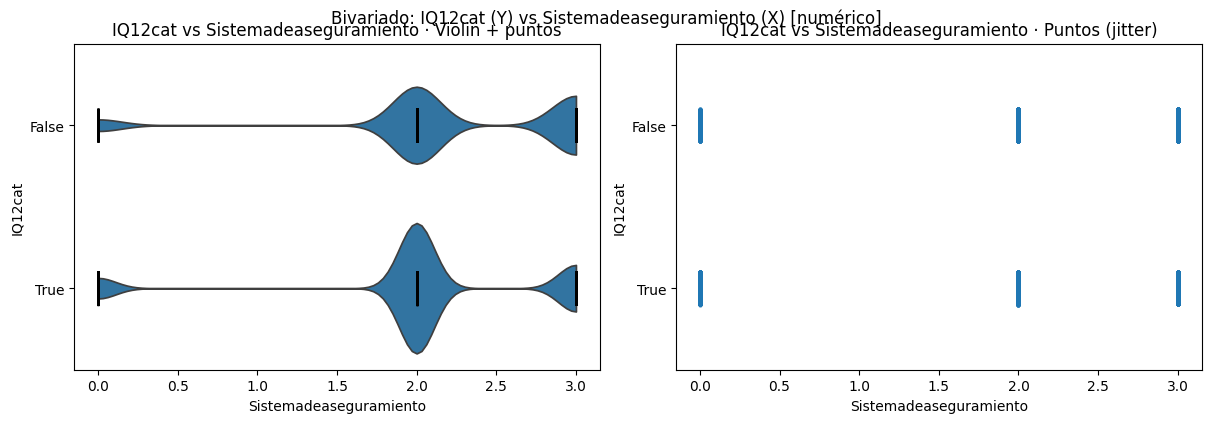

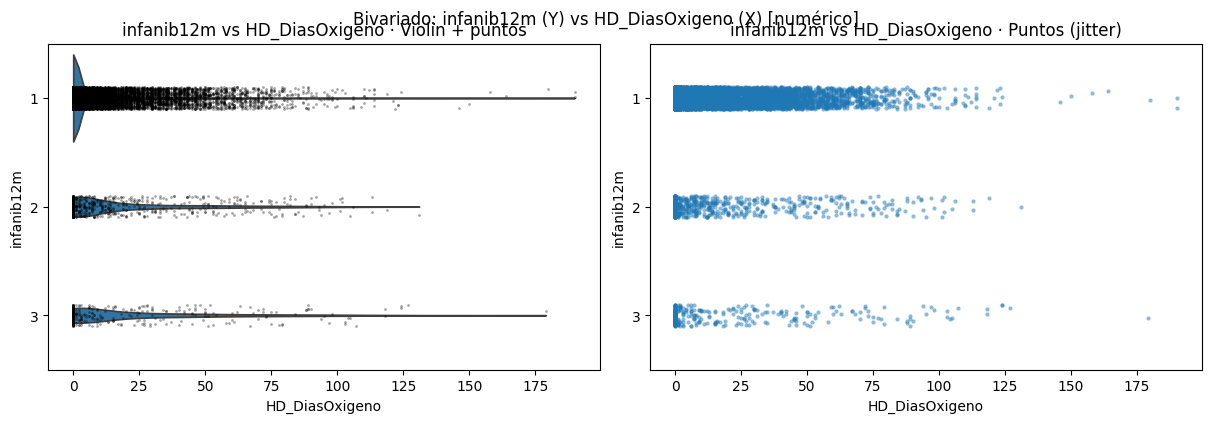

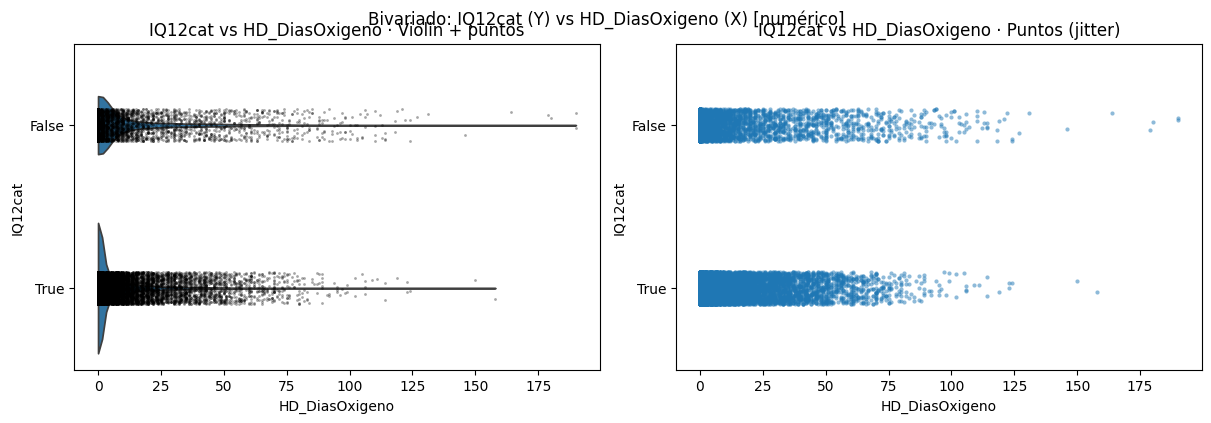

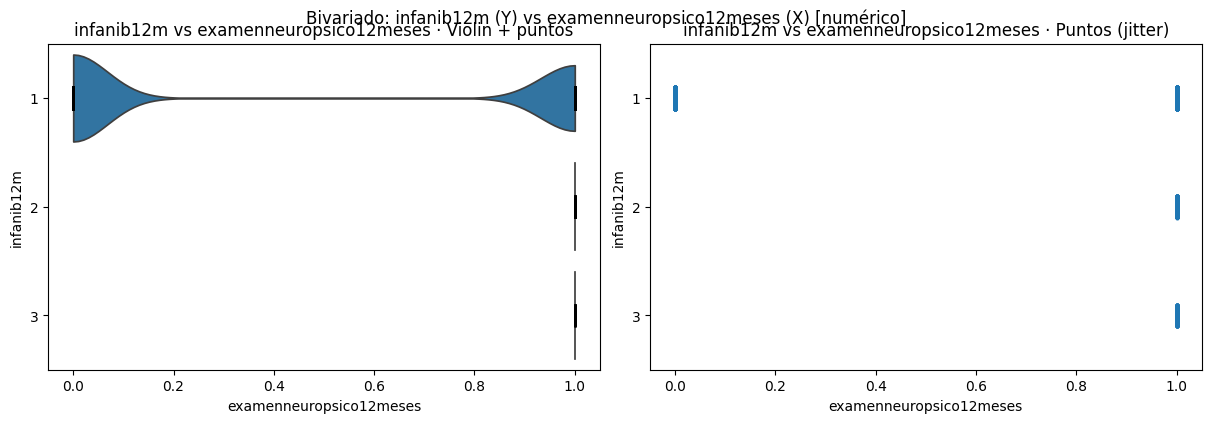

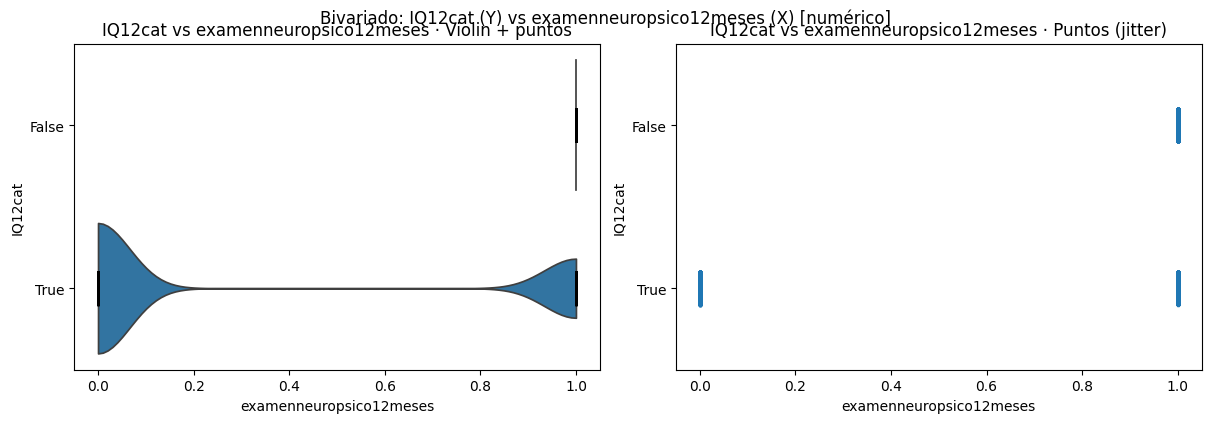

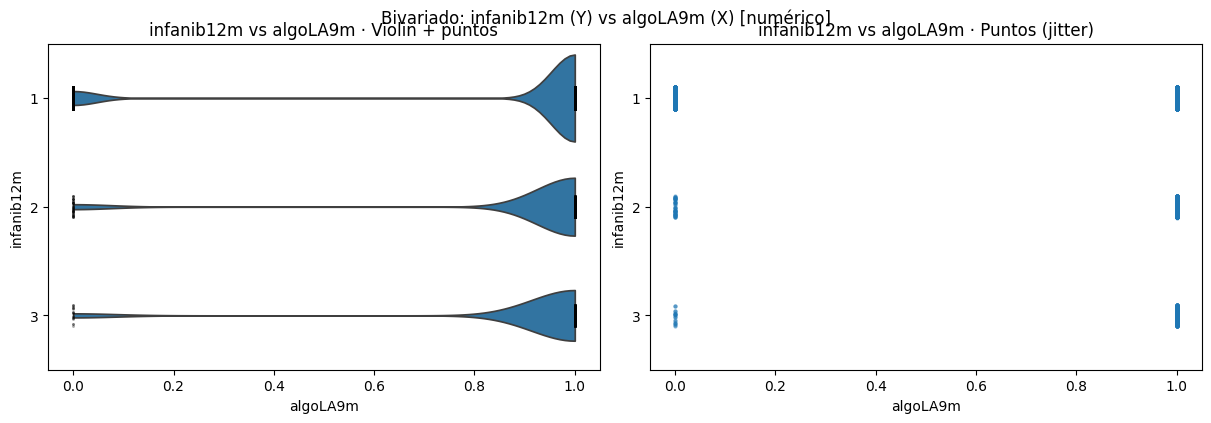

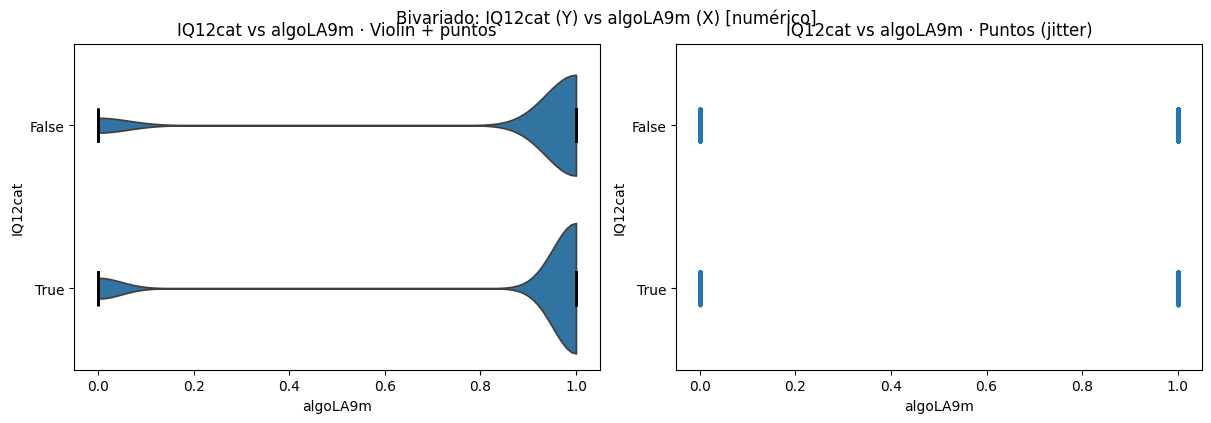

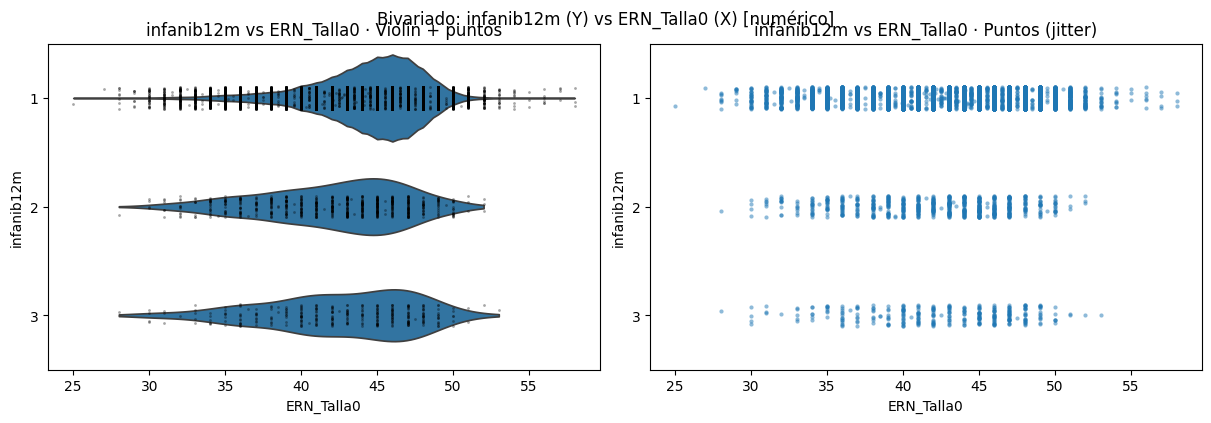

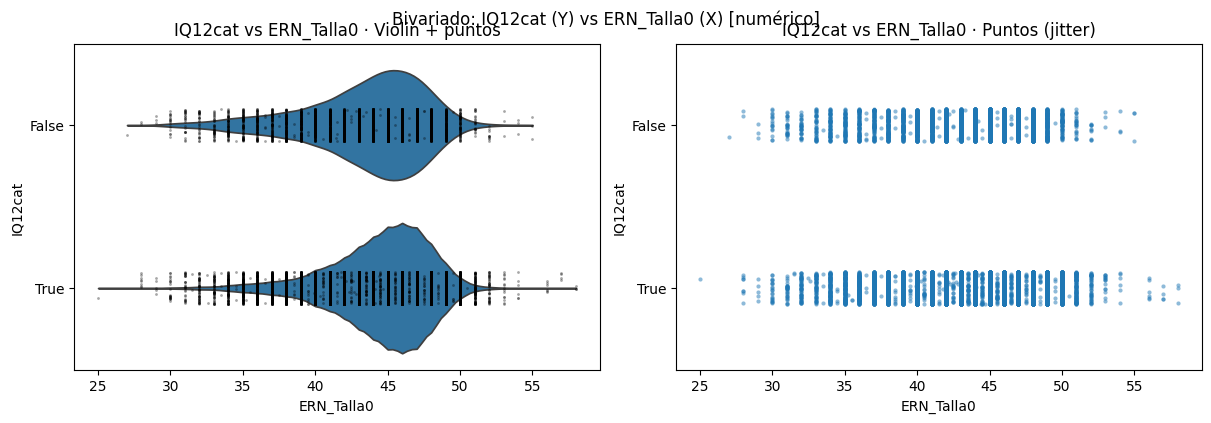

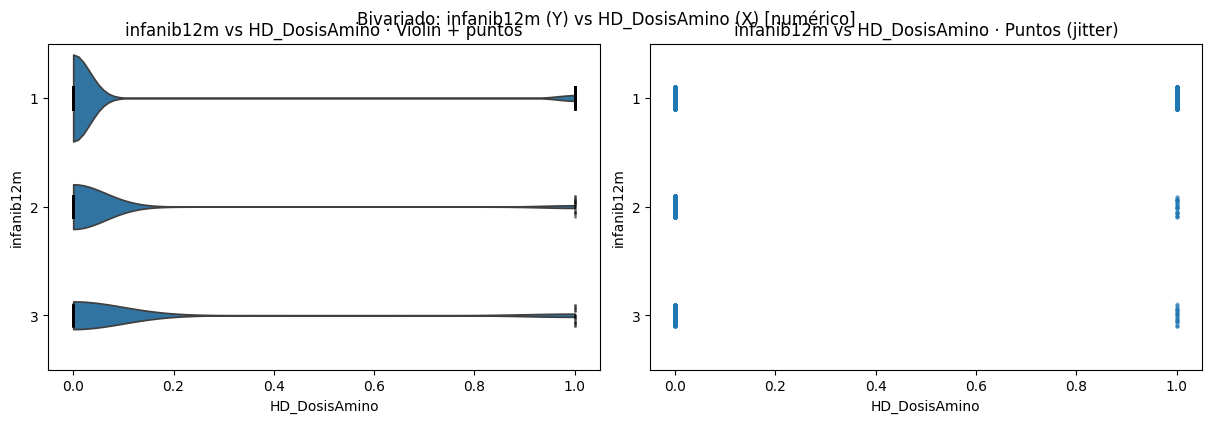

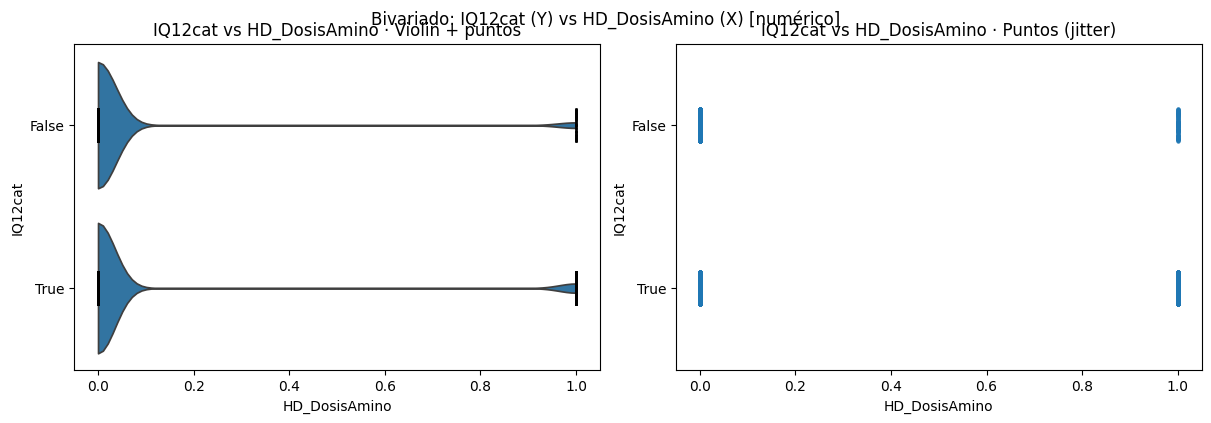

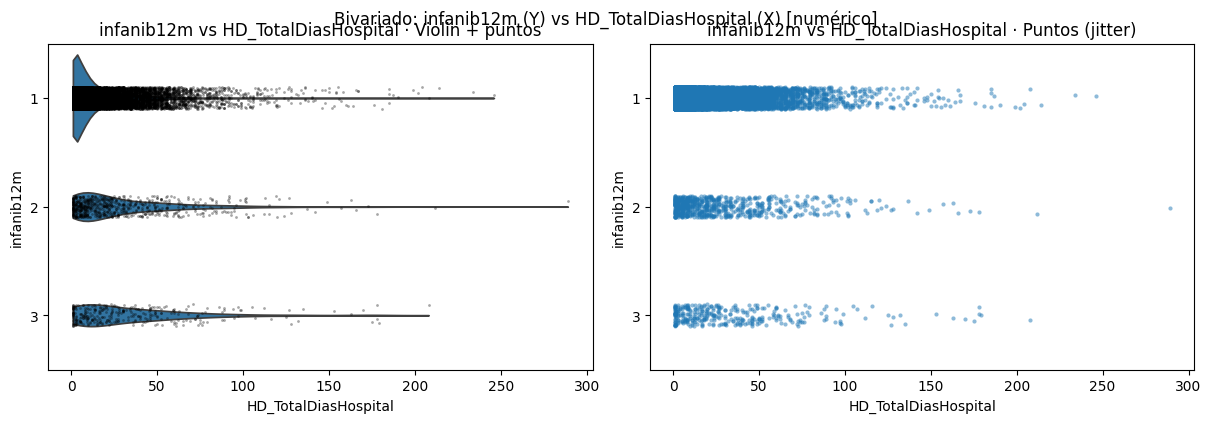

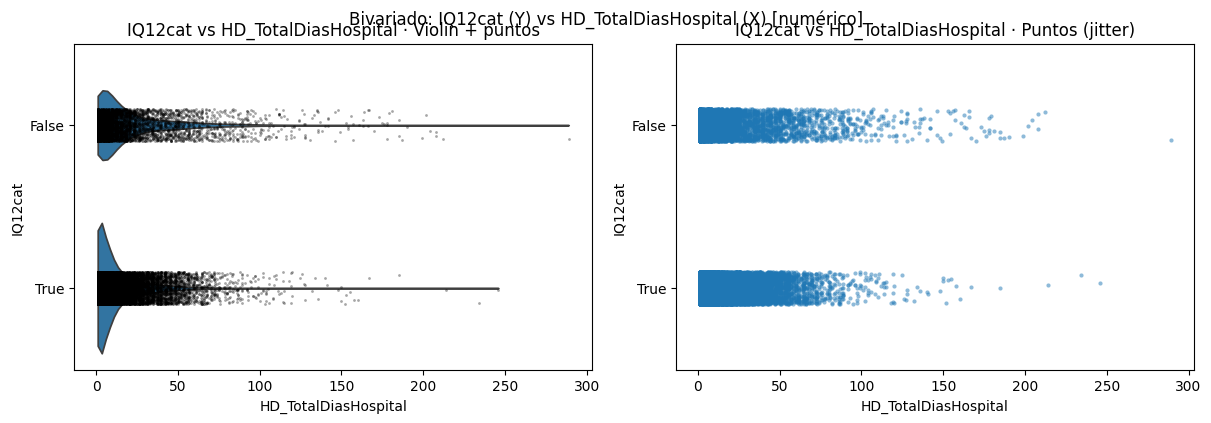

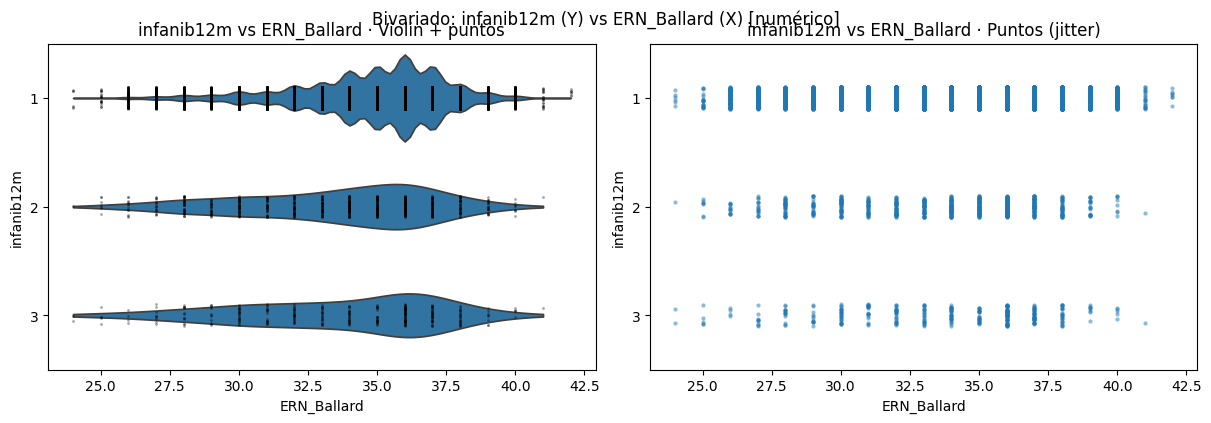

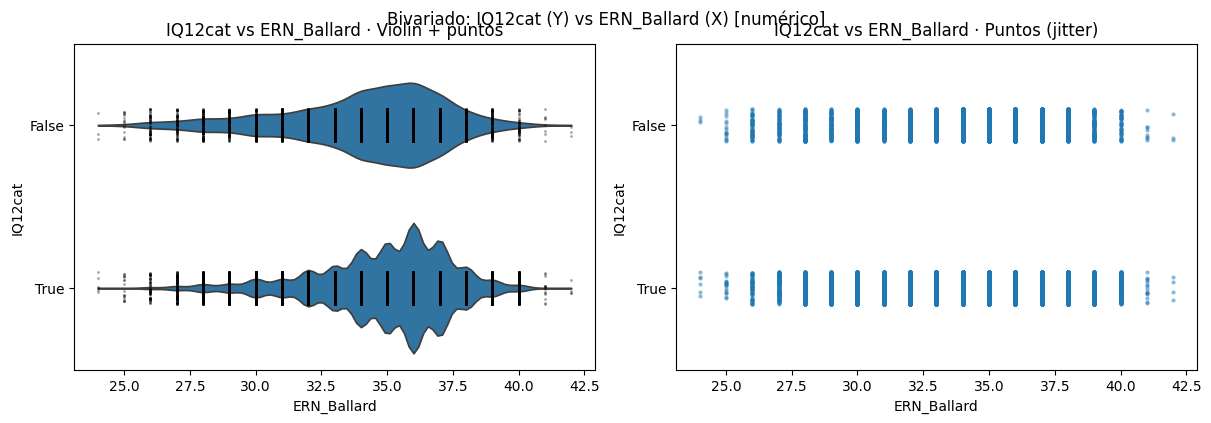

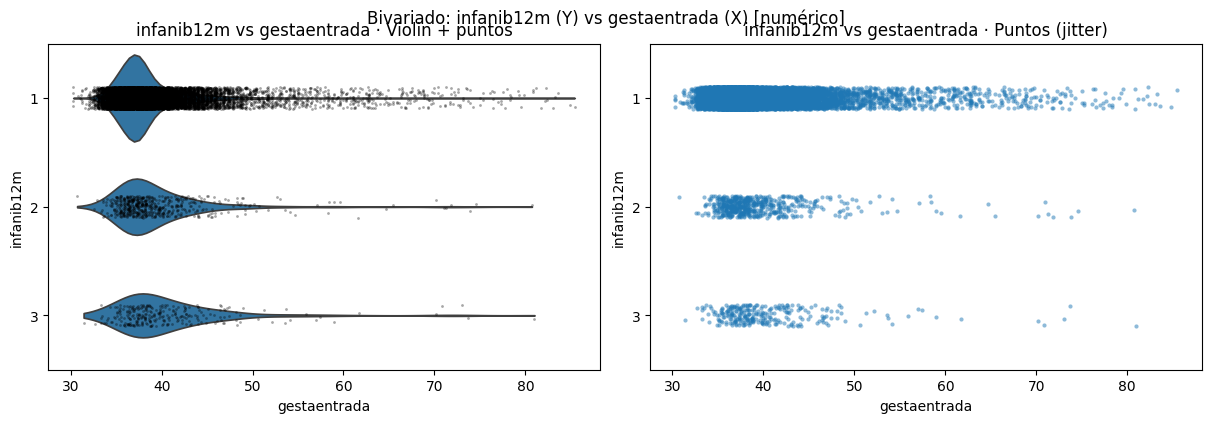

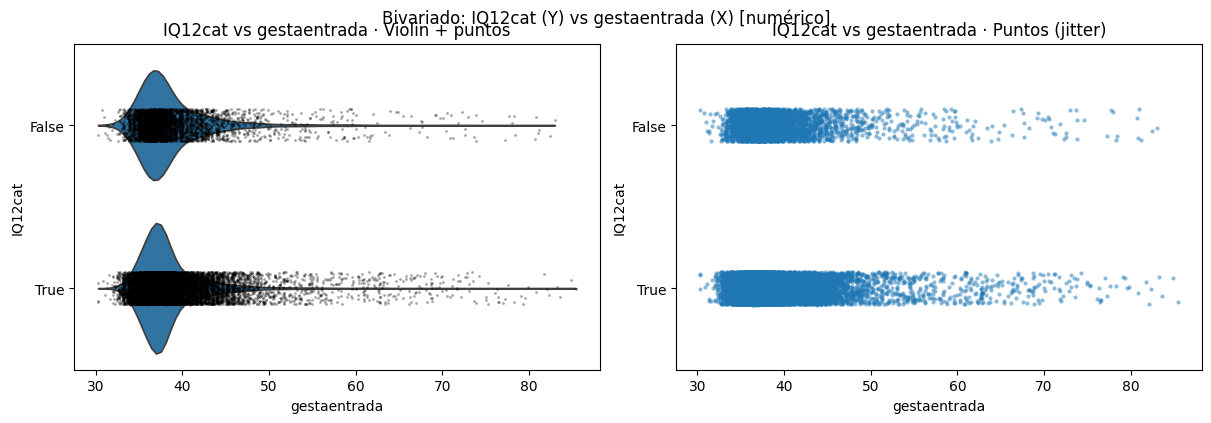

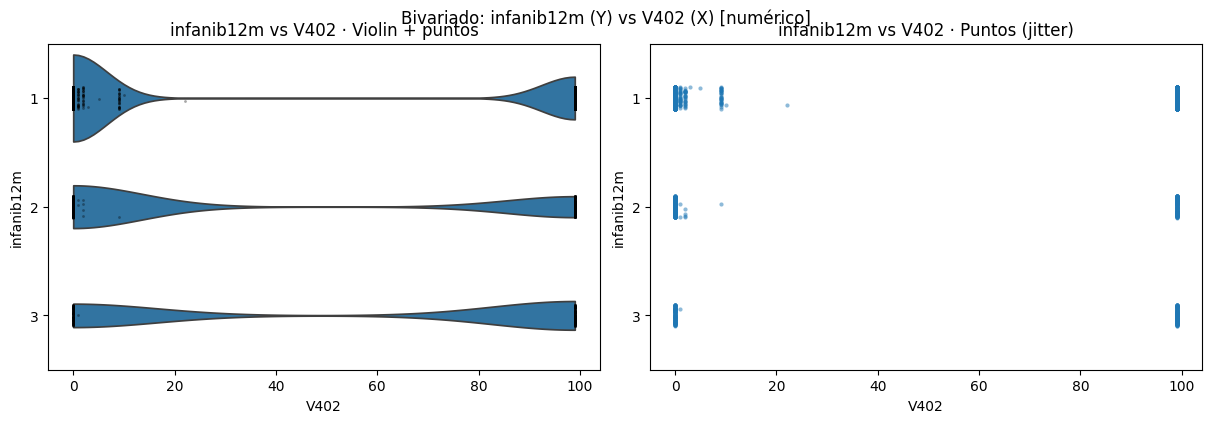

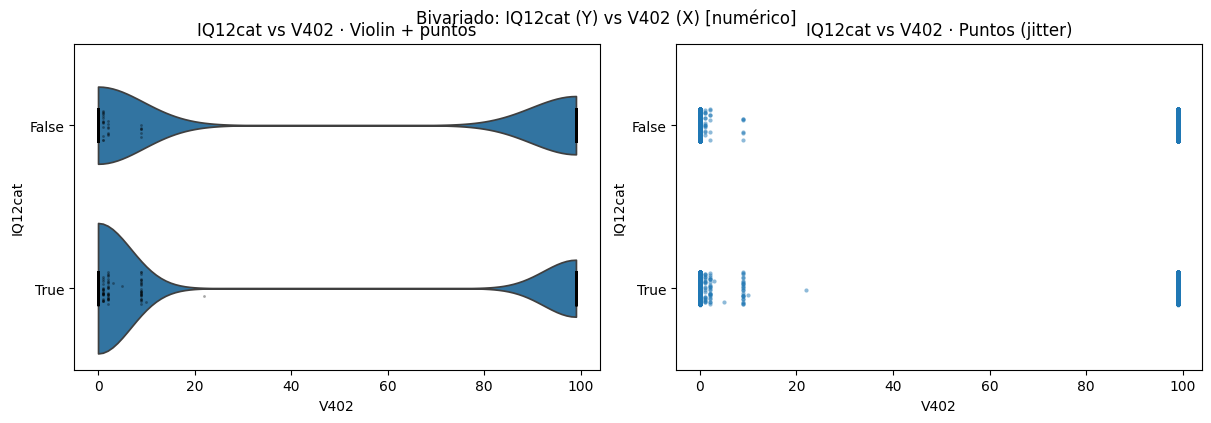

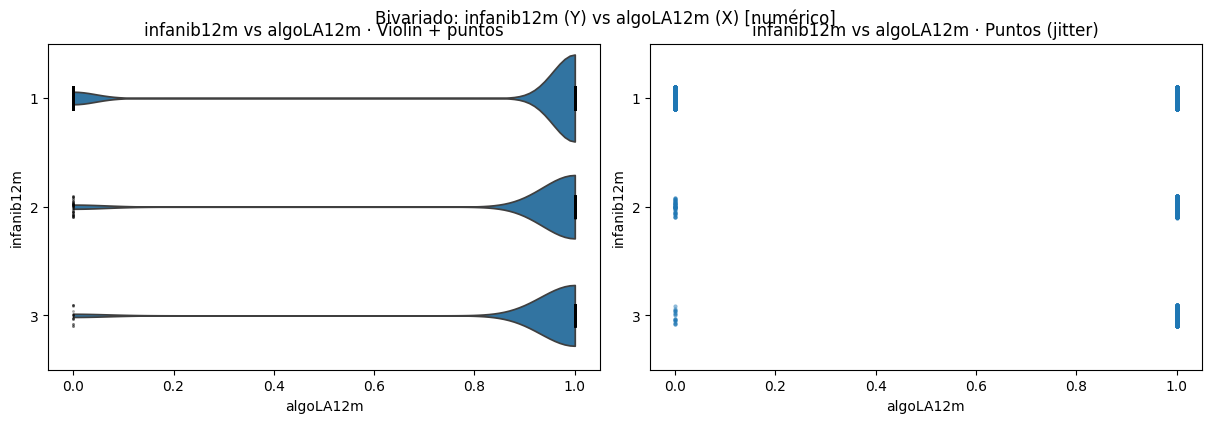

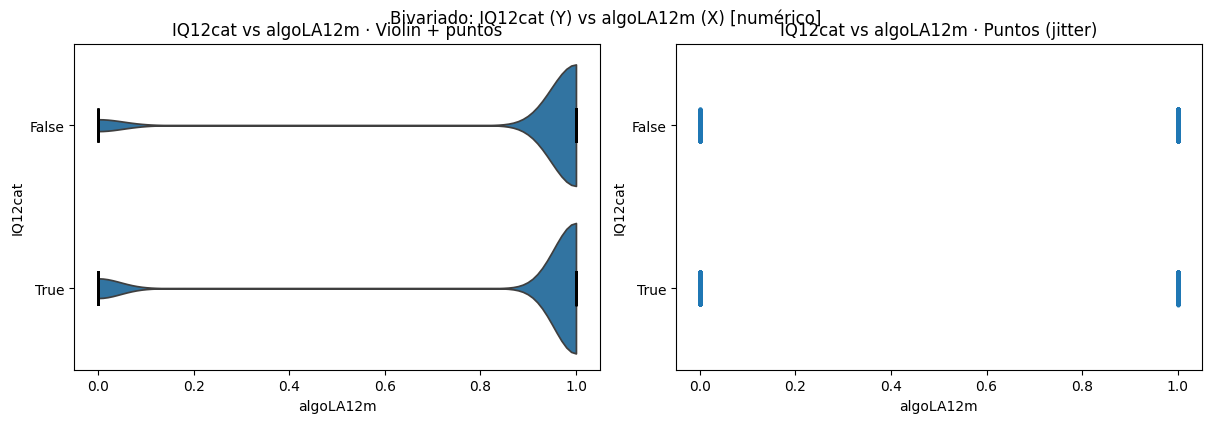

In [172]:
plot_bivariados(
    df=df_subset,
    var_list=var_num,
    targets=['infanib12m', 'IQ12cat'],
    max_levels=10,      # evita “cementerios” de etiquetas
    sample_n=None       # o un número (p.ej. 10000) si tu DF es muy grande
)

**EDA** Conclusiones Iniciales: Vale la pena compartir los hallazgos gráficos con la Fundación para continuar con el estudio, refinando la escogencia de las variables para ejecutar el ejercicio nuevamente incluyendo variables que podrían aportar nuevos matices en los componentes principales o en las posibles correlaciones con las variables objetivo. Además de ahondar en las definiciones de algunas de las variables que son altamente específicas y contextuales para el dominio pediatríco.
- Las variables objetivo al estar levemente correlacionadas, confirman el planteamiento de estudios independientes para determinar factores en cada aspecto del neurodesarrollo evaluado.
- El nivel de ingresos muestra efectos positivos en el desarrollo motor e intelectual, es importante ahondar en el contexto de negocio para identificar los posibles cambios en el manejo de los pacientes en los distintos escenarios de ingresos y conociendo esta información podrían encontrarse nuevas variables para el estudio.
- Los pacientes con mayor edad gestacional presentan menores casos de puntajes no normales de Infanib (2,3)
- Es importante completar las definiciones de las variables ausentes en el diccionario y definir un contexto más claro para proceder.
